### A) Data Preparation

In [1]:
import pandas as pd
path = 'C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/'
df = pd.read_csv(path+"RawData/Latest/SNR_R5_B3_ww51.4_ww04.1.csv")

C:\Users\nchong\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6,1236) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
df.shape

(87784, 1740)

#### Check and remove rows with blank delta

In [3]:
#check for rows with blank delta
import numpy as np
df1 = df[df["DELTA"].isnull()]
df1

,VID,SORTLOT,WAFER,XLOC,YLOC,TEST RESULTS,TEST RESULTS BITS,TR_BITS,INCOMING,INCOMING BITS,...,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X_X_X_X_CONVERTVMIN_HVQK_VMIN_PRE_SCAN_TNT_CORE4_132110,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X_X_X_X_CONVERTVMIN_HVQK_VMIN_PRE_SCAN_TNT_CORE5_132110,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X_X_X_X_CONVERTVMIN_HVQK_VMIN_PRE_SCAN_TNT_CORECA0_132110,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X_X_X_X_CONVERTVMIN_HVQK_VMIN_PRE_SCAN_TNT_CORECA1_132110,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X_X_X_X_CONVERTVMIN_HVQK_VMIN_PRE_SCAN_TNT_CORECA2_132110,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X_X_X_X_CONVERTVMIN_HVQK_VMIN_PRE_SCAN_TNT_CORECA3_132110,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X_X_X_X_CONVERTVMIN_HVQK_VMIN_PRE_SCAN_TNT_CORECA4_132110,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X_X_X_X_CONVERTVMIN_HVQK_VMIN_PRE_SCAN_TNT_CORECA5_132110,IB@6261[CLASSHOT],FB@6261[CLASSHOT]
22481,M1XH703100536,N0366610,230,0,6,#VALUE!,VALUE!,NaN,NaN,NaN,...,0.552364,0.552364,0.574906,0.574906,-8888.000000,0.572056,0.592364,0.592364,45,4543
22485,M1XH703100244,N0342520,276,-3,0,#VALUE!,VALUE!,NaN,NaN,NaN,...,0.598511,0.598511,0.580626,-8888.000000,0.618078,0.618078,0.598511,0.598511,27,2755
22577,M1XH703100936,N0423170,659,-3,3,#VALUE!,VALUE!,NaN,NaN,NaN,...,0.567095,0.567095,0.570004,0.570004,0.566894,0.566894,0.567095,0.567095,21,2155
22585,M1BH477201065,N0423170,700,3,-9,#VALUE!,VALUE!,NaN,NaN,NaN,...,-8888.000000,0.598024,0.657396,0.657396,0.636790,0.636790,-8888.000000,0.598024,9,997
22624,M1XH703101227,N0422350,116,-3,-3,#VALUE!,VALUE!,NaN,NaN,NaN,...,0.575194,0.575194,0.616151,0.616151,0.594423,0.594423,0.615194,0.615194,60,6005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53524,M1MM581500781,N0423170,669,4,-2,#VALUE!,VALUE!,NaN,NaN,NaN,...,0.592364,0.592364,0.594906,0.594906,0.592056,0.592056,0.612364,0.612364,21,2150
53543,M1MM581500722,N0446570,120,-4,6,#VALUE!,VALUE!,NaN,NaN,NaN,...,0.550608,0.550608,0.573272,0.573272,0.570335,0.570335,0.570608,0.570608,61,6180
53557,M1MM581500744,N0411290,435,4,4,#VALUE!,VALUE!,NaN,NaN,NaN,...,0.569048,0.569048,0.590431,0.590431,0.588401,0.588401,0.589048,0.589048,45,4550
53652,M1JJ817501248,N0422200,50,6,2,#VALUE!,VALUE!,NaN,NaN,NaN,...,0.560000,0.560000,0.580000,0.580000,0.580000,0.580000,0.580000,0.580000,21,2148


In [4]:
#make folder for dataprep if it doesn't exist
import os
dataprep_path = path + 'DataPreparation/MergedData/' 
if not os.path.exists(dataprep_path):
    os.makedirs(dataprep_path)
    print("DataPreparation folder created!")
    


In [5]:
df1.to_csv(dataprep_path+"Blank_delta.csv",index=False)

In [6]:
#remove rows with blank delta
import numpy as np
df = df[df["DELTA"].notnull()]
df

,VID,SORTLOT,WAFER,XLOC,YLOC,TEST RESULTS,TEST RESULTS BITS,TR_BITS,INCOMING,INCOMING BITS,...,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X_X_X_X_CONVERTVMIN_HVQK_VMIN_PRE_SCAN_TNT_CORE4_132110,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X_X_X_X_CONVERTVMIN_HVQK_VMIN_PRE_SCAN_TNT_CORE5_132110,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X_X_X_X_CONVERTVMIN_HVQK_VMIN_PRE_SCAN_TNT_CORECA0_132110,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X_X_X_X_CONVERTVMIN_HVQK_VMIN_PRE_SCAN_TNT_CORECA1_132110,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X_X_X_X_CONVERTVMIN_HVQK_VMIN_PRE_SCAN_TNT_CORECA2_132110,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X_X_X_X_CONVERTVMIN_HVQK_VMIN_PRE_SCAN_TNT_CORECA3_132110,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X_X_X_X_CONVERTVMIN_HVQK_VMIN_PRE_SCAN_TNT_CORECA4_132110,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X_X_X_X_CONVERTVMIN_HVQK_VMIN_PRE_SCAN_TNT_CORECA5_132110,IB@6261[CLASSHOT],FB@6261[CLASSHOT]
0,M00C045U00024,N0284110,927,0,4,B010100,10100,2.0,B010000,10000.0,...,-8888.000000,0.565535,0.607163,0.607163,0.584960,0.584960,-8888.000000,0.585535,1,101
1,M00C045U00050,N0292750,182,3,-6,B100010,100010,2.0,B100000,100000.0,...,0.562705,-8888.000000,0.585918,0.585918,0.602592,0.602592,0.582705,-8888.000000,1,101
2,M00C045U00123,N0292750,221,-5,-5,B100001,100001,2.0,B100000,100000.0,...,0.545143,0.545143,0.569576,0.569576,0.565387,0.565387,0.565143,0.565143,1,101
3,M00C045U00134,N0284110,927,-3,-8,B001100,1100,2.0,B001000,1000.0,...,0.581145,0.581145,0.603077,0.603077,0.600658,0.600658,0.601145,0.601145,1,101
4,M00C045U00135,N0284110,927,4,-6,B010010,10010,2.0,B000010,10.0,...,0.577632,0.577632,0.599809,0.599809,0.597217,0.597217,0.597632,0.597632,1,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87779,M0NN526000901,N026052,80,5,1,B000000,0,0.0,B000000,0.0,...,0.563583,0.563583,0.586735,0.586735,0.583453,0.583453,0.583583,0.583583,1,101
87780,M0NN526000904,N026052,80,5,3,B000000,0,0.0,B000000,0.0,...,0.566217,0.566217,0.589187,0.589187,0.586034,0.586034,0.586217,0.586217,1,101
87781,M0NN526000902,N026052,80,5,4,B000000,0,0.0,B000000,0.0,...,0.571486,0.571486,0.574089,0.574089,0.591195,0.591195,0.591486,0.591486,1,101
87782,M05C0K5600688,N026052,80,5,5,B000100,100,1.0,B000100,100.0,...,0.568169,0.568169,0.589614,0.589614,0.587541,0.587541,0.588169,0.588169,1,101


In [7]:
df["DELTA"].value_counts()

0.0    77609
1.0     9047
2.0      260
Name: DELTA, dtype: int64

In [8]:
#create new column SPECKLE as target
import numpy as np
df["SPECKLE"] = np.where(df["DELTA"]==0,0,1)
cols = df.columns.tolist()
cols = [cols[-1]]+cols[:-1] #move speckle col to the front
df = df.reindex(columns=cols)

In [9]:
df["SPECKLE"].value_counts()

0    77609
1     9307
Name: SPECKLE, dtype: int64

In [10]:
df = df.reset_index(drop=True)
df.shape

(86916, 1741)

In [ ]:
# df.describe()

In [11]:
df.to_csv(dataprep_path+"df_Blankdeltarem_withSpeckle.csv",index=False)

In [12]:
print(df.shape)
print(df["SPECKLE"].value_counts())

(86916, 1741)
0    77609
1     9307
Name: SPECKLE, dtype: int64


In [13]:
#read in 2k data with values 
df_2k = pd.read_csv(path+"RawData/Latest/NArows_MergedData.csv")
print(df_2k.shape)
print(df_2k["SPECKLE"].value_counts())

(2213, 1719)
1    1186
0    1027
Name: SPECKLE, dtype: int64


In [14]:
#there are 65 columns in df_2k not in merged df, drop the 65 columns
print(len((set(df_2k.columns).difference(set(df.columns)))))
in2k = list(set(df_2k.columns).difference(set(df.columns)))
df_2k = df_2k.loc[:,~df_2k.columns.isin(in2k)]
df_2k
print(df_2k.shape)
print(df_2k["SPECKLE"].value_counts())

65
(2213, 1654)
1    1186
0    1027
Name: SPECKLE, dtype: int64


In [15]:
#there are 1654 intersecting cols between merged and df_2k
len((set(df_2k.columns).intersection(set(df.columns))))

1654

In [16]:
#remove the VIDs that are in ~2k data from merged dataset, to prevent duplicates
df= df[~df["VID"].isin(df_2k["VID"])]
print(df.shape)
print(df["SPECKLE"].value_counts())

(84703, 1741)
0    76582
1     8121
Name: SPECKLE, dtype: int64


In [19]:
#check cols in merged data but not in df_2k 
indf = (set(df.columns).difference(set(df_2k.columns)))
check_colna(df.loc[:,df.columns.isin(indf)])

,Feature,Total Null,% of Null
0,TPI_VCC::CONT_EXTBGREF_VLC_K_START_X_X_X_X_POS...,84703,100.000000
55,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_F...,84703,100.000000
63,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_F...,84703,100.000000
62,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_F...,84703,100.000000
61,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_F...,84703,100.000000
...,...,...,...
26,TPI_VCC::CONT_VCCFUSE0NAC_VLC_K_START_X_X_X_X_...,84703,100.000000
25,TPI_VCC::CONT_VCCFUSE0NAC_VLC_E_START_X_X_X_X_...,84703,100.000000
24,TPI_VCC::CONT_VCCFARMN012_LC_K_START_X_X_X_X_P...,84703,100.000000
86,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_F...,84703,100.000000


In [20]:
#remove 87 cols in merged data but not in df_2k as they are all blanks (1 PTH_POWER is non numeric)
df = df.loc[:,~df.columns.isin(indf)]
print(df.shape)
print(df["SPECKLE"].value_counts())

(84703, 1654)
0    76582
1     8121
Name: SPECKLE, dtype: int64


### 1) Check for VID duplicates (Unique VID)

In [21]:
df.shape

(84703, 1654)

In [22]:
df["SPECKLE"].value_counts()

0    76582
1     8121
Name: SPECKLE, dtype: int64

In [23]:
def check_duplicates(df):
    """
    Check for duplicates in VID 
    df[DataFrame]: input df    
    """
    if df['VID'].duplicated().any():
        print("There are duplicates in VID")
        df_dup = df[df.duplicated(subset=['VID'])] #get the duplicates in df, returns repeated rows only 
        df= df[df["VID"].isin(df_dup["VID"])] #get all the duplicates in df, returns original + repeated rows 
        return df
    else:
        print("There are no duplicates in VID")

def duplicates_handling(df,keep):
    """
    Remove duplicates if there is any
    df[DataFrame]: input df
    keep: {‘first’, ‘last’, False}: Determines which duplicates (if any) to keep. 
    - first : Drop duplicates except for the first occurrence. 
    - last : Drop duplicates except for the last occurrence. 
    - False : Drop all duplicates.
    """
    df = df.drop_duplicates(subset=['VID'],keep=keep) #remove duplicates from df
    return df       

In [24]:
#check for duplicates
df_dup = check_duplicates(df)
df_dup
#There are 1976 rows of duplicates, 988 duplicated VIDs 
#Case1: 38 duplicated VIDs with IVE/SIO values extracted, replace with the extracted rows 
#Case2: 1 VID with complete values in both rows -> take unique
#Case3: 949 VIDs -> one of the duplicates have complete values, keep only those with complete values

There are duplicates in VID


,SPECKLE,VID,SORTLOT,WAFER,XLOC,YLOC,TEST RESULTS,TEST RESULTS BITS,TR_BITS,INCOMING,...,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X_X_X_X_CONVERTVMIN_HVQK_VMIN_PRE_SCAN_TNT_CORE4_132110,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X_X_X_X_CONVERTVMIN_HVQK_VMIN_PRE_SCAN_TNT_CORE5_132110,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X_X_X_X_CONVERTVMIN_HVQK_VMIN_PRE_SCAN_TNT_CORECA0_132110,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X_X_X_X_CONVERTVMIN_HVQK_VMIN_PRE_SCAN_TNT_CORECA1_132110,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X_X_X_X_CONVERTVMIN_HVQK_VMIN_PRE_SCAN_TNT_CORECA2_132110,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X_X_X_X_CONVERTVMIN_HVQK_VMIN_PRE_SCAN_TNT_CORECA3_132110,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X_X_X_X_CONVERTVMIN_HVQK_VMIN_PRE_SCAN_TNT_CORECA4_132110,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X_X_X_X_CONVERTVMIN_HVQK_VMIN_PRE_SCAN_TNT_CORECA5_132110,IB@6261[CLASSHOT],FB@6261[CLASSHOT]
0,1,M00C045U00024,N0284110,927,0,4,B010100,10100,2.0,B010000,...,-8888.000000,0.565535,0.607163,0.607163,0.584960,0.584960,-8888.000000,0.585535,1,101
1,1,M00C045U00050,N0292750,182,3,-6,B100010,100010,2.0,B100000,...,0.562705,-8888.000000,0.585918,0.585918,0.602592,0.602592,0.582705,-8888.000000,1,101
2,1,M00C045U00123,N0292750,221,-5,-5,B100001,100001,2.0,B100000,...,0.545143,0.545143,0.569576,0.569576,0.565387,0.565387,0.565143,0.565143,1,101
3,1,M00C045U00134,N0284110,927,-3,-8,B001100,1100,2.0,B001000,...,0.581145,0.581145,0.603077,0.603077,0.600658,0.600658,0.601145,0.601145,1,101
4,1,M00C045U00135,N0284110,927,4,-6,B010010,10010,2.0,B000010,...,0.577632,0.577632,0.599809,0.599809,0.597217,0.597217,0.597632,0.597632,1,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86757,1,M0UH121400098,N026052,74,6,2,B001010,1010,2.0,B000010,...,0.570169,0.570169,0.592864,0.592864,0.589905,0.589905,0.570169,0.570169,1,101
86768,1,M05C0K5601228,N026052,75,-3,3,B000101,101,2.0,B000100,...,0.567974,0.567974,0.590821,0.590821,-8888.000000,0.587754,0.567974,0.567974,1,101
86823,1,M05C0K5601225,N026052,75,2,8,B001010,1010,2.0,B001000,...,0.559193,0.559193,0.582650,0.582650,0.579151,0.579151,0.579193,0.579193,1,101
86846,1,M05C0K5600698,N026052,80,-3,-3,B011000,11000,2.0,B001000,...,0.586413,0.586413,0.607980,0.607980,0.585820,0.585820,0.606413,0.606413,1,101


In [25]:
df_dup.to_csv(dataprep_path+"DuplicateVID.csv",index=False)

In [26]:
#remove the duplicates 1976 rows from df
df = duplicates_handling(df,keep=False)
print(df.shape)
print(df["SPECKLE"].value_counts())

(82727, 1654)
0    76398
1     6329
Name: SPECKLE, dtype: int64


In [27]:
#Case1: 38 duplicated VIDs with IVE/SIO values extracted, replace with the extracted rows 
path = 'C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/'
df_38dups = pd.read_csv(path+"RawData/Latest/Empty_data_Added_Duplicates.csv")

In [29]:
print(df.shape)
print(df_38dups.shape)
diff = df.columns.difference(df_38dups.columns) #columns in merged but not in 38 dup
diff

(82727, 1654)
(38, 1652)


Index(['TPI_VCC::CONT_X_SCREEN_E_FINAL_X_X_X_X_SNR_VCCSHIFTHC_VCCCORE_M01_HC_OLDSHIFT_132110',
       'TPI_VCC::CONT_X_SCREEN_E_FINAL_X_X_X_X_SNR_VCCSHIFTHC_VCCCORE_M23_HC_OLDSHIFT_132110',
       'TPI_VCC::CONT_X_SCREEN_E_FINAL_X_X_X_X_SNR_VCCSHIFTHC_VCCCORE_M45_HC_OLDSHIFT_132110',
       'TPI_VCC::CONT_X_SCREEN_E_FINAL_X_X_X_X_SNR_VCCSHIFTHC_VCCINF_HC_OLDSHIFT_132110'],
      dtype='object')

In [30]:
df[diff] #the 4 TPI columns are all blanks in merged dataset and canbe removed

,TPI_VCC::CONT_X_SCREEN_E_FINAL_X_X_X_X_SNR_VCCSHIFTHC_VCCCORE_M01_HC_OLDSHIFT_132110,TPI_VCC::CONT_X_SCREEN_E_FINAL_X_X_X_X_SNR_VCCSHIFTHC_VCCCORE_M23_HC_OLDSHIFT_132110,TPI_VCC::CONT_X_SCREEN_E_FINAL_X_X_X_X_SNR_VCCSHIFTHC_VCCCORE_M45_HC_OLDSHIFT_132110,TPI_VCC::CONT_X_SCREEN_E_FINAL_X_X_X_X_SNR_VCCSHIFTHC_VCCINF_HC_OLDSHIFT_132110
60,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN
77,NaN,NaN,NaN,NaN
83,NaN,NaN,NaN,NaN
...,...,...,...,...
86911,NaN,NaN,NaN,NaN
86912,NaN,NaN,NaN,NaN
86913,NaN,NaN,NaN,NaN
86914,NaN,NaN,NaN,NaN


In [ ]:
#check diff in columns between df and df_38dups
# supporting_fs = ['SPECKLE', 'VID', 'SORTLOT', 'WAFER', 'XLOC', 'YLOC', 'TEST RESULTS',
#        'TEST RESULTS BITS', 'TR_BITS', 'INCOMING', 'INCOMING BITS', 'INC_BITS',
#        'OUTGOING', 'OUTGOING BITS', 'OUT_BITS', 'DELTA','IB@6261[CLASSHOT]', 'FB@6261[CLASSHOT]']
# df_sf = df.loc[:,supporting_fs]
# df_diff= df.loc[:,diff]
# pd.concat([df_sf,df_diff],axis=1).to_csv(dataprep_path+"Coldiff_df_38dup.csv",index=False)

In [31]:
#make df/df_dup have the same columns as df_38dups
df = df.loc[:,df_38dups.columns.intersection(df.columns)]
df_dup= df_dup.loc[:,df_38dups.columns.intersection(df_dup.columns)]
df_38dups = df_38dups.loc[:,df_38dups.columns.intersection(df.columns)]
print(df.shape)
print(df_dup.shape)
print(df_38dups.shape)

(82727, 1650)
(1976, 1650)
(38, 1650)


In [32]:
#Case2: 1 VID with complete values in both rows -> take unique
df_1dup = df_dup.loc[df_dup['VID'] == 'M1BH477200042']
df_1dup = duplicates_handling(df_1dup,keep="first")
print(df_1dup.shape)

(1, 1650)


In [33]:
#merge Case 1 and 2
df_39dups = pd.concat([df_38dups, df_1dup], ignore_index=True)
print(df_39dups.shape)

(39, 1650)


In [34]:
#Case3: 949 VIDs -> one of the duplicates have complete values, keep only those with complete values
df_dup = df_dup[~df_dup["VID"].isin(df_39dups["VID"])]
df_dup.to_csv(dataprep_path+"DuplicateVID_949.csv",index=False)

In [35]:
df_dup['SORTLOT_len'] = df_dup['SORTLOT'].apply(lambda x: len(x))
df_949dups = df_dup[df_dup['SORTLOT_len'] == 7] #only those with 'SORTLOT' length of 7 has complete values
df_949dups = df_949dups.drop(['SORTLOT_len'],axis=1)
df_949dups.to_csv(dataprep_path+"DuplicateVID_949_completevalues.csv",index=False)

In [36]:
print(df.shape)
print(df_38dups.shape)
print(df_1dup.shape)
print(df_39dups.shape)
print(df_949dups.shape)

(82727, 1650)
(38, 1650)
(1, 1650)
(39, 1650)
(949, 1650)


In [37]:
#make 2k data has same number of columns as merged data
df_2k = df_2k.loc[:,df_2k.columns.intersection(df.columns)]
print(df_2k.shape)

(2213, 1650)


In [38]:
df_2k["SPECKLE"].value_counts()

1    1186
0    1027
Name: SPECKLE, dtype: int64

In [39]:
#merge unique rows from cases 1,2,3 and df_2k with df
df = pd.concat([df,df_39dups,df_949dups,df_2k], ignore_index=True)
print(df.shape)

(85928, 1650)


In [40]:
check_duplicates(df)

There are no duplicates in VID


In [41]:
df["SPECKLE"].value_counts()

0    77517
1     8411
Name: SPECKLE, dtype: int64

In [42]:
df.to_csv(dataprep_path+"df_DuplicatesRem.csv",index=False)

In [25]:
import pandas as pd
dataprep_path = 'C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/DataPreparation/MergedData/'
df = pd.read_csv(dataprep_path+"df_DuplicatesRem.csv")
df["SPECKLE"].value_counts()

C:\Users\nchong\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


0    77517
1     8411
Name: SPECKLE, dtype: int64

### 2 ) NA handling (Part 1 - Remove rows/columns with 100% NA)

In [34]:
# check column for nulls
def check_colna(df):
    """
    Check each column for nulls. Returns Feature, total null and % of null for each column
    df[DataFrame]: dataframe
    
    """
    colna_df = pd.DataFrame(columns =["Feature", "Total Null", "% of Null"])
    for col in df.columns: 
        #checking if there is any null in the column

        if df[col].isnull().sum()>0: 
            
            # if null present, total number of null in the column stores here
            total_null = df[col].isnull().sum() 
            new_row = {'Feature':col, 'Total Null':total_null, '% of Null':total_null*100/len(df)}
            #append row to the dataframe
            colna_df = colna_df.append(new_row, ignore_index=True)
            
    colna_df= colna_df.sort_values("% of Null", ascending=False)    
    return colna_df  

# check rows for nulls
def check_rowna(df,supporting_fs):  
    """
    Check each row for nulls.Returns VID, total null and % of null for each row
    df[DataFrame]: dataframe
    supporting_fs[list]: all features not used for ML except VID and SPECKLE(target)
    """
    df = df.drop(supporting_fs,axis=1)    
    colrow_df = pd.DataFrame(columns =["SPECKLE","VID", "Total Null", "% of Null"])
    for i in df.index: 
        #checking if there is any null in the row
        if df.iloc[i].isnull().sum()>0:             
            # if null present, total number of null in the row stores here
            total_null = df.iloc[i].isnull().sum() 
            new_row = {'SPECKLE':df.iloc[i,0],'VID':df.iloc[i,1], 'Total Null':total_null, '% of Null':round(total_null*100/(len(df.columns)-2),2)}
            #append row to the dataframe
            colrow_df = colrow_df.append(new_row, ignore_index=True)
            
    colrow_df= colrow_df.sort_values("% of Null", ascending=False)    
    return colrow_df   

# Drop columns based on NA threshold limit
def drop_NAcol(df,NA_limit):
    '''
    Drops columns based on proportion of NA in column
    df[DataFrame]: df
    NA_limit[float/int]: Columns with proportion of NA above NA_limit will be dropped
    '''
    threshold = len(df)*(1-NA_limit)
    df=df.dropna(axis=1, thresh=threshold)
    print(df.shape)
    return df


#### a) Check column for 100% nulls and remove them

In [27]:
print(df.shape)
print(df["SPECKLE"].value_counts())

(85928, 1650)
0    77517
1     8411
Name: SPECKLE, dtype: int64


#### i) check nulls in whole dataset 

In [28]:
#check column na for whole df
colna_df =check_colna(df)
colna_df

,Feature,Total Null,% of Null
422,TPI_VCC::CONT_X_SCREEN_E_FINAL_X_X_X_X_SNR_VCC...,85704,99.739317
434,TPI_VCC::CONT_X_SCREEN_E_FINAL_X_X_X_X_SNR_VCC...,85490,99.490271
417,TPI_VCC::CONT_VCCVNN_HC_E_FINAL_X_X_X_X_SNR_MI...,85446,99.439065
375,TPI_VCC::CONT_VCCCLM_HC_E_FINAL_X_X_X_X_SNR_MI...,85197,99.149288
381,TPI_VCC::CONT_VCCCOREM01_HC_E_FINAL_X_X_X_X_SN...,85161,99.107392
...,...,...,...
165,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X...,1,0.001164
164,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X...,1,0.001164
163,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X...,1,0.001164
162,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X...,1,0.001164


In [34]:
#check columns with 100% NA
# colna_df.loc[colna_df["% of Null"] ==100]

,Feature,Total Null,% of Null


In [30]:
print(len(colna_df.loc[colna_df["% of Null"] >= 90]))
colna_df.to_csv(dataprep_path+"NA_Cols_MergedData.csv",index=False)

38


In [31]:
#check whether cols with more than 90% NA is in 15k dataset
df_15k = pd.read_csv(path+"RawData/SNR_R5_ww51.4.csv")
morethan90na = colna_df.loc[colna_df["% of Null"] >= 90]
morethan90na

C:\Users\nchong\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10,11,1310) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Feature,Total Null,% of Null
422,TPI_VCC::CONT_X_SCREEN_E_FINAL_X_X_X_X_SNR_VCC...,85704,99.739317
434,TPI_VCC::CONT_X_SCREEN_E_FINAL_X_X_X_X_SNR_VCC...,85490,99.490271
417,TPI_VCC::CONT_VCCVNN_HC_E_FINAL_X_X_X_X_SNR_MI...,85446,99.439065
375,TPI_VCC::CONT_VCCCLM_HC_E_FINAL_X_X_X_X_SNR_MI...,85197,99.149288
381,TPI_VCC::CONT_VCCCOREM01_HC_E_FINAL_X_X_X_X_SN...,85161,99.107392
387,TPI_VCC::CONT_VCCCOREM23_HC_E_FINAL_X_X_X_X_SN...,85159,99.105065
393,TPI_VCC::CONT_VCCCOREM45_HC_E_FINAL_X_X_X_X_SN...,85155,99.100410
405,TPI_VCC::CONT_VCCINF_HC_E_FINAL_X_X_X_X_SNR_MI...,85149,99.093427
416,TPI_VCC::CONT_VCCVNN_HC_E_FINAL_X_X_X_X_POSTSU...,85148,99.092263
378,TPI_VCC::CONT_VCCCLM_HC_K_FINAL_X_X_X_X_SNR_OL...,85148,99.092263


In [32]:
df_15k.loc[:,df_15k.columns.isin(morethan90na["Feature"])]

""
0
1
2
3
4
...
53767
53768
53769
53770


In [ ]:
#drop columns with all NA
# df = df.dropna(axis=1, how='all')
# df.shape

In [ ]:
# check_colna(df)

#### ii) check nulls in column for speckle only 

In [33]:
df.shape

(85928, 1650)

In [34]:
#check column na for speckle
colna_speckle_df =check_colna(df.loc[df['SPECKLE'] == 1])
colna_speckle_df

,Feature,Total Null,% of Null
434,TPI_VCC::CONT_X_SCREEN_E_FINAL_X_X_X_X_SNR_VCC...,8380,99.631435
422,TPI_VCC::CONT_X_SCREEN_E_FINAL_X_X_X_X_SNR_VCC...,8371,99.524432
417,TPI_VCC::CONT_VCCVNN_HC_E_FINAL_X_X_X_X_SNR_MI...,8344,99.203424
375,TPI_VCC::CONT_VCCCLM_HC_E_FINAL_X_X_X_X_SNR_MI...,8331,99.048865
387,TPI_VCC::CONT_VCCCOREM23_HC_E_FINAL_X_X_X_X_SN...,8326,98.989419
...,...,...,...
164,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X...,1,0.011889
163,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X...,1,0.011889
162,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X...,1,0.011889
161,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_PREHVQK_X...,1,0.011889


In [35]:
len(colna_speckle_df.loc[colna_speckle_df["% of Null"] >= 90])

38

In [36]:
colna_speckle_df.to_csv(dataprep_path+"NA_Cols_speckle_MergedData.csv",index=False)

In [ ]:
#drop columns with all NA in the speckle data
# col100na_speckle_df = colna_speckle_df.loc[colna_speckle_df["% of Null"] ==100]
# df = df.loc[:,~df.columns.isin(col100na_speckle_df['Feature'])]
# df.shape

In [ ]:
#check column na for speckle again
# colna_speckle_df =check_colna(df.loc[df['SPECKLE'] == 1])
# colna_speckle_df 

#### iii) check nulls in column for non-speckle only

In [37]:
#check column na for non-speckle
colna_nonspeckle_df =check_colna(df.loc[df['SPECKLE'] == 0])
colna_nonspeckle_df

,Feature,Total Null,% of Null
390,TPI_VCC::CONT_X_SCREEN_E_FINAL_X_X_X_X_SNR_VCC...,77333,99.762633
402,TPI_VCC::CONT_X_SCREEN_E_FINAL_X_X_X_X_SNR_VCC...,77110,99.474954
385,TPI_VCC::CONT_VCCVNN_HC_E_FINAL_X_X_X_X_SNR_MI...,77102,99.464634
343,TPI_VCC::CONT_VCCCLM_HC_E_FINAL_X_X_X_X_SNR_MI...,76866,99.160184
349,TPI_VCC::CONT_VCCCOREM01_HC_E_FINAL_X_X_X_X_SN...,76836,99.121483
...,...,...,...
155,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_POSTHVQK_...,2175,2.805836
1100,IDV_0148_SVTNLK12_FULLDIE_CORE_TALL_0950S_MED_...,407,0.525046
1103,IDV_0148_SVTNLK12_FULLDIE_SOC_0950S_MED_132150,407,0.525046
1106,IDV_0148_SVTNLK12_FULLDIE_SOC_TALL_0950S_MED_1...,407,0.525046


In [38]:
len(colna_nonspeckle_df.loc[colna_nonspeckle_df["% of Null"] >= 90])

38

In [ ]:
# colna_df_no100NA.to_csv(path+"/DataPreparation/NA_Cols_without100NA.csv",index=False)

#### b) Check row for nulls 

In [41]:
print(df.shape)
print(df["SPECKLE"].value_counts())

(85928, 1650)
0    77517
1     8411
Name: SPECKLE, dtype: int64


In [ ]:
# pd.options.display.max_seq_items = 2000
# df.columns

In [42]:
supporting_fs = ['SORTLOT', 'WAFER', 'XLOC', 'YLOC', 'TEST RESULTS',
       'TEST RESULTS BITS', 'TR_BITS', 'INCOMING', 'INCOMING BITS', 'INC_BITS',
       'OUTGOING', 'OUTGOING BITS', 'OUT_BITS', 'DELTA','IB@6261[CLASSHOT]', 'FB@6261[CLASSHOT]']
rowna_df = check_rowna(df,supporting_fs)
rowna_df

,SPECKLE,VID,Total Null,% of Null
9034,1,M15Q6T3701815,1628,99.75
13576,0,M1F84S6201698,1600,98.04
13597,0,M1F84S6201742,1600,98.04
18994,1,M1WR066400713,1600,98.04
5565,0,M12281VC00099,1600,98.04
...,...,...,...,...
10555,0,M197674100580,14,0.86
76542,0,M05C0K5600564,14,0.86
24181,0,M17E5T8801464,14,0.86
72233,0,M0WY393700533,3,0.18


In [43]:
len(rowna_df.loc[rowna_df["% of Null"] >= 80]["VID"])

33878

In [44]:
rowna_df.loc[rowna_df["% of Null"] >= 80]["SPECKLE"].value_counts()

0    31217
1     2661
Name: SPECKLE, dtype: int64

In [45]:
VID_morethan80NA = rowna_df.loc[rowna_df["% of Null"] >= 80]["VID"]
df_morethan80NArows = df[df["VID"].isin(VID_morethan80NA)]
df_morethan80NArows

,SPECKLE,VID,SORTLOT,WAFER,XLOC,YLOC,IB@6261[CLASSHOT],FB@6261[CLASSHOT],TEST RESULTS,TEST RESULTS BITS,...,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_SVIDCLK1,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_SVIDDATA0,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_SVIDDATA1,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TAP_DIS_STRAP_N,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TAP_ODT_EN,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TXT_AGENT,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TXT_PLTEN,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_VPPSMBUSSCL,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_VPPSMBUSSDA,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_VSENSEPMAX
16,0,M03B8Q3300002,N0366690,510,-4,-7,1,101,B000000,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,0,M03B8Q3300003,N0371390,975,1,-2,1,101,B000000,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,0,M03B8Q3300005,N0371390,975,-2,-9,1,101,B000000,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,0,M03B8Q3300021,N0286310,504,-5,4,14,1424,B000000,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,0,M03B8Q3300022,N0286310,504,1,9,1,101,B000000,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49644,0,M1JJ817501275,N0423170,660,2,-7,1,101,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49645,0,M1JJ817501273,N0423170,660,2,3,1,101,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49646,0,M1JJ817501274,N0423170,660,2,0,1,101,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49647,0,M1JJ817501276,N0423170,660,-1,-8,1,101,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df_morethan80NArows.to_csv(dataprep_path+"NARows_morethan80%NA_MergedData.csv",index=False)

In [47]:
rowna_df.to_csv(dataprep_path+"NA_Rows_MergedData.csv",index=False)

In [ ]:
# df.to_csv(dataprep_path+"df_NAHandling_Part1.csv",index=False)

In [48]:
print(df.shape)
print(df["SPECKLE"].value_counts())

(85928, 1650)
0    77517
1     8411
Name: SPECKLE, dtype: int64


In [49]:
#remove VIDs with more than 80% NA
df = df[~df["VID"].isin(VID_morethan80NA)]
df = df.reset_index(drop=True)
print(df.shape)
print(df["SPECKLE"].value_counts())

(52050, 1650)
0    46300
1     5750
Name: SPECKLE, dtype: int64


In [96]:
# #check whether set 1 VID in the df -> all set1 is in df
# trainsup = pd.read_csv(path+"DataPreparation/SNR_R5_ww51.4/SupFeatures_Train.csv")
# valsup = pd.read_csv(path+"DataPreparation/SNR_R5_ww51.4/SupFeatures_Val.csv")
# print(pd.concat([trainsup,valsup]).shape)
# print(len((set(pd.concat([trainsup,valsup])["VID"]).intersection(set(df2["VID"])))))
# #Merged data without 36k  
# merged_no36k = pd.read_csv(path+"DataPreparation/MergedData_without36KNA/df_NARowColsremoved.csv")
# print(merged_no36k.shape)
# print(merged_no36k["SPECKLE"].value_counts())

(15797, 20)
15797


In [50]:
supporting_fs = ['SORTLOT', 'WAFER', 'XLOC', 'YLOC', 'TEST RESULTS',
       'TEST RESULTS BITS', 'TR_BITS', 'INCOMING', 'INCOMING BITS', 'INC_BITS',
       'OUTGOING', 'OUTGOING BITS', 'OUT_BITS', 'DELTA','IB@6261[CLASSHOT]', 'FB@6261[CLASSHOT]']
check_rowna(df,supporting_fs)

,SPECKLE,VID,Total Null,% of Null
4685,0,M197674101159,1084,66.42
4669,0,M197674101051,1083,66.36
4447,0,M197674100207,1083,66.36
4511,1,M197674100467,1083,66.36
4667,0,M197674101045,1083,66.36
...,...,...,...,...
4540,0,M197674100580,14,0.86
42664,0,M05C0K5600564,14,0.86
12768,0,M17E5T8801464,14,0.86
38355,0,M0WY393700533,3,0.18


In [51]:
#remove columns with more than 90% NA
df = df.loc[:,~df.columns.isin(colna_df.loc[colna_df["% of Null"] >= 90]['Feature'])]
print(df.shape)
print(df["SPECKLE"].value_counts())

(52050, 1612)
0    46300
1     5750
Name: SPECKLE, dtype: int64


In [52]:
df.to_csv(dataprep_path+'df_NARowColsremoved.csv',index=False)

### 3) Split data into train and validation datasets 

In [1]:
import pandas as pd
path = 'C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/'
df = pd.read_csv(path+"DataPreparation/MergedData/df_NARowColsremoved.csv")

C:\Users\nchong\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
print(df.shape)
print(df["SPECKLE"].value_counts())

(52050, 1612)
0    46300
1     5750
Name: SPECKLE, dtype: int64


In [3]:
set1_train_vid = pd.read_csv(path+"DataPreparation/SNR_R5_ww51.4/SupFeatures_Train.csv")
set1_val_vid = pd.read_csv(path+"DataPreparation/SNR_R5_ww51.4/SupFeatures_Val.csv")
print(set1_train_vid.shape)
print(set1_val_vid.shape)

(11057, 20)
(4740, 20)


In [4]:
X_train_set1 = df[df["VID"].isin(set1_train_vid["VID"])] #train set 1
print(X_train_set1.shape)
print(X_train_set1["SPECKLE"].value_counts())

(11057, 1612)
0    9803
1    1254
Name: SPECKLE, dtype: int64


In [5]:
X_val_set1 = df[df["VID"].isin(set1_val_vid["VID"])] #val set 1
print(X_val_set1.shape)
print(X_val_set1["SPECKLE"].value_counts())

(4740, 1612)
0    4203
1     537
Name: SPECKLE, dtype: int64


In [6]:
#remove set1 vid from df then do train test split
df = df[~df["VID"].isin(X_train_set1["VID"])]
df = df[~df["VID"].isin(X_val_set1["VID"])]

In [7]:
df.shape

(36253, 1612)

In [8]:
print(len(set(df["VID"]).intersection(set(X_train_set1["VID"]))))
print(len(set(df["VID"]).intersection(set(X_val_set1["VID"]))))

0
0


In [9]:
X_train_set1 = X_train_set1.reset_index(drop=True)
X_val_set1 = X_val_set1.reset_index(drop=True)

In [11]:
y_train_set1 = X_train_set1["SPECKLE"]
y_val_set1 = X_val_set1["SPECKLE"]
X_train_set1 = X_train_set1.drop(["SPECKLE"],axis=1)
X_val_set1 = X_val_set1.drop(["SPECKLE"],axis=1)

In [13]:
from sklearn.model_selection import train_test_split
from collections import Counter
def randomsamp(df,val_size):
    """
    Split whole dataset into train and validation using random sampling
    Returns X_train, X_val, y_train, y_val
    df[DataFrame]: input dataframe    
    val_size[float]:Should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the val split. 
                    Train size is complement of val size
    """
    X= df.drop(["SPECKLE"],axis=1)
    y= df["SPECKLE"] 
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = val_size,random_state=42,stratify= df["SPECKLE"])
    if type(val_size)==float:
        print("Train-val split completed with",(1-val_size)*100,"-",val_size*100,"split in train-val")
    print("Shape of X_train is:", X_train.shape)
    print("Shape of X_val is:",X_val.shape)
    print("Shape of y_train is:",y_train.shape)
    print("Shape of y_val is:",y_val.shape)
    print("Distribution of y_train:",Counter(y_train))
    print("Distribution of y_val:",Counter(y_val))
    print("Nonspeckle/Speckle Ratio in y_train:",Counter(y_train)[0]/Counter(y_train)[1])
    print("Nonspeckle/Speckle Ratio in y_val:",Counter(y_val)[0]/Counter(y_val)[1])
    
    X_train = X_train.reset_index(drop=True)
    X_val = X_val.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_val = y_val.reset_index(drop=True)        
           
    return X_train, X_val, y_train, y_val

def targetrandomsamp(df,speckle_test_size,nonspeckle_test_size):
    """
    Dataset is split into speckle/non-speckle first. The speckle/non-speckle datasets are then split 
    into train and validation using random sampling, followed by merging of the speckle/non-speckle  
    to return X_train, X_val, y_train, y_val
    
    df[DataFrame]: input dataframe  
    
    speckle_test_size[float/int]: Val size for speckle 
    -If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the val split. 
    -If int, represents the absolute number of val samples.
    -Train size is complement of val size
    
    nonspeckle_test_size[float/int]: Val size for non-speckle 
    -If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the val split. 
    -If int, represents the absolute number of val samples.
    -Train size is complement of val size
    
    """
    #split data into speckle/nonspeckle
    df_s = df.loc[df["SPECKLE"] == 1] #speckle
    df_ns = df.loc[df["SPECKLE"] == 0] #nonspeckle
    
    #split speckle/nonspeckle data into train/validation
    print("For speckle data:")
    X_train_s, X_val_s, y_train_s, y_val_s = randomsamp(df_s,val_size=speckle_test_size)
    print("\nFor non-speckle data:")
    X_train_ns, X_val_ns, y_train_ns, y_val_ns = randomsamp(df_ns,val_size=nonspeckle_test_size)
    
    #concat the speckle/non-speckle train and validation
    X_train = pd.concat([X_train_s,X_train_ns], ignore_index=True)
    X_val = pd.concat([X_val_s,X_val_ns], ignore_index=True)
    y_train = pd.concat([y_train_s,y_train_ns], ignore_index=True)
    y_val = pd.concat([y_val_s,y_val_ns], ignore_index=True)
    
    X_train = X_train.reset_index(drop=True)
    X_val = X_val.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_val = y_val.reset_index(drop=True)  
    
    print("\nFinal dataset:")
    print("Distribution of y_train:",Counter(y_train))
    print("Distribution of y_val:",Counter(y_val))
    return X_train, X_val, y_train, y_val

In [14]:
df["SPECKLE"].value_counts()

0    32294
1     3959
Name: SPECKLE, dtype: int64

In [15]:
#train-test split on whole data
X_train, X_val, y_train,y_val = randomsamp(df,val_size=0.3)

Train-val split completed with 70.0 - 30.0 split in train-val
Shape of X_train is: (25377, 1611)
Shape of X_val is: (10876, 1611)
Shape of y_train is: (25377,)
Shape of y_val is: (10876,)
Distribution of y_train: Counter({0: 22606, 1: 2771})
Distribution of y_val: Counter({0: 9688, 1: 1188})
Nonspeckle/Speckle Ratio in y_train: 8.158065680259835
Nonspeckle/Speckle Ratio in y_val: 8.154882154882156


In [17]:
#concat set 1 train/test and new train/test
X_train = pd.concat([X_train_set1,X_train])
X_val = pd.concat([X_val_set1,X_val])

In [18]:
y_train = pd.concat([y_train_set1,y_train])
y_val = pd.concat([y_val_set1,y_val])

In [19]:
print("Distribution of y_train:",Counter(y_train))
print("Distribution of y_val:",Counter(y_val))

Distribution of y_train: Counter({0: 32409, 1: 4025})
Distribution of y_val: Counter({0: 13891, 1: 1725})


In [20]:
print(X_train.shape)
print(X_val.shape)

(36434, 1611)
(15616, 1611)


In [21]:
print(len(set(X_train["VID"]).intersection(set(X_train_set1["VID"]))))
print(len(set(X_val["VID"]).intersection(set(X_val_set1["VID"]))))

11057
4740


In [23]:
X_train= X_train.reset_index(drop=True)
X_val= X_val.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

In [28]:
dataprep_path = path + "DataPreparation/MergedData_SameVID/"

In [29]:
pd.concat([X_train,y_train],axis=1).to_csv(dataprep_path+"TrainData.csv",index=False)

In [30]:
pd.concat([X_val,y_val],axis=1).to_csv(dataprep_path+"ValData.csv",index=False)

In [1]:
import pandas as pd
path = 'C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/'
train = pd.read_csv(path+"DataPreparation/MergedData_SameVID/TrainData_withSetLabel.csv")
val = pd.read_csv(path+"DataPreparation/MergedData_SameVID/ValData_withSetLabel.csv")

C:\Users\nchong\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
# val_11lots = pd.read_csv(path+"val_11lots.csv") #norm data -> choose norm values hvqk >=0.4
lots = ["N028691","N026061","N028688","N028665","N036634","N029323","N029347","N028670","N028415","N026052","N028420","N028431","N028635","N029299","N028417","N026648","N028411","N036655","N029319","N026668","N029279","N0292790","N028666","N028418","N028672","N028632","N029350","N0266690","N0284180","N0293030","N029280","N0366520","N026665","N042206","N028645","N041060","N028413","N037081","N028001","N036652","N037138","N0286350","N028629","N0284300","N026669","N028000","N028419","N035404","N026672","N029272","N028649","N029275","N026144","N0370950","N029295","N0422060","N028636","N037096","N041031","N037113","N028421","N0286660","N036681","N026676","N0366530","N028425","N038309","N027275","N037095","N029273","N029301","N028416","N028634","N0286720","N035405","N037084","N0371030","N0284100","N0286490","N030399","N026650","N030601","N0286360","N028671","N0306010","N036667","N041078","N028690","N0272750","N027274","N030398","N026062"]
val_11lots = pd.read_csv(path+"ModelBuilding/MergedData_SameVID/Ensemble300fs/LR/Val_results_sf.csv")
val_11lots = val_11lots[val_11lots["SORTLOT"].isin(lots)]
# val_11lots = val_11lots[(val_11lots["SPECKLE"]==0) & (val_11lots["HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110"]>=0.4)].reset_index(drop=True)
val_11lots = val_11lots[(val_11lots["SPECKLE"]==0) & (val_11lots["Set"]==2) & (val_11lots["HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110"]>=0.4)].reset_index(drop=True)
val_11lots

,VID,SORTLOT,WAFER,XLOC,YLOC,TEST RESULTS,TEST RESULTS BITS,TR_BITS,INCOMING,INCOMING BITS,...,HVQK_VMIN_PRE_SCAN_UNCORE_SA_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSARMN2_132110,HVQK_VMIN_POST_SCAN_UNCORE_VNN_132110,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132150_NAC_NET_CLK_REF1_P,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_ERROR2_N_CPU,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132150_NAC_CLK_SYNCE0_P,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_NAC_KR23_DFTANA_0,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_FIVR_PRB_DIG_1,IDV_0001_SVT3GNES12_FULLDIE_SOC_0650_MED_132110,PRED_SPECKLE
0,M05C0K5600929,N028418,344,4,-5,B010000,10000,1,B010000,10000,...,0.382144,0.708178,0.389130,0.120089,0.221488,0.267910,0.021326,0.073218,0.007838,1
1,M0QK186900753,N028665,224,5,3,B000010,10,1,B000010,10,...,0.302879,0.588600,0.313509,0.104018,0.109917,0.210448,0.043728,0.071115,0.008981,1
2,M08C7J1000992,N036655,629,-2,1,B000100,100,1,B000100,100,...,0.215269,0.336431,0.152816,0.014643,0.094215,0.127612,0.067384,0.233090,0.012852,1
3,M0L73M3801143,N028001,802,4,4,B000000,0,0,B000000,0,...,0.374218,0.574969,0.304057,0.033036,0.186777,0.070597,0.017491,0.198355,0.008790,1
4,M0186RH800860,N037138,104,5,5,B111000,111000,3,B011000,11000,...,0.284940,0.320942,0.141788,0.030670,0.121488,0.332836,0.098208,0.130713,0.013328,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,M0132PB100431,N028425,737,-4,-7,B000000,0,0,B000000,0,...,0.254485,0.318463,0.210713,0.069643,0.120661,0.235075,0.036559,0.174589,0.013360,1
1669,M04A8C8101121,N028672,817,-5,-4,B000000,0,0,B000000,0,...,0.417605,0.407063,0.272942,0.047321,0.200826,0.537313,0.077778,0.259598,0.011424,1
1670,M00C045U00516,N028413,436,2,1,B101000,101000,2,B101000,101000,...,0.287025,0.138166,0.143364,0.178571,0.192562,0.059776,0.016953,0.145338,0.012789,1
1671,M0MG487801591,N029279,118,3,-1,B000000,0,0,B000000,0,...,0.418440,0.500000,0.338716,0.100446,0.191736,0.183582,0.039068,0.202011,0.008187,1


In [3]:
val_11lots["SORTLOT"].value_counts()

N028665     93
N026052     92
N028415     76
N026061     69
N028411     57
            ..
N026062      1
N041031      1
N030601      1
N028636      1
N0286660     1
Name: SORTLOT, Length: 87, dtype: int64

In [72]:
val_11lots.to_csv(dataprep_path+"val_11lots.csv")
train_11lots.to_csv(dataprep_path+"train_11lots.csv")

In [4]:
# train_11lots = pd.read_csv(path+"train_11lots.csv") #11 lots data for train norm nonspec with hvqk <0.4
# lots_11 = ["N028691","N026061","N028688","N028665","N036634","N029323","N029347","N028670","N028415","N026052","N028420"]
# train_11lots = train_11lots[(train_11lots["SORTLOT"].isin(lots_11)) & (train_11lots["SPECKLE"]==0) & (train_11lots["HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110"]<0.4)].reset_index(drop=True)
train_11lots = pd.read_csv(path+"train_nonspec.csv")
lots = ["N028691","N026061","N028688","N028665","N036634","N029323","N029347","N028670","N028415","N026052","N028420","N028431","N028635","N029299","N028417","N026648","N028411","N036655","N029319","N026668","N029279","N0292790","N028666","N028418","N028672","N028632","N029350","N0266690","N0284180","N0293030","N029280","N0366520","N026665","N042206","N028645","N041060","N028413","N037081","N028001","N036652","N037138","N0286350","N028629","N0284300","N026669","N028000","N028419","N035404","N026672","N029272","N028649","N029275","N026144","N0370950","N029295","N0422060","N028636","N037096","N041031","N037113","N028421","N0286660","N036681","N026676","N0366530","N028425","N038309","N027275","N037095","N029273","N029301","N028416","N028634","N0286720","N035405","N037084","N0371030","N0284100","N0286490","N030399","N026650","N030601","N0286360","N028671","N0306010","N036667","N041078","N028690","N0272750","N027274","N030398","N026062"]
train_11lots = train_11lots[(train_11lots["SORTLOT"].isin(lots)) & (train_11lots["SPECKLE"]==0) & (train_11lots["HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110"]<0.4)].reset_index(drop=True)
train_11lots

,VID,SORTLOT,WAFER,XLOC,YLOC,TEST RESULTS,TEST RESULTS BITS,TR_BITS,INCOMING,INCOMING BITS,...,HVQK_VMIN_PRE_SCAN_UNCORE_SA_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSARMN2_132110,HVQK_VMIN_POST_SCAN_UNCORE_VNN_132110,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132150_NAC_NET_CLK_REF1_P,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_ERROR2_N_CPU,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132150_NAC_CLK_SYNCE0_P,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_NAC_KR23_DFTANA_0,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_FIVR_PRB_DIG_1,IDV_0001_SVT3GNES12_FULLDIE_SOC_0650_MED_132110,SPECKLE
0,M10QX66101047,N036655,315,2,2,B000000,0,0.0,B000000,0.0,...,0.274927,0.185874,0.134305,0.004429,0.052975,0.268657,0.081362,0.284278,0.012630,0
1,M0G21H3100264,N041078,485,-1,3,B000000,0,0.0,B000000,0.0,...,0.242804,0.150558,0.187869,0.107143,0.109917,0.317910,0.012043,0.080896,0.013011,0
2,M0H96T4300113,N0284180,819,-2,-6,B000000,0,0.0,B000000,0.0,...,0.454318,0.663569,0.366680,0.170089,0.022727,0.057537,0.043728,0.177331,0.007743,0
3,M04A8C8100105,N028672,948,1,-4,B000000,0,0.0,B000000,0.0,...,0.298290,0.367410,0.166207,0.202232,0.533058,0.118657,0.046595,0.500914,0.011615,0
4,M00Y62S201242,N029272,42,-1,3,B000000,0,0.0,B000000,0.0,...,0.163538,0.278810,0.191020,0.110268,0.114876,0.179104,0.010932,0.148080,0.012313,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18293,M0B89V9301060,N030399,77,2,5,B000000,0,0.0,B000000,0.0,...,0.374218,0.574969,0.304057,0.045089,0.264463,0.124627,0.047670,0.127971,0.008219,0
18294,M160552F00840,N037096,166,1,-3,B000000,0,0.0,B000000,0.0,...,0.189403,0.183395,0.132729,0.071429,0.075041,0.050075,0.024875,0.238574,0.015042,0
18295,M1DB131102243,N029350,610,-2,1,B000000,0,0.0,B000000,0.0,...,0.241552,0.364932,0.173297,0.147321,0.246281,0.287313,0.028172,0.243144,0.010631,0
18296,M0XP855502329,N026648,80,5,-3,B000000,0,0.0,B000000,0.0,...,0.274927,0.557621,0.291847,0.024866,0.115702,0.265672,0.026237,0.256856,0.008854,0


In [5]:
val_11lots["HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110"].value_counts()

0.409156    27
0.401965    25
0.448706    23
0.455896    22
0.406759    21
            ..
0.427133     1
0.532359     1
0.642857     1
0.438878     1
0.470997     1
Name: HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110, Length: 401, dtype: int64

In [6]:
train_11lots["HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110"].value_counts()

0.095877    3127
0.143816    2270
0.047939    1042
0.224593     590
0.191755     354
            ... 
0.332934       1
0.163950       1
0.281640       1
0.262704       1
0.276127       1
Name: HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110, Length: 656, dtype: int64

In [19]:
#random sample 50% from val 11 lots to be included in train
val_11lots_samp = val_11lots.sample(frac = 0.5,random_state =42).reset_index(drop=True)
train_11lots_samp = train_11lots.sample(n = 836,random_state =42).reset_index(drop=True)

In [27]:
dataprep_path = path + "DataPreparation/MergedData_SameVID/LotExhange/AllFPLots/"
val_11lots.to_csv(dataprep_path+"val_11lots.csv")
train_11lots.to_csv(dataprep_path+"train_11lots.csv")

In [20]:
val_11lots_samp

,VID,SORTLOT,WAFER,XLOC,YLOC,TEST RESULTS,TEST RESULTS BITS,TR_BITS,INCOMING,INCOMING BITS,...,HVQK_VMIN_PRE_SCAN_UNCORE_SA_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSARMN2_132110,HVQK_VMIN_POST_SCAN_UNCORE_VNN_132110,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132150_NAC_NET_CLK_REF1_P,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_ERROR2_N_CPU,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132150_NAC_CLK_SYNCE0_P,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_NAC_KR23_DFTANA_0,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_FIVR_PRB_DIG_1,IDV_0001_SVT3GNES12_FULLDIE_SOC_0650_MED_132110,PRED_SPECKLE
0,M04678KT01326,N026676,677,3,-4,B000001,1,1,B000001,1,...,0.445557,0.561958,0.294998,0.228125,0.293388,0.258209,0.143369,0.375686,0.009139,0
1,M08E5K2300865,N036652,808,4,5,B000001,1,1,B000001,1,...,0.434293,0.641264,0.272154,0.132143,0.081983,0.015970,0.054480,0.089305,0.008314,1
2,M0KP225600138,N028418,341,3,-8,B000000,0,0,B000000,0,...,0.378390,0.703222,0.307208,0.075446,0.139669,0.222388,0.057348,0.085101,0.009711,1
3,M1AP724900008,N029295,222,-3,-8,B000000,0,0,B000000,0,...,0.262829,0.420074,0.282395,0.105804,0.151240,0.416418,0.004086,0.011152,0.012091,1
4,M0515HT600719,N026061,479,-4,-3,B000011,11,2,B000011,11,...,0.274510,0.464684,0.226073,0.149554,0.259504,0.297015,0.025161,0.332724,0.013043,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,M1Q64D6400856,N035405,668,3,-9,B000000,0,0,B000000,0,...,0.355444,0.366791,0.168570,0.155804,0.086777,0.538060,0.023799,0.190128,0.011170,1
832,M0DX815302327,N026061,475,-2,4,B000010,10,1,B000010,10,...,0.373801,0.358116,0.317448,0.095982,0.100000,0.361940,0.000548,0.037660,0.011900,1
833,M0XG587100796,N026676,677,-2,1,B000000,0,0,B000000,0,...,0.226950,0.380421,0.175660,0.046875,0.295868,0.470149,0.068100,0.152651,0.012122,0
834,M0MS871801240,N030399,160,0,-10,B000000,0,0,B000000,0,...,0.255319,0.380421,0.183931,0.127232,0.128099,0.165672,0.023513,0.103291,0.011202,1


In [21]:
train_11lots_samp

,VID,SORTLOT,WAFER,XLOC,YLOC,TEST RESULTS,TEST RESULTS BITS,TR_BITS,INCOMING,INCOMING BITS,...,HVQK_VMIN_PRE_SCAN_UNCORE_SA_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSARMN2_132110,HVQK_VMIN_POST_SCAN_UNCORE_VNN_132110,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132150_NAC_NET_CLK_REF1_P,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_ERROR2_N_CPU,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132150_NAC_CLK_SYNCE0_P,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_NAC_KR23_DFTANA_0,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_FIVR_PRB_DIG_1,IDV_0001_SVT3GNES12_FULLDIE_SOC_0650_MED_132110,SPECKLE
0,M0TG609500826,N028413,422,1,-3,B000000,0,0.0,B000000,0.0,...,0.267000,0.176580,0.128003,0.092411,0.227273,0.193284,0.040502,0.256856,0.012757,0
1,M038791100641,N028000,485,2,3,B000001,1,1.0,B000001,1.0,...,0.307050,0.345105,0.316660,0.025536,0.099174,0.133582,0.163441,0.169104,0.010250,0
2,M0K27R0800077,N028411,42,-1,0,B000000,0,0.0,B000000,0.0,...,0.214852,0.119579,0.087436,0.023170,0.088430,0.248507,0.134409,0.106033,0.014725,0
3,M074DK1400311,N035404,250,-2,6,B000010,10,1.0,B000010,10.0,...,0.302461,0.371747,0.169358,0.317857,0.128099,0.298507,0.048029,0.180987,0.013138,0
4,M10QX66100306,N036655,317,5,-1,B000000,0,0.0,B000000,0.0,...,0.350438,0.548327,0.285545,0.105804,0.020826,0.045000,0.091756,0.226691,0.008822,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,M0BE124701527,N026052,890,-3,3,B000000,0,0.0,B000000,0.0,...,0.246975,0.402726,0.191020,0.123214,0.202479,0.050075,0.039068,0.166362,0.012249,0
832,M0K27R0800438,N028411,42,-1,-3,B000000,0,0.0,B000000,0.0,...,0.155611,0.270136,0.105947,0.013304,0.107438,0.316418,0.144803,0.142596,0.013392,0
833,M0W15X3500153,N035404,234,1,5,B000000,0,0.0,B000000,0.0,...,0.308719,0.470880,0.239464,0.078125,0.010083,0.242537,0.038710,0.118830,0.010536,0
834,M0186RH801208,N037096,66,-1,-2,B000000,0,0.0,B000000,0.0,...,0.175636,0.167906,0.089799,0.230804,0.164463,0.341045,0.061649,0.098720,0.014439,0


In [ ]:
val_11lots.to_csv(dataprep_path+"val_11lots.csv")
train_11lots.to_csv(dataprep_path+"train_11lots.csv")

In [22]:
val_11lots_samp["HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110"].value_counts()

0.409156    13
0.401965    13
0.454698    12
0.412752    12
0.455896    11
            ..
0.664190     1
0.547459     1
0.596117     1
0.571908     1
0.430249     1
Name: HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110, Length: 290, dtype: int64

In [23]:
train_11lots_samp["HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110"].value_counts()

0.095877    150
0.143816     99
0.047939     61
0.224593     14
0.191755     13
           ... 
0.213087      1
0.159875      1
0.227948      1
0.276606      1
0.243768      1
Name: HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110, Length: 252, dtype: int64

In [24]:
train_11lots_samp["HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110"].median()

0.1848034515819752

In [25]:
val_11lots_samp["HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110"].median()

0.461888782

In [26]:
print(train.shape)
print(val.shape)

(36434, 1613)
(15616, 1613)


In [28]:
train_11lots_nonorm = train[train["VID"].isin(train_11lots_samp["VID"])]
val_11lots_nonorm = val[val["VID"].isin(val_11lots_samp["VID"])]
print(train_11lots_nonorm.shape)
print(val_11lots_nonorm.shape)

(836, 1613)
(836, 1613)


In [29]:
#drop train_11lots_samp from train and val_11lots_samp from val
train = train[~train["VID"].isin(train_11lots_samp["VID"])]
val = val[~val["VID"].isin(val_11lots_samp["VID"])]
print(train.shape)
print(val.shape)

(35598, 1613)
(14780, 1613)


In [30]:
#add val_11lots_nonorm to train, train_11lots_nonorm to val
train = pd.concat([train,val_11lots_nonorm])
val = pd.concat([val,train_11lots_nonorm])
print(train.shape)
print(val.shape)

(36434, 1613)
(15616, 1613)


In [31]:
train = train.reset_index(drop=True)
val = val.reset_index(drop=True)

In [20]:
#make folder for dataprep if it doesn't exist
import os
dataprep_path = path + 'DataPreparation/MergedData_TrainValExchange/' 
if not os.path.exists(dataprep_path):
    os.makedirs(dataprep_path)
    print("DataPreparation folder created!")

DataPreparation folder created!


In [32]:
train.to_csv(dataprep_path+"TrainData.csv",index=False)
val.to_csv(dataprep_path+"ValData.csv",index=False)

In [33]:
X_train = train.drop(["SPECKLE"],axis=1)
X_val = val.drop(["SPECKLE"],axis=1)
y_train = train["SPECKLE"] 
y_val = val["SPECKLE"] 

In [6]:
# from sklearn.model_selection import train_test_split
# X= val_11lots.drop(["SPECKLE"],axis=1)
# y= val_11lots["SPECKLE"] 
# X_train_val_11lots, X_val_val_11lots, y_train_val_11lots, y_val_val_11lots = train_test_split(X, y, test_size = 0.5,random_state=42,stratify=val_11lots["SORTLOT"])

In [7]:
# #drop val 11 lot dies from train val
# # train = train[~train["VID"].isin(train_11lots["VID"])]
# val = val[~val["VID"].isin(val_11lots["VID"])]
# print(train.shape)
# print(val.shape)

(36434, 1613)
(14185, 1613)


### 4) NA handling (Part 2 - Remove columns with %NA above a threshold in train data and NA imputation)

#### a) Remove columns with %NA above a threshold in train data

In [35]:
colna_df_no100NA = check_colna(X_train)
colna_df_no100NA.to_csv(dataprep_path+"TrainData_NACols.csv",index=False)
colna_df_no100NA

,Feature,Total Null,% of Null
911,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_P...,16877,46.322117
0,HVQK_VMIN_PRE_SCAN_UNCORE_VNN_132110,3232,8.870835
73,TPI_SIU_STATIC::SIU_STATIC_AM_K_STRESS_X_X_X_S...,544,1.493111
79,TPI_SIU_STATIC::SIU_STATIC_AM_K_STRESS_X_X_X_S...,544,1.493111
78,TPI_SIU_STATIC::SIU_STATIC_AM_K_STRESS_X_X_X_S...,544,1.493111
...,...,...,...
1114,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_P...,9,0.024702
1115,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_P...,9,0.024702
1106,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_P...,9,0.024702
133,TPI_VCC::CONT_X_SCREEN_E_FINAL_X_X_X_X_SNR_VCC...,8,0.021958


In [36]:
print("No. of columns with NA>= 30%:", len(colna_df_no100NA[colna_df_no100NA["% of Null"] >= 30]))
print("No. of columns with NA>= 40%:", len(colna_df_no100NA[colna_df_no100NA["% of Null"] >= 40]))
print("No. of columns with NA>= 50%:", len(colna_df_no100NA[colna_df_no100NA["% of Null"] >= 50]))
print("No. of columns with NA>= 70%:", len(colna_df_no100NA[colna_df_no100NA["% of Null"] >= 70]))
print("No. of columns with NA>= 90%:", len(colna_df_no100NA[colna_df_no100NA["% of Null"] >= 90]))

No. of columns with NA>= 30%: 1
No. of columns with NA>= 40%: 1
No. of columns with NA>= 50%: 0
No. of columns with NA>= 70%: 0
No. of columns with NA>= 90%: 0


In [ ]:
X_train = drop_NAcol(X_train,0.5) #drop columns with >=70% NA 

In [ ]:
check_colna(X_train)

In [ ]:
print(X_train.shape)
print(X_val.shape)

In [ ]:
#make sure that X_val has same columns as X_train
X_val = X_val.loc[:,X_val.columns.isin(X_train.columns)]

In [31]:
print(X_train.shape)
print(X_val.shape)

(36434, 1612)
(15616, 1612)


In [ ]:
# pd.concat([X_train,y_train],axis=1).to_csv(dataprep_path+"TrainData_BeforeImputation.csv",index=False)
# pd.concat([X_val,y_val],axis=1).to_csv(dataprep_path+"ValData_BeforeImputation.csv",index=False)

In [ ]:
# traindata = pd.read_csv(dataprep_path+"TrainData_BeforeImputation.csv")
# cols = traindata.columns.tolist()
# cols = [cols[-1]]+cols[:-1] #move speckle col to the front
# traindata = traindata.reindex(columns=cols)
# supporting_fs = ['SORTLOT', 'WAFER', 'XLOC', 'YLOC', 'TEST RESULTS',
#        'TEST RESULTS BITS', 'TR_BITS', 'INCOMING', 'INCOMING BITS', 'INC_BITS',
#        'OUTGOING', 'OUTGOING BITS', 'OUT_BITS', 'DELTA','IB@6261[CLASSHOT]', 'FB@6261[CLASSHOT]']
# check_rowna(traindata,supporting_fs)

### b) NA imputation

In [37]:
def NA_impute(df,imptype):
    """
    Impute NA
    df[DataFrame]:df
    imptype[string]: "mean" to impute data with mean, "median" to impute data with median
    """
    if imptype == "mean":        
        df = df.fillna(df.mean())
    if imptype == "median":
        df = df.fillna(df.median())
    return df

In [38]:
#impute X_train and X_val with median seperately
X_train = NA_impute(X_train,imptype="median")
X_val = NA_impute(X_val,imptype="median")

In [39]:
supporting_fs = ['VID','SORTLOT', 'WAFER', 'XLOC', 'YLOC', 'TEST RESULTS',
       'TEST RESULTS BITS', 'TR_BITS', 'INCOMING', 'INCOMING BITS', 'INC_BITS',
       'OUTGOING', 'OUTGOING BITS', 'OUT_BITS', 'DELTA','IB@6261[CLASSHOT]', 'FB@6261[CLASSHOT]','Set']
check_rowna(X_train,supporting_fs) #all NA imputed with median

,SPECKLE,VID,Total Null,% of Null


In [40]:
pd.concat([X_train,y_train],axis=1).to_csv(dataprep_path+"TrainData_NAhandling_Part2.csv",index=False)
pd.concat([X_val,y_val],axis=1).to_csv(dataprep_path+"ValData_NAhandling_Part2.csv",index=False)

### 4) Remove supporting features

In [41]:
supporting_fs = ['VID','SORTLOT', 'WAFER', 'XLOC', 'YLOC', 'TEST RESULTS',
       'TEST RESULTS BITS', 'TR_BITS', 'INCOMING', 'INCOMING BITS', 'INC_BITS',
       'OUTGOING', 'OUTGOING BITS', 'OUT_BITS', 'DELTA','IB@6261[CLASSHOT]', 'FB@6261[CLASSHOT]','Set']
X_train_sf = X_train[supporting_fs] #keep supporting fs of X_train
X_val_sf = X_val[supporting_fs] #keep supporting fs of X_val
X_train = X_train.drop(supporting_fs,axis=1) #remove supporting fs from X_train
X_val = X_val.drop(supporting_fs,axis=1) #remove supporting fs from X_val

In [42]:
print(X_train.shape)
print(X_val.shape)

(36434, 1594)
(15616, 1594)


In [43]:
X_train_sf.to_csv(dataprep_path+"SupFeatures_Train.csv",index=False)
X_val_sf.to_csv(dataprep_path+"SupFeatures_Val.csv",index=False)
pd.concat([X_train,y_train],axis=1).to_csv(dataprep_path+"TrainData_SupFeaturesRem.csv",index=False)
pd.concat([X_val,y_val],axis=1).to_csv(dataprep_path+"ValData_SupFeaturesRem.csv",index=False)

### 3) Handling of negative values (Imputation/conversion)

### a) Converting negative to positive values

In [44]:
def convert_neg_to_pos(df,cols_to_keep):
    """
    df: dataframe
    cols_to_keep[tuple]: tokens for columns which are not converted to negative
    """
    #df with tokens which are not converted to negative
    df_keep = df[df.columns[df.columns.str.startswith(cols_to_keep)]]
    print("df_keep shape",df_keep.shape)
    
    # Create df_to_convert - drop columns from cols_to_keep
    df_to_convert = df.drop([col for col in df if col.startswith(cols_to_keep)], axis=1)    
    print("df_to_convert shape",df_to_convert.shape)
    
    #Convert negative columns in df_to_convert to positive
    df_positive = df_to_convert.abs()
    print("df_positive shape",df_to_convert.shape)
    
    #check whether there's any negative value left in df_positive
    print("Is there negative value left:",(df_positive < 0).any().any())
    
    #Concatenating df_keep and df_positive along columns
    df = pd.concat([df_keep, df_positive], axis=1)
    print("Shape after converting neg to pos:", df.shape)
    
    return df

In [45]:
X_train = convert_neg_to_pos(X_train,cols_to_keep=("IDV", "HVQK"))

df_keep shape (36434, 746)
df_to_convert shape (36434, 848)
df_positive shape (36434, 848)
Is there negative value left: False
Shape after converting neg to pos: (36434, 1594)


In [46]:
X_val = convert_neg_to_pos(X_val,cols_to_keep=("IDV", "HVQK"))

df_keep shape (15616, 746)
df_to_convert shape (15616, 848)
df_positive shape (15616, 848)
Is there negative value left: False
Shape after converting neg to pos: (15616, 1594)


### b) Imputing negative values

In [3]:
#Checking column for negative values
def check_col_negative(df,value):
    """
    Check each column for negative values. Returns Feature, total negative values and % of negative values for each column
    df[DataFrame]: dataframe
    
    """
    col_negative_df = pd.DataFrame(columns =["Feature", "Total Negative Values", "% of Negative Values"])
    for col in df.columns: 
        #checking if there is any specific negative value in the column

        if df[col].isin([value]).sum()>0: 
            
            # if specific negative value present, total number of specific negative value in the column stores here
            total_negative = df[col].isin([value]).sum() 
            new_row = {'Feature':col, 'Total Negative Values':total_negative, '% of Negative Values':round(total_negative*100/len(df),2)}
            #append row to the dataframe
            col_negative_df = col_negative_df.append(new_row, ignore_index=True)
            
    col_negative_df = col_negative_df.sort_values("% of Negative Values", ascending=False)    
    return col_negative_df  

In [48]:
# X_train
print("Checking column for -5555 values")
display(check_col_negative(X_train,value= -5555))
print("Checking column for -555 values")
display(check_col_negative(X_train,value= -555))
print("Checking column for -999 values")
display(check_col_negative(X_train,value= -999))
print("Checking column for -9999 values")
display(check_col_negative(X_train,value = -9999))

Checking column for -5555 values


,Feature,Total Negative Values,% of Negative Values
5,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPMCPR_132110,3403,9.34
43,HVQK_VMIN_POST_SCAN_NAC_CPMC_132110,3403,9.34
67,HVQK_VMIN_PRE_SCAN_NAC_CPMC_132110,2232,6.13
6,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPMPKE_132110,1827,5.01
42,HVQK_VMIN_POST_SCAN_NAC_CPMB_132110,1827,5.01
...,...,...,...
70,HVQK_VMIN_PRE_SCAN_UNCORE_LLCSFP11_132110,495,1.36
72,HVQK_VMIN_PRE_SCAN_UNCORE_LLCSFP21_132110,456,1.25
73,HVQK_VMIN_PRE_SCAN_UNCORE_LLCSFP23_132110,447,1.23
71,HVQK_VMIN_PRE_SCAN_UNCORE_LLCSFP12_132110,446,1.22


Checking column for -555 values


,Feature,Total Negative Values,% of Negative Values


Checking column for -999 values


,Feature,Total Negative Values,% of Negative Values
125,IDV_0122_SVTPDN12_FULLDIE_CORE_TALL_0650_MED_1...,1510,4.14
131,IDV_0137_PNOM3GVTO12_FULLDIE_CORE_TALL_0650_ME...,1510,4.14
129,IDV_0135_PSVT3GVTO12_FULLDIE_CORE_TALL_0650_ME...,1510,4.14
128,IDV_0134_PSVT3GVTO12_FULLDIE_CORE_TALL_0650_ME...,1510,4.14
127,IDV_0133_PSVT3GVTO12_FULLDIE_CORE_TALL_0650_ME...,1510,4.14
...,...,...,...
1,IDV_0001_SVT3GNES12_FULLDIE_SOC_TALL_0650_MED_...,1,0.00
143,IDV_0148_SVTNLK12_FULLDIE_SOC_0650_MED_132110,1,0.00
76,IDV_0047_NOMNLK12_FULLDIE_SOC_TALL_0650_MED_13...,1,0.00
156,IDV_0206_NOMNORFEM12_FULLDIE_0650_MED_132110,1,0.00


Checking column for -9999 values


,Feature,Total Negative Values,% of Negative Values
0,HVQK_VMIN_PRE_ARRAY_NAC_MBIST_LSACPMCPR_132110,1319,3.62
3,HVQK_VMIN_PRE_SCAN_NAC_CPMC_132110,466,1.28
2,HVQK_VMIN_PRE_SCAN_NAC_CPMB_132110,214,0.59
1,HVQK_VMIN_PRE_ARRAY_NAC_MBIST_LSACPMPKE_132110,119,0.33


In [49]:
# X_val
print("Checking column for -5555 values")
display(check_col_negative(X_val,value= -5555))
print("Checking column for -555 values")
display(check_col_negative(X_val,value= -555))
print("Checking column for -999 values")
display(check_col_negative(X_val,value= -999))
print("Checking column for -9999 values")
display(check_col_negative(X_val,value = -9999))

Checking column for -5555 values


,Feature,Total Negative Values,% of Negative Values
43,HVQK_VMIN_POST_SCAN_NAC_CPMC_132110,1451,9.29
5,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPMCPR_132110,1451,9.29
67,HVQK_VMIN_PRE_SCAN_NAC_CPMC_132110,962,6.16
6,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPMPKE_132110,810,5.19
42,HVQK_VMIN_POST_SCAN_NAC_CPMB_132110,810,5.19
...,...,...,...
68,HVQK_VMIN_PRE_SCAN_UNCORE_LLCSFP01_132110,188,1.20
71,HVQK_VMIN_PRE_SCAN_UNCORE_LLCSFP12_132110,183,1.17
72,HVQK_VMIN_PRE_SCAN_UNCORE_LLCSFP21_132110,177,1.13
69,HVQK_VMIN_PRE_SCAN_UNCORE_LLCSFP02_132110,175,1.12


Checking column for -555 values


,Feature,Total Negative Values,% of Negative Values


Checking column for -999 values


,Feature,Total Negative Values,% of Negative Values
24,IDV_0123_SVT3G2ST12_FULLDIE_CORE_TALL_0650_MED...,667,4.27
4,IDV_0104_NOM3GNES12_FULLDIE_CORE_TALL_0650_MED...,667,4.27
32,IDV_0140_NSVT3GVTO12_FULLDIE_CORE_TALL_0650_ME...,667,4.27
16,IDV_0116_SVTPLK12_FULLDIE_CORE_TALL_0650_MED_1...,667,4.27
35,IDV_0143_NNOM3GVTO12_FULLDIE_CORE_TALL_0650_ME...,667,4.27
37,IDV_0145_REFOMVTO12_FULLDIE_CORE_TALL_0650_MED...,666,4.26
28,IDV_0136_PSVT3GVTO12_FULLDIE_CORE_TALL_0650_ME...,666,4.26
29,IDV_0137_PNOM3GVTO12_FULLDIE_CORE_TALL_0650_ME...,666,4.26
30,IDV_0138_PNOM3GVTO12_FULLDIE_CORE_TALL_0650_ME...,666,4.26
31,IDV_0139_NSVT3GVTO12_FULLDIE_CORE_TALL_0650_ME...,666,4.26


Checking column for -9999 values


,Feature,Total Negative Values,% of Negative Values
0,HVQK_VMIN_PRE_ARRAY_NAC_MBIST_LSACPMCPR_132110,573,3.67
3,HVQK_VMIN_PRE_SCAN_NAC_CPMC_132110,172,1.10
2,HVQK_VMIN_PRE_SCAN_NAC_CPMB_132110,87,0.56
1,HVQK_VMIN_PRE_ARRAY_NAC_MBIST_LSACPMPKE_132110,49,0.31


In [50]:
#Negative value imputation
def Negative_value_impute(df,value,imptype):
    """
    Impute Negative value (can choose negative value to impute)
    df[DataFrame]:df
    imptype[string]: "mean" to impute data with mean, "median" to impute data with median
    """
    if imptype == "mean":        
        df = df.replace(value,df.mean())
    if imptype == "median":
        df = df.replace(value,df.median())
    return df

In [51]:
#X_train imputation
#Negative -5555 imputation with median
X_train = Negative_value_impute(X_train,value=-5555,imptype="median")
#Negative 999 imputation with median
X_train = Negative_value_impute(X_train,value=-999,imptype="median")
#Negative 9999 imputation with median
X_train = Negative_value_impute(X_train,value=-9999,imptype="median")
#Negative -555 imputation with median
X_train = Negative_value_impute(X_train,value=-555,imptype="median")
X_train.shape

(36434, 1594)

In [52]:
#X_val imputation
#Negative -5555 imputation with median
X_val = Negative_value_impute(X_val,value=-5555,imptype="median")
#Negative 999 imputation with median
X_val = Negative_value_impute(X_val,value=-999,imptype="median")
#Negative 9999 imputation with median
X_val = Negative_value_impute(X_val,value=-9999,imptype="median")
#Negative -555 imputation with median
X_val = Negative_value_impute(X_val,value=-555,imptype="median")
X_val.shape

(15616, 1594)

In [53]:
#To check if any negative values left
(X_val < 0).any().any()

False

In [54]:
#To check if any negative values left
(X_train < 0).any().any()

False

In [56]:
pd.concat([X_train,y_train],axis=1).to_csv(dataprep_path+"TrainData_NegHandling.csv",index=False)
pd.concat([X_val,y_val],axis=1).to_csv(dataprep_path+"ValData_NegHandling.csv",index=False)

### 4) Check and remove unary(single value) columns

In [57]:
def unary(df):
    """
    Checks for unary columns. If there are unary columns, the unary columns will be printed and removed from the df
    df[DataFrame]: input dataframe
    """
    unarycolumns = [col for col in df.columns if len(df[col].unique())==1]
    if unarycolumns:
        print("The unary column are:",unarycolumns)
        df = df.drop(unarycolumns,axis=1)
        print("Unary columns dropped!")
        return df 
    else:
        print("There are no unary columns!")      


In [58]:
unary(X_train)

There are no unary columns!


In [59]:
unary(X_val)

There are no unary columns!


### 7) Scaling the data (Standardization/Normalization)

In [1]:
import pandas as pd
dataprep_path = "C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/DataPreparation/MergedData_TrainValExchange/"
train = pd.read_csv(dataprep_path+"TrainData_NegHandling.csv")
val = pd.read_csv(dataprep_path+"ValData_NegHandling.csv")
y_train = train["SPECKLE"]
y_val = val["SPECKLE"]
X_train = train.drop(["SPECKLE"],axis=1)
X_val = val.drop(["SPECKLE"],axis=1)

In [2]:
X_train

,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSAC6S_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACCIS5_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPK_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPM_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPMCPR_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPMPKE_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSAHLP_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSAIRC_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSARMN0_132110,...,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_SVIDCLK1,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_SVIDDATA0,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_SVIDDATA1,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TAP_DIS_STRAP_N,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TAP_ODT_EN,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TXT_AGENT,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TXT_PLTEN,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_VPPSMBUSSCL,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_VPPSMBUSSDA,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_VSENSEPMAX
0,0.7786,0.6832,0.56,0.6977,0.6600,0.6600,0.6619,0.6600,0.6400,0.6200,...,7.900000e-07,7.830000e-07,8.270000e-07,1.800000e-07,2.040000e-07,1.950000e-07,2.240000e-07,7.780000e-07,7.550000e-07,1.720000e-07
1,0.6512,0.5800,0.54,0.7030,0.6801,0.6762,0.6698,0.6609,0.6537,0.6529,...,9.390000e-07,9.470000e-07,9.390000e-07,2.350000e-07,2.280000e-07,2.400000e-07,2.290000e-07,9.430000e-07,9.530000e-07,2.490000e-07
2,0.7902,0.7089,0.56,0.7211,0.6984,0.6946,0.6882,0.6789,0.6921,0.6714,...,1.110000e-06,1.210000e-06,1.240000e-06,2.830000e-07,2.980000e-07,3.090000e-07,2.900000e-07,1.210000e-06,1.130000e-06,2.990000e-07
3,0.6857,0.6013,0.52,0.6923,0.6508,0.6471,0.6410,0.6699,0.6451,0.6249,...,6.380000e-07,6.860000e-07,6.600000e-07,1.560000e-07,1.700000e-07,1.630000e-07,1.470000e-07,6.330000e-07,6.490000e-07,1.500000e-07
4,0.9151,0.7373,0.58,0.7109,0.7069,0.7029,0.6963,0.7088,0.6999,0.6587,...,1.240000e-06,1.260000e-06,1.280000e-06,2.890000e-07,3.310000e-07,3.200000e-07,3.110000e-07,1.270000e-06,1.250000e-06,2.880000e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36429,0.7712,0.5800,0.56,0.7230,0.7001,0.6962,0.6898,0.6809,0.6937,0.6729,...,1.010000e-06,9.890000e-07,9.750000e-07,2.340000e-07,2.440000e-07,2.370000e-07,2.440000e-07,9.540000e-07,9.480000e-07,2.410000e-07
36430,0.7852,0.5800,0.56,0.7113,0.6900,0.6862,0.6802,0.6689,0.6643,0.6442,...,1.110000e-06,1.150000e-06,1.040000e-06,2.410000e-07,2.730000e-07,2.440000e-07,2.570000e-07,1.030000e-06,1.070000e-06,2.350000e-07
36431,0.7722,0.6922,0.56,0.7050,0.6618,0.6579,0.6514,0.6629,0.6352,0.6343,...,1.110000e-06,1.120000e-06,1.140000e-06,3.100000e-07,2.860000e-07,2.600000e-07,2.800000e-07,1.100000e-06,1.110000e-06,2.740000e-07
36432,0.7600,0.6116,0.54,0.7010,0.6811,0.6975,0.6718,0.6585,0.6761,0.6366,...,1.000000e-06,1.010000e-06,1.010000e-06,2.440000e-07,2.850000e-07,2.390000e-07,2.590000e-07,1.000000e-06,9.950000e-07,2.350000e-07


In [3]:
X_val

,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSAC6S_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACCIS5_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPK_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPM_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPMCPR_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPMPKE_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSAHLP_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSAIRC_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSARMN0_132110,...,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_SVIDCLK1,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_SVIDDATA0,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_SVIDDATA1,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TAP_DIS_STRAP_N,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TAP_ODT_EN,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TXT_AGENT,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TXT_PLTEN,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_VPPSMBUSSCL,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_VPPSMBUSSDA,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_VSENSEPMAX
0,0.6400,0.6000,0.58,0.7192,0.6941,0.6900,0.6831,0.6973,0.6866,0.6648,...,1.200000e-06,1.200000e-06,1.220000e-06,2.890000e-07,2.990000e-07,3.080000e-07,3.020000e-07,1.200000e-06,1.200000e-06,3.310000e-07
1,0.8117,0.7314,0.60,0.7440,0.7410,0.7371,0.7306,0.7219,0.7145,0.7136,...,1.110000e-06,1.100000e-06,1.130000e-06,2.570000e-07,2.870000e-07,2.670000e-07,2.760000e-07,1.140000e-06,1.130000e-06,2.570000e-07
2,0.7991,0.7240,0.58,0.7387,0.7136,0.6771,0.7027,0.7168,0.7062,0.6845,...,1.150000e-06,1.130000e-06,1.180000e-06,2.780000e-07,3.140000e-07,2.830000e-07,2.740000e-07,1.090000e-06,1.120000e-06,2.640000e-07
3,0.7146,0.6501,0.58,0.7290,0.7198,0.6954,0.6875,0.7076,0.6903,0.6869,...,8.200000e-07,8.260000e-07,8.320000e-07,2.070000e-07,2.160000e-07,2.100000e-07,2.070000e-07,8.250000e-07,8.190000e-07,2.050000e-07
4,0.7714,0.6910,0.56,0.7035,0.7005,0.6966,0.6902,0.6814,0.6741,0.6533,...,5.710000e-07,5.860000e-07,5.790000e-07,1.210000e-07,1.460000e-07,1.320000e-07,1.350000e-07,5.550000e-07,5.430000e-07,1.590000e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15611,0.6200,0.6000,0.56,0.6967,0.6919,0.6879,0.6811,0.6748,0.6846,0.6630,...,7.770000e-07,7.720000e-07,7.690000e-07,1.910000e-07,2.150000e-07,1.770000e-07,2.010000e-07,7.610000e-07,7.600000e-07,1.850000e-07
15612,0.6907,0.6097,0.52,0.7021,0.6593,0.6554,0.6490,0.6599,0.6529,0.6322,...,6.670000e-07,6.320000e-07,6.840000e-07,1.880000e-07,1.520000e-07,1.680000e-07,1.610000e-07,6.350000e-07,6.540000e-07,1.680000e-07
15613,0.6200,0.5800,0.54,0.7118,0.7077,0.6837,0.6771,0.6898,0.6807,0.6594,...,6.970000e-07,7.370000e-07,7.260000e-07,1.860000e-07,1.960000e-07,1.830000e-07,1.770000e-07,7.320000e-07,7.570000e-07,1.940000e-07
15614,0.6897,0.6080,0.54,0.7001,0.6776,0.6737,0.6674,0.6779,0.6513,0.6307,...,5.590000e-07,5.610000e-07,5.520000e-07,1.330000e-07,1.360000e-07,1.210000e-07,1.350000e-07,5.820000e-07,5.410000e-07,1.350000e-07


In [4]:
#To scale X train and X validation (test) data using various scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

def scale_data(X_train,X_val,scaler_type):
    """
    Scaling train and validation data
    params:
    X_train[DataFrame]: input X train
    X_val[DataFrame]: input X validation (test)
    scaler_type[None/string]: input scaling method
    - "Standardization" for Standard Scaler
    - "Normalization" for Min Max Scaler 
    - "Robust" for Robust Scaler
    - "PT" for  Yeo-Johnson Power Transformer

    """           
    if scaler_type == "Standardization":
        scaler = StandardScaler()
    if scaler_type == "Normalization":
        scaler = MinMaxScaler()
    if scaler_type == "Robust":
        scaler = RobustScaler()
    if scaler_type == "MaxAbsScaler":
        scaler = MaxAbsScaler()

    X_train_scaled = scaler.fit_transform(X_train)
    X_train_scaled = pd.DataFrame(X_train_scaled,columns= X_train.columns)
    X_val_scaled = scaler.transform(X_val)
    X_val_scaled = pd.DataFrame(X_val_scaled,columns= X_val.columns)
       
    return X_train_scaled, X_val_scaled


In [61]:
#X train-test scaled using Min max Scaler
X_train_scaled, X_val_scaled = scale_data(X_train,X_val,scaler_type = "Normalization")

In [6]:
#X train-test scaled using StandardScaler
X_train_scaled, X_val_scaled = scale_data(X_train,X_val,scaler_type = "Standardization")

In [6]:
#X train-test scaled using Robust Scaler
X_train_scaled, X_val_scaled = scale_data(X_train,X_val,scaler_type = "Robust")

In [5]:
#X train-test scaled using Robust Scaler
X_train_scaled, X_val_scaled = scale_data(X_train,X_val,scaler_type = "MaxAbsScaler")

In [6]:
X_train_scaled.describe()

,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSAC6S_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACCIS5_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPK_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPM_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPMCPR_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPMPKE_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSAHLP_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSAIRC_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSARMN0_132110,...,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_SVIDCLK1,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_SVIDDATA0,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_SVIDDATA1,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TAP_DIS_STRAP_N,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TAP_ODT_EN,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TXT_AGENT,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TXT_PLTEN,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_VPPSMBUSSCL,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_VPPSMBUSSDA,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_VSENSEPMAX
count,36434.000000,36434.000000,36434.000000,36434.000000,36434.000000,36434.000000,36434.000000,36434.000000,36434.000000,36434.000000,...,36434.000000,36434.000000,36434.000000,36434.000000,36434.000000,36434.000000,36434.000000,36434.000000,36434.000000,36434.000000
mean,0.692919,0.630950,0.643361,0.835227,0.811677,0.680874,0.696645,0.836715,0.869579,0.872936,...,0.330408,0.338661,0.336822,0.330621,0.339496,0.304108,0.333472,0.317033,0.322426,0.329205
std,0.060740,0.049273,0.023068,0.019933,0.026099,0.024046,0.022287,0.021102,0.030678,0.028325,...,0.081506,0.083755,0.083334,0.082719,0.086965,0.077436,0.082937,0.077110,0.078489,0.083513
min,0.581629,0.564402,0.581395,0.764076,0.737218,0.620807,0.643487,0.768278,0.782586,0.784208,...,0.105792,0.110196,0.116667,0.109356,0.092157,0.098886,0.092284,0.105904,0.110943,0.111556
25%,0.641797,0.602600,0.627907,0.821688,0.793936,0.667968,0.682719,0.821561,0.848869,0.853299,...,0.270270,0.276863,0.275194,0.269939,0.276018,0.247911,0.271605,0.259779,0.264151,0.268105
50%,0.678500,0.614493,0.651163,0.834544,0.811772,0.679183,0.695278,0.835068,0.870571,0.871417,...,0.321622,0.329412,0.327519,0.322086,0.330317,0.296657,0.325617,0.308487,0.313962,0.320493
75%,0.739170,0.652061,0.651163,0.847875,0.829489,0.694603,0.710950,0.849814,0.890574,0.891563,...,0.379537,0.389020,0.387209,0.381902,0.392157,0.350975,0.385802,0.364207,0.370189,0.380586
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
X_val_scaled.describe()

,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSAC6S_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACCIS5_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPK_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPM_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPMCPR_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPMPKE_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSAHLP_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSAIRC_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSARMN0_132110,...,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_SVIDCLK1,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_SVIDDATA0,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_SVIDDATA1,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TAP_DIS_STRAP_N,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TAP_ODT_EN,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TXT_AGENT,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TXT_PLTEN,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_VPPSMBUSSCL,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_VPPSMBUSSDA,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_VSENSEPMAX
count,15616.000000,15616.000000,15616.000000,15616.000000,15616.000000,15616.000000,15616.000000,15616.000000,15616.000000,15616.000000,...,15616.000000,15616.000000,15616.000000,15616.000000,15616.000000,15616.000000,15616.000000,15616.000000,15616.000000,15616.000000
mean,0.684052,0.626282,0.642314,0.834222,0.809921,0.679354,0.695136,0.835562,0.867809,0.871077,...,0.325188,0.333213,0.331344,0.325368,0.334296,0.299294,0.328360,0.312067,0.317308,0.324468
std,0.055458,0.045781,0.022933,0.019682,0.025704,0.023843,0.022534,0.020697,0.030303,0.027971,...,0.078604,0.080918,0.080262,0.080084,0.083870,0.074483,0.080619,0.074413,0.075537,0.080895
min,0.581629,0.564402,0.581395,0.774551,0.737218,0.620807,0.622730,0.777076,0.784416,0.784208,...,0.124710,0.121176,0.125581,0.101994,0.121267,0.096240,0.121296,0.121402,0.122642,0.105393
25%,0.641797,0.595344,0.627907,0.821212,0.792628,0.666266,0.681162,0.820322,0.847431,0.850865,...,0.267954,0.274118,0.272868,0.266871,0.273002,0.245125,0.270062,0.257565,0.262264,0.266564
50%,0.671079,0.610260,0.651163,0.833353,0.809750,0.677981,0.693617,0.833829,0.868872,0.869389,...,0.316602,0.323922,0.322481,0.317485,0.325792,0.292479,0.319444,0.304428,0.309057,0.315871
75%,0.720417,0.643822,0.651163,0.846685,0.827467,0.693001,0.709289,0.848451,0.888613,0.889366,...,0.372201,0.382353,0.379845,0.374233,0.384615,0.344011,0.378086,0.357565,0.363396,0.374422
max,0.986963,0.960593,0.930233,0.994167,0.953864,1.000000,1.028127,1.002354,0.996339,0.996214,...,1.019305,1.074510,1.015504,1.015337,1.027149,0.876045,1.030864,1.011070,1.015094,0.953775


In [9]:
pd.concat([X_train_scaled,y_train],axis=1).to_csv(dataprep_path+"TrainData_MaxAbsScaler.csv",index=False)
pd.concat([X_val_scaled,y_val],axis=1).to_csv(dataprep_path+"ValData_MaxAbsScaler.csv",index=False)

In [ ]:
# X_train_scaled = pd.read_csv(dataprep_path+"TrainData_Normalized.csv")
# X_train_scaled = X_train_scaled.drop(["SPECKLE"],axis=1)
# X_val_scaled = pd.read_csv(dataprep_path+"ValData_Normalized.csv")
# X_val_scaled = X_val_scaled.drop(["SPECKLE"],axis=1)

In [10]:
print(X_train_scaled.shape)
print(y_train.shape)
print(X_val_scaled.shape)
print(y_val.shape)

(36434, 1594)
(36434,)
(15616, 1594)
(15616,)


### 8) Handling highly correlated features (features vs features/features vs target)

#### a) features vs features

In [67]:
import pandas as pd
path = 'C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/'
X_train_corrrem = pd.read_csv(path+"DataPreparation/MergedData_SameVID/TrainData_Corr0.95Rem.csv") #old merged data
X_train_corrrem = X_train_corrrem.drop(["SPECKLE"],axis=1)
X_train_corrrem.shape

(36434, 671)

In [ ]:
# %%time
# import numpy as np

# #To create correlation matrix for X_train (features)
# correlation_matrix = X_train_scaled.corr().abs()

# #To select the upper trigular matrix from the correlation matrix of features
# upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))
# display(upper_tri)

# #features with more than or equal to 95% correlation
# highly_corr_features_95 = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

# print(len(highly_corr_features_95))


In [ ]:
# #get the highly corr features 
# highly_corr_features_df = pd.DataFrame (highly_corr_features_95, columns = ['Feature'])
# highly_corr_features_df

In [ ]:
# upper_tri_stack = (correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
#                   .stack()
#                   .sort_values(ascending=False))

# #Create empty df
# column_names = ["Feature 1", "Feature 2", "Correlation"]
# results = pd.DataFrame(columns = column_names)                   

# for index, value in upper_tri_stack.items(): 
#     if value >= 0.9:
#         new_row = {'Feature 1':index[0], 'Feature 2':index[1],'Correlation':value}
#         #append row to the dataframe
#         results = results.append(new_row, ignore_index=True)

# results = results.sort_values(by ='Correlation', axis = 0,ascending=False)         
# results

In [ ]:
# X_train_scaled = X_train_scaled.drop(highly_corr_features_95, axis=1)
# X_train_scaled.shape

In [68]:
X_train_scaled = X_train_scaled.loc[:,X_train_scaled.columns.isin(X_train_corrrem.columns)]
X_train_scaled

,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSAC6S_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACCIS5_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPK_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPM_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPMCPR_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPMPKE_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSAHLP_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSAIRC_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSARMN0_132110,...,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_NAC_KR45_MON_DP,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_NAC_NCSI_ARB_OUT_CPU,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_NAC_NCSI_CRS_DV_CPU,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_NAC_NCSI_RXD0_CPU,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_NAC_NCSI_TXD1_CPU,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_NAC_RMII_CLK_CPU,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_NAC_SBLINK_CLK_TX_CPU,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_RESET_N_CPU,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_RGMII_CLK_125,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_SBLINK_TX_CPU
0,0.476031,0.285053,0.166667,0.281534,0.180995,0.105625,0.121980,0.213904,0.248948,0.250627,...,0.245033,0.123449,0.088452,0.087319,0.116156,0.071222,0.200653,0.394977,0.124010,0.224916
1,0.170662,0.046275,0.111111,0.308274,0.271946,0.148402,0.144978,0.218717,0.331329,0.456767,...,0.131347,0.325265,0.306579,0.313126,0.345404,0.290007,0.429038,0.064384,0.357099,0.309857
2,0.503835,0.344516,0.166667,0.399596,0.354751,0.196990,0.198544,0.314973,0.562237,0.572682,...,0.154967,0.527988,0.459459,0.527253,0.515320,0.423548,0.579119,0.142922,0.555149,0.403645
3,0.253356,0.095558,0.055556,0.254289,0.139367,0.071561,0.061135,0.266845,0.279615,0.281328,...,0.116115,0.183056,0.227409,0.196329,0.236769,0.180948,0.243067,0.017420,0.219988,0.162980
4,0.803212,0.410227,0.222222,0.348133,0.393213,0.218907,0.222125,0.474866,0.609140,0.493108,...,0.025166,0.400908,0.339339,0.335373,0.353760,0.316715,0.389886,0.296804,0.387569,0.444346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36429,0.458293,0.046275,0.166667,0.409183,0.362443,0.201215,0.203202,0.325668,0.571858,0.582080,...,0.344371,0.382753,0.388479,0.363181,0.395543,0.278878,0.461664,0.019155,0.396709,0.265617
36430,0.491850,0.046275,0.166667,0.350151,0.316742,0.174809,0.175255,0.261497,0.395069,0.402256,...,0.379691,0.406959,0.475839,0.416018,0.428969,0.325618,0.363785,0.214155,0.478976,0.393028
36431,0.460690,0.305877,0.166667,0.318365,0.189140,0.100079,0.091412,0.229412,0.220084,0.340226,...,0.153201,0.370651,0.393939,0.385428,0.362117,0.325618,0.363785,0.632420,0.378428,0.435498
36432,0.431448,0.119389,0.111111,0.298184,0.276471,0.204647,0.150801,0.205882,0.466025,0.354637,...,0.107726,0.403933,0.366639,0.393771,0.428969,0.281104,0.445351,0.203881,0.393662,0.316935


In [69]:
from collections import Counter
print(X_train_scaled.shape)
print(Counter(y_train))

(36434, 671)
Counter({0: 32409, 1: 4025})


In [70]:
pd.concat([X_train_scaled,y_train],axis=1).to_csv(dataprep_path+"TrainData_Corr0.95Rem.csv",index=False)

#### b) features vs target

In [71]:
#To create correlation matrix for X_train (features) and y_train (target)
correlation_matrix_target = pd.DataFrame(X_train_scaled.corrwith(y_train, axis = 0).abs(),columns = ["Correlation"])
correlation_matrix_target.reset_index(inplace=True)
correlation_matrix_target = correlation_matrix_target.rename(columns = {'index':'Feature'}).sort_values(by="Correlation",ascending=False)
correlation_matrix_target

,Feature,Correlation
0,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110,0.303179
63,HVQK_VMIN_PRE_ARRAY_CORE_PBIST_L2SSA_132110,0.302815
174,IDV_0148_SVTNLK12_FULLDIE_CORE_TALL_0950S_MED_...,0.301866
131,IDV_0048_SVTNLK12_FULLDIE_SOC_0950_MED_132110,0.284612
1,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSAC6S_132110,0.261301
...,...,...
405,TPI_VCC::CONT_X_SCREEN_E_FINAL_X_X_X_X_SNR_VCC...,0.000362
85,IDV_0001_SVT3GNES12_FULLDIE_SOC_0650_MED_132110,0.000246
423,TPI_VCC_X::CONT_PARALLEL_HC_E_START_X_X_X_X_SN...,0.000193
201,TPI_DFF::DFFX_X_DFFCHECK_K_FINAL_X_X_X_SNR_VAL...,0.000189


In [72]:
correlation_matrix_target.to_csv(dataprep_path+"FeaturesVSTarget_Corr.csv",index=False)

### B) Sampling to address class imbalance

In [1]:
import pandas as pd
path = 'C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/'
X_train_scaled = pd.read_csv(path+"DataPreparation/MergedData_TrainValExchange/TrainData_Corr0.95Rem.csv")
X_train_scaled["SPECKLE"].value_counts()
y_train = X_train_scaled["SPECKLE"]
X_train_scaled = X_train_scaled.drop(["SPECKLE"],axis=1)
X_train_scaled

,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSAC6S_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACCIS5_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPK_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPM_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPMCPR_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPMPKE_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSAHLP_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSAIRC_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSARMN0_132110,...,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_NAC_KR45_MON_DP,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_NAC_NCSI_ARB_OUT_CPU,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_NAC_NCSI_CRS_DV_CPU,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_NAC_NCSI_RXD0_CPU,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_NAC_NCSI_TXD1_CPU,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_NAC_RMII_CLK_CPU,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_NAC_SBLINK_CLK_TX_CPU,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_RESET_N_CPU,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_RGMII_CLK_125,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_SBLINK_TX_CPU
0,0.476031,0.285053,0.166667,0.281534,0.180995,0.105625,0.121980,0.213904,0.248948,0.250627,...,0.245033,0.123449,0.088452,0.087319,0.116156,0.071222,0.200653,0.394977,0.124010,0.224916
1,0.170662,0.046275,0.111111,0.308274,0.271946,0.148402,0.144978,0.218717,0.331329,0.456767,...,0.131347,0.325265,0.306579,0.313126,0.345404,0.290007,0.429038,0.064384,0.357099,0.309857
2,0.503835,0.344516,0.166667,0.399596,0.354751,0.196990,0.198544,0.314973,0.562237,0.572682,...,0.154967,0.527988,0.459459,0.527253,0.515320,0.423548,0.579119,0.142922,0.555149,0.403645
3,0.253356,0.095558,0.055556,0.254289,0.139367,0.071561,0.061135,0.266845,0.279615,0.281328,...,0.116115,0.183056,0.227409,0.196329,0.236769,0.180948,0.243067,0.017420,0.219988,0.162980
4,0.803212,0.410227,0.222222,0.348133,0.393213,0.218907,0.222125,0.474866,0.609140,0.493108,...,0.025166,0.400908,0.339339,0.335373,0.353760,0.316715,0.389886,0.296804,0.387569,0.444346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36429,0.458293,0.046275,0.166667,0.409183,0.362443,0.201215,0.203202,0.325668,0.571858,0.582080,...,0.344371,0.382753,0.388479,0.363181,0.395543,0.278878,0.461664,0.019155,0.396709,0.265617
36430,0.491850,0.046275,0.166667,0.350151,0.316742,0.174809,0.175255,0.261497,0.395069,0.402256,...,0.379691,0.406959,0.475839,0.416018,0.428969,0.325618,0.363785,0.214155,0.478976,0.393028
36431,0.460690,0.305877,0.166667,0.318365,0.189140,0.100079,0.091412,0.229412,0.220084,0.340226,...,0.153201,0.370651,0.393939,0.385428,0.362117,0.325618,0.363785,0.632420,0.378428,0.435498
36432,0.431448,0.119389,0.111111,0.298184,0.276471,0.204647,0.150801,0.205882,0.466025,0.354637,...,0.107726,0.403933,0.366639,0.393771,0.428969,0.281104,0.445351,0.203881,0.393662,0.316935


### a) With synthetic data

i) Undersampling methods

In [2]:
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RepeatedEditedNearestNeighbours

from imblearn.pipeline import Pipeline
from collections import Counter

#OSS undersampling
def OSS_undersampling(X_train_scaled,y_train,over_method,over_amt):
    """
    One Sided Selection undersampling. 
    i) Can choose to undersample only (over_amt = None)
    ii) Undersample + oversample (choose SMOTE/BorderlineSMOTE/ADASYN)
    X_train_scaled[DataFrame]: X_train after scaling
    y_train[DataFrame] : target in train data    
    over_method [None/string]: None - undersampling only
                               "SMOTE" for SMOTE oversampling
                               "BorderlineSMOTE" for BorderlineSMOTE oversampling
                               "ADASYN": for ADASYN oversampling
    over_amt[None/int]: None - undersampling only
                        int - amount of speckle data after oversampling                        
    """
    print("Class distribution before sampling:", Counter(y_train))
    print("Ratio of class distribution before sampling :",round(Counter(y_train)[0]/Counter(y_train)[1],2))
    
    if over_method == None: # OSS undersampling only
        oss_under = OneSidedSelection(sampling_strategy = 'majority',random_state=42)
        X_oss, y_oss = oss_under.fit_resample(X_train_scaled, y_train) 
    else: # OSS undersampling + SMOTE/BorderlineSMOTE/ADASYN
        if over_method == "SMOTE":      
            over = SMOTE(sampling_strategy={1:over_amt},random_state=42)
        elif over_method == "BorderlineSMOTE":
            over = BorderlineSMOTE(sampling_strategy={1:over_amt},random_state=42)
        elif over_method == "ADASYN":
            over = ADASYN(sampling_strategy={1:over_amt},random_state=42)

        under = OneSidedSelection(sampling_strategy = 'majority',random_state=42)
        pipeline = Pipeline(steps=[('o', over), ('u', under)])
        X_oss, y_oss = pipeline.fit_resample(X_train_scaled, y_train) 
    
    print("Class distribution after sampling:", Counter(y_oss))     
    print("Ratio of class distribution after sampling :",round(Counter(y_oss)[0]/Counter(y_oss)[1],2)) 
    
    return X_oss, y_oss

#NCR undersampling
def NCR_undersampling(X_train_scaled,y_train,over_method,over_amt):
    """
    Neighbourhood Cleaning Rule undersampling
    i) Can choose to undersample only (over_amt = None)
    ii) Undersample + oversample (choose SMOTE/BorderlineSMOTE/ADASYN)
    X_train_scaled[DataFrame]: X_train after scaling
    y_train[DataFrame] : target in train data    
    over_method [None/string]: None - undersampling only
                               "SMOTE" for SMOTE oversampling
                               "BorderlineSMOTE" for BorderlineSMOTE oversampling
                               "ADASYN": for ADASYN oversampling
    over_amt[None/int]: None - undersampling only
                        int - amount of speckle data after oversampling                        
    """
    print("Class distribution before sampling:", Counter(y_train))
    print("Ratio of class distribution before sampling :",round(Counter(y_train)[0]/Counter(y_train)[1],2))
    
    if over_method == None: # NCR undersampling only
        ncr_under = NeighbourhoodCleaningRule(sampling_strategy = 'majority')
        X_ncr, y_ncr = ncr_under.fit_resample(X_train_scaled, y_train) 
    else: # NCR undersampling + SMOTE/BorderlineSMOTE/ADASYN
        if over_method == "SMOTE":      
            over = SMOTE(sampling_strategy={1:over_amt},random_state=42)
        elif over_method == "BorderlineSMOTE":
            over = BorderlineSMOTE(sampling_strategy={1:over_amt},random_state=42)
        elif over_method == "ADASYN":
            over = ADASYN(sampling_strategy={1:over_amt},random_state=42)

        under = NeighbourhoodCleaningRule(sampling_strategy = 'majority')
        pipeline = Pipeline(steps=[('o', over), ('u', under)])
        X_ncr, y_ncr = pipeline.fit_resample(X_train_scaled, y_train) 
    
    print("Class distribution after sampling:", Counter(y_ncr))     
    print("Ratio of class distribution after sampling :",round(Counter(y_ncr)[0]/Counter(y_ncr)[1],2)) 
    
    return X_ncr, y_ncr

#TOMEK links
def TOMEK(X_train_scaled,y_train):
    print("Class distribution before sampling:", Counter(y_train))
    print("Ratio of class distribution before sampling :",round(Counter(y_train)[0]/Counter(y_train)[1],2))
    
    tmk_under = TomekLinks(sampling_strategy = 'majority')
    X_tmk, y_tmk = tmk_under.fit_resample(X_train_scaled, y_train) 
    
    print("Class distribution after sampling:", Counter(y_tmk))     
    print("Ratio of class distribution after sampling :",round(Counter(y_tmk)[0]/Counter(y_tmk)[1],2)) 
    
    
    return X_tmk, y_tmk

#RepeatedEditedNearestNeighbours
def RENN(X_train_scaled,y_train):
    
    print("Class distribution before sampling:", Counter(y_train))
    print("Ratio of class distribution before sampling :",round(Counter(y_train)[0]/Counter(y_train)[1],2))
    
    renn_under = RepeatedEditedNearestNeighbours(sampling_strategy = 'majority')
    X_renn, y_renn = renn_under.fit_resample(X_train_scaled, y_train) 
    
    print("Class distribution after sampling:", Counter(y_renn))     
    print("Ratio of class distribution after sampling :",round(Counter(y_renn)[0]/Counter(y_renn)[1],2)) 
    
    
    return X_renn, y_renn

In [10]:
# TOMEK links
X_tmk, y_tmk = TOMEK(X_train_scaled,y_train)

Class distribution before sampling: Counter({0: 32409, 1: 4025})
Ratio of class distribution before sampling : 8.05
Class distribution after sampling: Counter({0: 31406, 1: 4025})
Ratio of class distribution after sampling : 7.8


In [11]:
dataprep_path = path + "DataPreparation/MergedData_TrainValExchange/Sampling/"
pd.concat([X_tmk, y_tmk],axis=1).to_csv(dataprep_path+ "Train_TOMEKundersampling.csv",index=False)

In [3]:
#RepeatedEditedNearestNeighbours
X_renn, y_renn = RENN(X_train_scaled,y_train)

Class distribution before sampling: Counter({0: 32409, 1: 4025})
Ratio of class distribution before sampling : 8.05
Class distribution after sampling: Counter({0: 24848, 1: 4025})
Ratio of class distribution after sampling : 6.17


In [4]:
dataprep_path = path + "DataPreparation/MergedData_TrainValExchange/Sampling/"
pd.concat([X_renn, y_renn],axis=1).to_csv(dataprep_path+ "Train_RENNundersampling.csv",index=False)

ii) Oversampling methods

In [ ]:
#SMOTE with or without undersampling
def SMOTE_sampling(X_train_scaled,y_train,over_amt,under_amt=None):
    """
    Can choose SMOTE or SMOTE + random undersampling
    X_train_scaled[DataFrame]: X_train after scaling
    y_train[DataFrame] : target in train data
    over_amt [int] : amount of synthetic data to be generated with SMOTE (speckle)
    under_amt[int/None]: int - amount of nonspeckle data after undersampling
                         None - No undersampling is done
    
    """
    print("Class distribution before sampling:", Counter(y_train))
    print("Ratio of class distribution before sampling :",round(Counter(y_train)[0]/Counter(y_train)[1],2))
    
    if under_amt == None: #SMOTE only
        sm = SMOTE(sampling_strategy= {1:over_amt},random_state=42)
        X_s, y_s = sm.fit_resample(X_train_scaled, y_train)
        
    else: #SMOTE + random undersampling
        sm = SMOTE(sampling_strategy={1:over_amt},random_state=42)
        under = RandomUnderSampler(sampling_strategy={0:under_amt},random_state=42)
        pipeline = Pipeline(steps=[('o', sm), ('u', under)])
        X_s, y_s = pipeline.fit_resample(X_train_scaled, y_train)    
         
    print("Class distribution after sampling:", Counter(y_s))     
    print("Ratio of class distribution after sampling :",round(Counter(y_s)[0]/Counter(y_s)[1],2)) 
    
    return X_s, y_s

#BorderlineSMOTE with or without undersampling
def BorderlineSMOTE_sampling(X_train_scaled,y_train,over_amt,under_amt=None):
    """
    Can choose BorderlineSMOTE or BorderlineSMOTE + random undersampling
    X_train_scaled[DataFrame]: X_train after scaling
    y_train[DataFrame] : target in train data
    supporting_fs[list] : list of supporting features to be removed from X_train_scaled
    over_amt [int] : amount of synthetic data to be generated with BorderlineSMOTE
    under_amt[int/None]: int - amount of nonspeckle data after undersampling
                         None - No undersampling is done
    
    """
    print("Class distribution before sampling:", Counter(y_train))
    print("Ratio of class distribution before sampling :",round(Counter(y_train)[0]/Counter(y_train)[1],2))
    
    if under_amt == None: #BorderlineSMOTE only
        bsm = BorderlineSMOTE(sampling_strategy= {1:over_amt},random_state=42)
        X_bs, y_bs = bsm.fit_resample(X_train_scaled, y_train)
        
    else: #BorderlineSMOTE + random undersampling
        bsm = BorderlineSMOTE(sampling_strategy={1:over_amt},random_state=42)
        under = RandomUnderSampler(sampling_strategy={0:under_amt},random_state=42)
        pipeline = Pipeline(steps=[('o', bsm), ('u', under)])
        X_bs, y_bs = pipeline.fit_resample(X_train_scaled, y_train)    
         
    print("Class distribution after sampling:", Counter(y_bs))     
    print("Ratio of class distribution after sampling :",round(Counter(y_bs)[0]/Counter(y_bs)[1],2)) 
    
    return X_bs, y_bs

#ADASYN with or without undersampling
def ADASYN_sampling(X_train_scaled,y_train,over_amt,under_amt=None):
    """
    Can choose ADASYN or ADASYN + random undersampling
    X_train_scaled[DataFrame]: X_train after scaling
    y_train[DataFrame] : target in train data
    supporting_fs[list] : list of supporting features to be removed from X_train_scaled
    over_amt [int] : amount of synthetic data to be generated with ADASYN
    under_amt[int/None]: int - amount of nonspeckle data after undersampling
                         None - No undersampling is done
    
    """
    print("Class distribution before sampling:", Counter(y_train))
    print("Ratio of class distribution before sampling :",round(Counter(y_train)[0]/Counter(y_train)[1],2))
    
    if under_amt == None: #ADASYN only
        ad = ADASYN(sampling_strategy= {1:over_amt},random_state=42)
        X_a, y_a = ad.fit_resample(X_train_scaled, y_train)
        
    else: #ADASYN + random undersampling
        ad = ADASYN(sampling_strategy={1:over_amt},random_state=42)
        under = RandomUnderSampler(sampling_strategy={0:under_amt},random_state=42)
        pipeline = Pipeline(steps=[('o', ad), ('u', under)])
        X_a, y_a = pipeline.fit_resample(X_train_scaled, y_train)    
         
    print("Class distribution after sampling:", Counter(y_a))     
    print("Ratio of class distribution after sampling :",round(Counter(y_a)[0]/Counter(y_a)[1],2)) 
    
    return X_a, y_a

In [11]:
dataprep_path = path + "DataPreparation/MergedData_TrainValExchange/Sampling/"

In [7]:
# OSS undersampling
X_oss, y_oss = OSS_undersampling(X_train_scaled,y_train,over_method=None,over_amt = None)
pd.concat([X_oss,y_oss],axis=1).to_csv(dataprep_path+ "Train_OSSundersampling.csv",index=False)

Class distribution before sampling: Counter({0: 32409, 1: 4025})
Ratio of class distribution before sampling : 8.05
Class distribution after sampling: Counter({0: 31338, 1: 4025})
Ratio of class distribution after sampling : 7.79


In [8]:
pd.concat([X_oss,y_oss],axis=1).to_csv(dataprep_path+ "Train_OSSundersampling.csv",index=False)

In [9]:
# NCR undersampling
X_ncr, y_ncr = NCR_undersampling(X_train_scaled,y_train,over_method=None,over_amt = None)

Class distribution before sampling: Counter({0: 32409, 1: 4025})
Ratio of class distribution before sampling : 8.05
Class distribution after sampling: Counter({0: 25167, 1: 4025})
Ratio of class distribution after sampling : 6.25


In [10]:
pd.concat([X_ncr, y_ncr],axis=1).to_csv(dataprep_path+ "Train_NCRundersampling.csv",index=False)

In [11]:
#SMOTE
X_s, y_s = SMOTE_sampling(X_train_scaled,y_train,over_amt=8000,under_amt=None)      

Class distribution before sampling: Counter({0: 32409, 1: 4025})
Ratio of class distribution before sampling : 8.05
Class distribution after sampling: Counter({0: 32409, 1: 8000})
Ratio of class distribution after sampling : 4.05


In [12]:
pd.concat([X_s, y_s],axis=1).to_csv(dataprep_path+ "Train_SMOTE8KSpeckle.csv",index=False)

In [13]:
#BorderlineSMOTE
X_bs, y_bs = BorderlineSMOTE_sampling(X_train_scaled,y_train,over_amt=8000,under_amt=None)      

Class distribution before sampling: Counter({0: 32409, 1: 4025})
Ratio of class distribution before sampling : 8.05
Class distribution after sampling: Counter({0: 32409, 1: 8000})
Ratio of class distribution after sampling : 4.05


In [15]:
pd.concat([X_bs, y_bs],axis=1).to_csv(dataprep_path+ "Train_BorderlineSMOTE8KSpeckle.csv",index=False)

In [16]:
#ADASYN
X_a, y_a = ADASYN_sampling(X_train_scaled,y_train,over_amt=8000,under_amt=None)      

Class distribution before sampling: Counter({0: 32409, 1: 4025})
Ratio of class distribution before sampling : 8.05
Class distribution after sampling: Counter({0: 32409, 1: 7660})
Ratio of class distribution after sampling : 4.23


In [17]:
pd.concat([X_a, y_a],axis=1).to_csv(dataprep_path+ "Train_ADASYN7660Speckle.csv",index=False)

### b) Without synthetic data

In [5]:
import pandas as pd
path = 'C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/'
X_train_scaled = pd.read_csv(path+"DataPreparation/MergedData_TrainValExchange/TrainData_Corr0.95Rem.csv")
X_train_scaled["SPECKLE"].value_counts()
y_train = X_train_scaled["SPECKLE"]
X_train_scaled = X_train_scaled.drop(["SPECKLE"],axis=1)
X_train_scaled

,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSAC6S_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACCIS5_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPK_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPM_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPMCPR_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPMPKE_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSAHLP_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSAIRC_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSARMN0_132110,...,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_NAC_KR45_MON_DP,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_NAC_NCSI_ARB_OUT_CPU,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_NAC_NCSI_CRS_DV_CPU,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_NAC_NCSI_RXD0_CPU,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_NAC_NCSI_TXD1_CPU,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_NAC_RMII_CLK_CPU,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_NAC_SBLINK_CLK_TX_CPU,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_RESET_N_CPU,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_RGMII_CLK_125,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_SBLINK_TX_CPU
0,0.476031,0.285053,0.166667,0.281534,0.180995,0.105625,0.121980,0.213904,0.248948,0.250627,...,0.245033,0.123449,0.088452,0.087319,0.116156,0.071222,0.200653,0.394977,0.124010,0.224916
1,0.170662,0.046275,0.111111,0.308274,0.271946,0.148402,0.144978,0.218717,0.331329,0.456767,...,0.131347,0.325265,0.306579,0.313126,0.345404,0.290007,0.429038,0.064384,0.357099,0.309857
2,0.503835,0.344516,0.166667,0.399596,0.354751,0.196990,0.198544,0.314973,0.562237,0.572682,...,0.154967,0.527988,0.459459,0.527253,0.515320,0.423548,0.579119,0.142922,0.555149,0.403645
3,0.253356,0.095558,0.055556,0.254289,0.139367,0.071561,0.061135,0.266845,0.279615,0.281328,...,0.116115,0.183056,0.227409,0.196329,0.236769,0.180948,0.243067,0.017420,0.219988,0.162980
4,0.803212,0.410227,0.222222,0.348133,0.393213,0.218907,0.222125,0.474866,0.609140,0.493108,...,0.025166,0.400908,0.339339,0.335373,0.353760,0.316715,0.389886,0.296804,0.387569,0.444346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36429,0.458293,0.046275,0.166667,0.409183,0.362443,0.201215,0.203202,0.325668,0.571858,0.582080,...,0.344371,0.382753,0.388479,0.363181,0.395543,0.278878,0.461664,0.019155,0.396709,0.265617
36430,0.491850,0.046275,0.166667,0.350151,0.316742,0.174809,0.175255,0.261497,0.395069,0.402256,...,0.379691,0.406959,0.475839,0.416018,0.428969,0.325618,0.363785,0.214155,0.478976,0.393028
36431,0.460690,0.305877,0.166667,0.318365,0.189140,0.100079,0.091412,0.229412,0.220084,0.340226,...,0.153201,0.370651,0.393939,0.385428,0.362117,0.325618,0.363785,0.632420,0.378428,0.435498
36432,0.431448,0.119389,0.111111,0.298184,0.276471,0.204647,0.150801,0.205882,0.466025,0.354637,...,0.107726,0.403933,0.366639,0.393771,0.428969,0.281104,0.445351,0.203881,0.393662,0.316935


In [4]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
# import warnings
# warnings.filterwarnings("ignore")

#Random Under Sampling
def random_under_sampling(X_train_scaled,y_train,under_amt):
    """
    Random undersampling
    X_train_scaled[DataFrame]: X_train after scaling
    y_train[DataFrame] : target in train data
    under_amt[int]: int - amount of nonspeckle data after undersampling

    """
    print("Class distribution before sampling:", Counter(y_train))
    print("Ratio of class distribution before sampling :",round(Counter(y_train)[0]/Counter(y_train)[1],2))

    under = RandomUnderSampler(sampling_strategy={0:under_amt},random_state=42)
    X_u, y_u = under.fit_resample(X_train_scaled, y_train)

    print("Class distribution after sampling:", Counter(y_u))
    print("Ratio of class distribution after sampling :",round(Counter(y_u)[0]/Counter(y_u)[1],2))

    return X_u, y_u

#Random Over Sampling
def random_over_sampling(X_train_scaled,y_train,over_amt):
    """
    Random undersampling
    X_train_scaled[DataFrame]: X_train after scaling
    y_train[DataFrame] : target in train data
    over_amt [int] : amount of synthetic data to be generated with random oversampling

    """
    print("Class distribution before sampling:", Counter(y_train))
    print("Ratio of class distribution before sampling :",round(Counter(y_train)[0]/Counter(y_train)[1],2))

    over = RandomOverSampler(sampling_strategy={1:over_amt},random_state=42)
    X_o, y_o = over.fit_resample(X_train_scaled, y_train)

    print("Class distribution after sampling:", Counter(y_o))
    print("Ratio of class distribution after sampling :",round(Counter(y_o)[0]/Counter(y_o)[1],2))

    return X_o, y_o


#Combined random oversampling and undersampling
def cou_sampling(X_train_scaled,y_train,under_amt,over_amt):
    """
    Combined random undersampling and oversampling
    X_train_scaled[DataFrame]: X_train after scaling
    y_train[DataFrame] : target in train data
    under_amt[int]: int - amount of nonspeckle data after undersampling
    over_amt [int] : amount of synthetic data to be generated with random oversampling

    """
    print("Class distribution before sampling:", Counter(y_train))
    print("Ratio of class distribution before sampling :",round(Counter(y_train)[0]/Counter(y_train)[1],2))

    # random undersampling + oversampling
    under = RandomUnderSampler(sampling_strategy={0:under_amt},random_state=42)
    over = RandomOverSampler(sampling_strategy={1:over_amt},random_state=42)
    pipeline = Pipeline(steps=[('u', under), ('o', over)])
    X_cou, y_cou = pipeline.fit_resample(X_train_scaled, y_train)

    print("Class distribution after sampling:", Counter(y_cou))
    print("Ratio of class distribution after sampling :",round(Counter(y_cou)[0]/Counter(y_cou)[1],2))

    return X_cou, y_cou

In [ ]:
amount_list = [6000,8000,10000]
for i in amount_list:
    
#     print("Weightage:", c)
    #create new train data after sampling
    X_res,y_res = random_over_sampling(X_train_scaled,y_train,over_amt=i)
    
    #build svm model with the train data
    model = SVC(C= 1, class_weight= c, gamma= 'scale', kernel='rbf', random_state= 42) #change model accordingly
   
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_val_scaled)
   
    
    #confusion matrix with accuracies for each label
    class_accuracies = []

    for class_ in y_val.sort_values(ascending= True).unique():
        class_acc = round(np.mean(y_pred[y_val == class_] == class_)*100,2)
        class_accuracies.append(class_acc)

    class_acc = pd.DataFrame(class_accuracies,index=['true:0', 'true:1'],columns= ["Accuracy %"])

    cf_matrix = pd.DataFrame(
        metrics.confusion_matrix(y_val, y_pred, labels= [0, 1]), 
        index=['true:0', 'true:1'], 
        columns=['pred:0', 'pred:1']
    )

    ascend = None #input None/True/False to order the confusion matrix
    if ascend == None:
        cf_matrix = pd.concat([cf_matrix,class_acc],axis=1)
    else:
        cf_matrix = pd.concat([cf_matrix,class_acc],axis=1).sort_values(by=['Accuracy %'], ascending=ascend)  
        
    new_row = {'Weightage':c[1], 'NonSpeckle Acc':cf_matrix["Accuracy %"]["true:0"], 'Speckle Acc':cf_matrix["Accuracy %"]["true:1"]}
    
    #append row to the dataframe
    results = results.append(new_row, ignore_index=True)
    
display(results)   

import os
model_path = path + 'ModelBuilding/MergedData_TrainValExchange/Sampling/Oversampling/' #change path accordingly
if not os.path.exists(model_path):
    os.makedirs(model_path)
    
results.to_csv(model_path+"weights_accuracies.csv",index=False)


In [ ]:
X_u, y_u = random_under_sampling(X_train_scaled,y_train,under_amt=2000)

In [9]:
X_o, y_o = random_over_sampling(X_train_scaled,y_train,over_amt=8000)

Class distribution before sampling: Counter({0: 32409, 1: 4025})
Ratio of class distribution before sampling : 8.05
Class distribution after sampling: Counter({0: 32409, 1: 8000})
Ratio of class distribution after sampling : 4.05


In [13]:
pd.concat([X_o, y_o],axis=1).to_csv(dataprep_path+ "Train_Oversampling_8kSpeckle.csv",index=False)

In [ ]:
X_cou, y_cou = cou_sampling(X_train_scaled,y_train,under_amt=2000,over_amt=3000)

### 3) Feature Selection

In [ ]:
#make folder for featureselection if it doesn't exist
import os
featuresel_path = path + 'FeatureSelection/SNR_R5_ww51.4/' 
if not os.path.exists(featuresel_path):
    os.makedirs(featuresel_path)
    print("FeatureSelection folder created!")

In [ ]:
X_train_scaled = pd.read_csv(dataprep_path+"TrainData_Corr0.95Rem.csv")
y_train = X_train_scaled["SPECKLE"]
X_train_scaled = X_train_scaled.drop(["SPECKLE"],axis=1)

print(X_train_scaled.shape)
print(y_train.value_counts())

#### a) ANOVA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

def anova_fs(X_train_scaled,y_train):
    """
    Anova feature selection. Return the top k features 
    X_train_scaled[df]: X of train data
    y_train[df]: y of train data (target)
    num_top_fs[int/"all"]: int -> specify the number of top fs to be returned,
                                  returns top fs and their scores in descending order
                           "all" -> returns all fs and their scores in descending order
    """
    #Select k features with top Fisher scores
    anova = SelectKBest(f_classif, k = "all")    
    anova.fit(X_train_scaled, y_train)
            
    #get the top feature names
    fs_names = X_train_scaled.columns.values[anova.get_support()] 

    #get the top feature scores
    scores = anova.scores_[anova.get_support()] 
    
    #dataframe with feature name and score in descending order
    names_scores = list(zip(fs_names, scores))
    ns_df = pd.DataFrame(data = names_scores, columns=['Feature', 'Scores'])
    ns_df = ns_df.sort_values(by=['Scores'], ascending=False)    
    ns_df['Scores_Scaled'] = ns_df['Scores']/ns_df['Scores'].sum()
    ns_df['Scores_Scaled_Cumulative %'] = ns_df['Scores_Scaled'].cumsum()*100
    ns_df = ns_df.reset_index(drop=True)
    
    return anova, ns_df

In [ ]:
anova,ns_df = anova_fs(X_train_scaled,y_train)
print(anova)
ns_df

In [ ]:
#save anova features and estimator
import joblib
joblib.dump(anova,featuresel_path+ "Anova_estimator.joblib")
ns_df.to_csv(featuresel_path+"Anova_Fs.csv",index=False)

In [ ]:
#take top n important features only in train and validation
n=200
features = ns_df.head(n)[["Feature"]] #choose the top n important features
X_train_scaled = X_train_scaled[features["Feature"]] #filter X_train_scaled with top n important features
X_val_scaled = X_val_scaled[features["Feature"]] #filter X_val_scaled with top n important features

In [ ]:
print(X_train_scaled.shape)
print(X_val_scaled.shape)

### b) Boruta

In [21]:
dataprep_path

'C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/DataPreparation/MergedData_SameVID/'

In [22]:
X_train_scaled = pd.read_csv(dataprep_path+"TrainData_Corr0.95Rem_WithDiff.csv")
y_train = X_train_scaled["SPECKLE"]
X_train_scaled = X_train_scaled.drop(["SPECKLE"],axis=1)

print(X_train_scaled.shape)
print(y_train.value_counts())

(36434, 672)
0    32409
1     4025
Name: SPECKLE, dtype: int64


In [23]:
%%time

# Build the grid search on random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

param_grid = {
#     'n_estimators': [100, 300], # number of trees, default is 100 -> not used as Boruta will determine
    'max_depth': [3,5,7], #max_depth of the tree is advised on the Boruta Github page to be between 3 to 7
    'max_features': ['auto','log2'], #number of features to consider when looking for the best split, default auto
    'min_samples_leaf': [1,100], # minimum sample leaf (decision tree end node) size, default is 1
    'class_weight': [None,'balanced'], #weights for unbalanced data     
    'random_state': [42]
}

rf_model = RandomForestClassifier() 
grid = GridSearchCV(estimator=rf_model, param_grid=param_grid,scoring='balanced_accuracy',n_jobs = -1,verbose=2,cv = 5)
grid_results = grid.fit(X_train_scaled,y_train) 

print("Best parameters:", grid_results.best_params_)

#model with best parameters
model = grid_results.best_estimator_ 
print(model)

fs_importance= pd.DataFrame(list(zip(X_train_scaled.columns, model.feature_importances_)), columns=['Feature', 'Importance']).sort_values(by=['Importance'], ascending=False)  
display(fs_importance)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'class_weight': 'balanced', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 100, 'random_state': 42}
RandomForestClassifier(class_weight='balanced', max_depth=7,
                       min_samples_leaf=100, random_state=42)


,Feature,Importance
644,HVQK_VMIN_PRE_ARRAY_CORE_PBIST_L2SSA_132110,0.098666
0,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110,0.052239
157,IDV_0148_SVTNLK12_FULLDIE_CORE_TALL_0950S_MED_...,0.039616
118,IDV_0048_SVTNLK12_FULLDIE_SOC_0950_MED_132110,0.038248
645,HVQK_VMIN_PRE_ARRAY_CORE_PBIST_L2SSAC6S_132110,0.032246
...,...,...
381,TPI_VCC::CONT_X_SCREEN_E_FINAL_X_X_X_X_SNR_VCC...,0.000000
186,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_POSTHVQK_...,0.000000
185,TPI_HVQK_VMINMOD::VMINMOD_X_SCREEN_K_POSTHVQK_...,0.000000
184,TPI_HVQK::CTRL_X_X_K_END_X_X_X_X_VADTLMDTOKENP...,0.000000


Wall time: 6min 37s


In [24]:
results_df = pd.DataFrame(grid_results.cv_results_)
results_df= results_df.drop(["mean_fit_time","std_fit_time","mean_score_time","std_score_time","split0_test_score","split1_test_score","split2_test_score","split3_test_score","split4_test_score"],axis=1)
results_df

,param_class_weight,param_max_depth,param_max_features,param_min_samples_leaf,param_random_state,params,mean_test_score,std_test_score,rank_test_score
0,None,3,auto,1,42,"{'class_weight': None, 'max_depth': 3, 'max_fe...",0.500000,0.000000,15
1,None,3,auto,100,42,"{'class_weight': None, 'max_depth': 3, 'max_fe...",0.500000,0.000000,15
2,None,3,log2,1,42,"{'class_weight': None, 'max_depth': 3, 'max_fe...",0.500000,0.000000,15
3,None,3,log2,100,42,"{'class_weight': None, 'max_depth': 3, 'max_fe...",0.500000,0.000000,15
4,None,5,auto,1,42,"{'class_weight': None, 'max_depth': 5, 'max_fe...",0.500000,0.000000,15
5,None,5,auto,100,42,"{'class_weight': None, 'max_depth': 5, 'max_fe...",0.499985,0.000031,23
6,None,5,log2,1,42,"{'class_weight': None, 'max_depth': 5, 'max_fe...",0.500000,0.000000,15
7,None,5,log2,100,42,"{'class_weight': None, 'max_depth': 5, 'max_fe...",0.500000,0.000000,15
8,None,7,auto,1,42,"{'class_weight': None, 'max_depth': 7, 'max_fe...",0.501865,0.000390,13
9,None,7,auto,100,42,"{'class_weight': None, 'max_depth': 7, 'max_fe...",0.499985,0.000031,23


In [ ]:
%%time
# Creating a BorutaPy object with RandomForestClassifier as the estimator and ranking the features
from boruta import BorutaPy
import numpy as np
boruta_selector = BorutaPy(model, n_estimators='auto', verbose=2, perc = 100,max_iter = 100, random_state=42)                                                      
boruta_selector.fit(np.array(X_train_scaled), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	672
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	672
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	672
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	672
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	672
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	672
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	672
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	341
Tentative: 	156
Rejected: 	175
Iteration: 	9 / 100
Confirmed: 	341
Tentative: 	156
Rejected: 	175
Iteration: 	10 / 100
Confirmed: 	341
Tentative: 	156
Rejected: 	175
Iteration: 	11 / 100
Confirmed: 	341
Tentative: 	156
Rejected: 	175
Iteration: 	12 / 100
Confirmed: 	351
Tentative: 	146
Rejected: 	175
Iteration: 	13 / 100
Confirmed: 	351
Tentative: 	129
Rejected: 	192
Iteration: 	14 / 100
Confirmed: 	351
Tentative: 	129
Rejected: 	192
Iteration: 	15 / 100
Confirmed: 	351
Tentative: 	129
Rejected: 	192
Iteration: 	16 / 

In [ ]:
print(boruta_selector)
print("No. of significant features: ", boruta_selector.n_features_) 
selected_boruta_fs = pd.DataFrame({'Feature':list(X_train_scaled.columns),'Ranking':boruta_selector.ranking_}).sort_values(by='Ranking')
selected_boruta_fs = selected_boruta_fs[selected_boruta_fs['Ranking']==1]
selected_boruta_fs = selected_boruta_fs[["Feature"]]
selected_boruta_fs_imp = fs_importance.loc[fs_importance['Feature'].isin(selected_boruta_fs['Feature']),:]
selected_boruta_fs_imp

In [ ]:
featuresel_path = 'C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/FeatureSelection/MergedData_SameVID/With_hvqk_diff/'

In [ ]:
#save boruta features and estimator
import joblib
joblib.dump(boruta_selector,featuresel_path+ "Boruta_estimator.joblib")
selected_boruta_fs_imp.to_csv(featuresel_path+"Boruta.csv",index=False)

In [ ]:
#take important features only in train and validation
X_train_scaled = X_train_scaled[selected_boruta_fs_imp["Feature"]]
X_val_scaled = X_val_scaled[selected_boruta_fs_imp["Feature"]]

### c) Random Forest

In [ ]:
X_train_scaled.shape

In [ ]:
y_train.value_counts()

In [ ]:
%%time
# Build the grid search
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300], # number of trees, default is 100
    'max_features': ['auto','log2'], #number of features to consider when looking for the best split, default auto
    'min_samples_leaf': [1,100], # minimum sample leaf (decision tree end node) size, default is 1
    'class_weight': [None,'balanced'], #weights for unbalanced data     
    'random_state': [42]
}

# Grid search on random forest
rf_model = RandomForestClassifier() 
grid = GridSearchCV(estimator=rf_model, param_grid=param_grid,scoring='balanced_accuracy',n_jobs = -1,verbose=2,cv = 5)
grid_results = grid.fit(X_train_scaled,y_train) 


In [ ]:
print("Best parameters:", grid_results.best_params_)
#model with best parameters
best_rf_model = grid_results.best_estimator_ 
best_rf_model

In [ ]:
rf_fs_importance= pd.DataFrame(list(zip(X_train_scaled.columns, best_rf_model.feature_importances_)), columns=['Feature', 'Importance']).sort_values(by=['Importance'], ascending=False)  
rf_fs_importance

In [ ]:
#save random forest features and estimator
import joblib
joblib.dump(best_rf_model,featuresel_path+ "RandomForest_estimator.joblib")
rf_fs_importance.to_csv(featuresel_path+"RandomForest.csv",index=False)

In [ ]:
results_df = pd.DataFrame(grid_results.cv_results_)
results_df= results_df.drop(["mean_fit_time","std_fit_time","mean_score_time","std_score_time","split0_test_score","split1_test_score","split2_test_score","split3_test_score","split4_test_score"],axis=1)
results_df

### d) XGBoost

In [ ]:
# Build the grid search
from xgboost import XGBClassifier

start = time.time()

param_grid = {
    'n_estimators': [100, 600],
    'learning_rate': [0.01],
    'min_child_weight': [1, 10],
    'gamma': [0.5, 5],
    'subsample': [0.5, 1.0],
    'colsample_bytree': [0.5, 1.0],
    'max_depth': [3, 5],
    'objective': ['binary:logistic'],
    'nthread': [1],
    'verbosity': [0],
    'random_state': [42]
}

# Grid search on XGBoost
xgb_model = XGBClassifier()
grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv = 5)
grid_results = grid.fit(X_train_scaled,y_train) 

# # Print the time spend and number of models ran
# print("GridSearchCV took %.2f seconds for %d candidate parameter settings." % ((time.time() - start), len(grid_results.cv_results_['params'])))

end = time.time()
print ("Time elapsed:", end - start)

In [ ]:
print("Best parameters:", grid_results.best_params_)
#model with best parameters
best_xgb_model = grid_results.best_estimator_ 
best_xgb_model

In [ ]:
xgb_fs_importance = pd.DataFrame(list(zip(X_train_scaled.columns, best_xgb_model.feature_importances_)), columns=['Feature', 'Importance']).sort_values(by=['Importance'], ascending=False)  
xgb_fs_importance

In [ ]:
results_df = pd.DataFrame(grid_results.cv_results_)
results_df= results_df.drop(["mean_fit_time","std_fit_time","mean_score_time","std_score_time","split0_test_score","split1_test_score","split2_test_score","split3_test_score","split4_test_score"],axis=1)
results_df

### f) Ensemble feature selection

In [ ]:
#load the estimators
import joblib
anova = joblib.load(featuresel_path+ "Anova_estimator.joblib")
rf = joblib.load(featuresel_path+ "RandomForest_estimator.joblib")
xgb = joblib.load(featuresel_path+"XGB_estimator.joblib")

In [ ]:
%%time
anova._estimator_type = "classifier"

#ensemble feature selection
from sklearn.ensemble import VotingClassifier
#specify the estimators to use, specify anova first if it is used
estimators = [('ANOVA',anova),('XGB',xgb),('RF', rf)] 
voting_clf = VotingClassifier(estimators=estimators, voting='soft', weights=[1,1,1])
voting_clf.fit(X_train_scaled, y_train)

In [ ]:
import numpy as np
def compute_feature_importance(voting_clf, weights):
    """ 
    Function to compute feature importance of ensemble feature selection 
    voting_clf = Voting Classifier object
    weights = weights used for each estimator 
    """
    
    feature_importance = dict()
    anova_featureimp = dict()

    try: # anova is not one of the estimators
        for est in voting_clf.estimators_:
            feature_importance[str(est)] = est.feature_importances_ #get the feature imp for each estimator
    except: #if anova is one of the estimators
        #get the feature imp for anova
        anova_featureimp[voting_clf.estimators_[0]] = voting_clf.estimators_[0].scores_/voting_clf.estimators_[0].scores_.sum()
        #get the feature imp for other estimators
        for est in voting_clf.estimators_[1:]: 
            feature_importance[str(est)] = est.feature_importances_ #get the feature imp for each estimator    
        #combine feature imp of anova and other estimators
        feature_importance.update(anova_featureimp)
    
    fe_scores = [0]*len(list(feature_importance.values())[0]) #initialize fe_scores as 0 
    for idx, imp_score in enumerate(feature_importance.values()): #idx:estimator index, imp_score: feature imp of est
        imp_score_with_weight = imp_score*weights[idx] #Multiply the weights of the base estimator to the importance score of each of the features.
        fe_scores = list(np.add(fe_scores, list(imp_score_with_weight)))
        
    return fe_scores

ensemble_fs = pd.DataFrame()
ensemble_fs['Feature'] = X_train_scaled.columns
ensemble_fs['Feature Importance'] = compute_feature_importance(voting_clf,weights = [1, 1, 1])
ensemble_fs['Feature Importance Scaled'] = ensemble_fs['Feature Importance']/ensemble_fs['Feature Importance'].sum()
ensemble_fs = ensemble_fs.sort_values('Feature Importance Scaled', ascending=False)
ensemble_fs

In [ ]:
#take top n important features only in train and validation
n=200
features = ensemble_fs.head(n)[["Feature"]] #choose the top n important features
X_train_scaled = X_train_scaled[features["Feature"]] #filter X_train_scaled with top n important features
X_val_scaled = X_val_scaled[features["Feature"]] #filter X_val_scaled with top n important features

In [ ]:
ensemble_fs.to_csv(featuresel_path+"Ensemble_Anova_XGB_RF.csv",index=False)

In [ ]:
# #take union of top 20 features
# import pandas as pd
# fspath = "C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/FeatureSelection/SNR_R5_ww51.4/UnionFeatures/"
# features = pd.read_csv(fspath+"top20fs.csv")
# df_union= pd.concat([features["Anova"], features["Random Forest"],features["XGBoost"]]).drop_duplicates()
# df_union = pd.DataFrame(df_union,columns=["Features"])
# df_union.to_csv(fspath+"Union_Anova_XGB_RF.csv",index=False)

### Model Building

In [ ]:
print(X_train_scaled.shape)
print(X_val_scaled.shape)

In [ ]:
print(y_train.value_counts())
print(y_val.value_counts())

### a) SVM


In [ ]:
print(X_train_scaled.shape)
print(X_val_scaled.shape)
print(y_train.value_counts())
print(y_val.value_counts())

In [2]:
# import pandas as pd
# dataprep_path = "C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/DataPreparation/MergedData_TrainValExchange/"
# X_train_scaled = pd.read_csv(dataprep_path+"TrainData_Corr0.95Rem.csv")
# y_train = X_train_scaled["SPECKLE"]
# X_train_scaled = X_train_scaled.drop(["SPECKLE"],axis=1)

# X_val_scaled = pd.read_csv(dataprep_path+"ValData_Normalized.csv")
# y_val = X_val_scaled["SPECKLE"]
# X_val_scaled = X_val_scaled.drop(["SPECKLE"],axis=1)
# X_val_sf = pd.read_csv(dataprep_path+"SupFeatures_Val.csv")

# #take top n important features only in train and validation
# featuresel_path = "C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/FeatureSelection/MergedData_TrainValExchange/"
# features = pd.read_csv(featuresel_path+"Boruta.csv")
# # n=200
# # ns_df = pd.read_csv(featuresel_path+"Anova_Fs.csv")
# # features = ns_df.head(n)[["Feature"]] #choose the top n important features
# X_train_scaled = X_train_scaled[features["Feature"]] #filter X_train_scaled with top n important features
# X_val_scaled = X_val_scaled[features["Feature"]] #filter X_val_scaled with top n important features

# print(X_train_scaled.shape)
# print(X_val_scaled.shape)
# print(y_train.value_counts())
# print(y_val.value_counts())

(36434, 366)
(15616, 366)
0    32409
1     4025
Name: SPECKLE, dtype: int64
0    13891
1     1725
Name: SPECKLE, dtype: int64


In [1]:
import pandas as pd
dataprep_path = "C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/DataPreparation/MergedData_TrainValExchange/"
# X_train_scaled = pd.read_csv(dataprep_path+"TrainData_Corr0.95Rem.csv")
X_train_scaled = pd.read_csv(dataprep_path+"TrainData_Standardized.csv")
y_train = X_train_scaled["SPECKLE"]
X_train_scaled = X_train_scaled.drop(["SPECKLE"],axis=1)

X_val_scaled = pd.read_csv(dataprep_path+ "ValData_Standardized.csv")
y_val = X_val_scaled["SPECKLE"]
X_val_scaled = X_val_scaled.drop(["SPECKLE"],axis=1)
X_val_sf = pd.read_csv(dataprep_path+"SupFeatures_Val.csv")

#take top n important features only in train and validation
featuresel_path = "C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/FeatureSelection/SNR_R5_ww51.4/"
features = pd.read_csv(featuresel_path+"EnsembleTop300Fs.csv")
# n=200
# ns_df = pd.read_csv(featuresel_path+"Anova_Fs.csv")
# features = ns_df.head(n)[["Feature"]] #choose the top n important features
X_train_scaled = X_train_scaled[features["Feature"]] #filter X_train_scaled with top n important features
X_val_scaled = X_val_scaled[features["Feature"]] #filter X_val_scaled with top n important features

print(X_train_scaled.shape)
print(X_val_scaled.shape)
print(y_train.value_counts())
print(y_val.value_counts())

(36434, 300)
(15616, 300)
0    32409
1     4025
Name: SPECKLE, dtype: int64
0    13891
1     1725
Name: SPECKLE, dtype: int64


In [2]:
X_train_scaled

,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110,IDV_0048_SVTNLK12_FULLDIE_SOC_0950_MED_132110,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSAC6S_132110,IDV_0148_SVTNLK12_FULLDIE_SOC_0950_MED_132110,TPI_VCC::CONT_VCCCOREM45_HC_K_START_X_X_X_X_POSTSURGE_SNR_OLD_VCCCORE_M45_132110,TPI_VCC::CONT_PARALLEL_HC_E_FINAL_X_X_X_X_SNR_MIMS_SNR_ALL_VCCPAR_HCDPS_VCCINF_132110,TPI_VCC_X::CONT_X_SCREEN_K_BEGIN_X_X_X_X_VCCADTL_VCCIN_EHV_LC_ADTL_132150,TPI_VCC::CONT_PARALLEL_LC_E_FINAL_X_X_X_X_SNR_MIMS_SNR_ALL_VCCPAR_LCDPS_VCCAOPI_132110,TPI_VCC::CONT_PARALLEL_HC_E_START_X_X_X_X_POSTSURGE_SNR_MIMS_SNR_ALL_VCCPAR_HCDPS_VCCINF_132110,TPI_VCC::CONT_VCCCOREM23_HC_K_START_X_X_X_X_POSTSURGE_SNR_OLD_VCCCORE_M23_132110,...,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_FBRK_N_CPU,HVQK_VMIN_PRE_SCAN_UNCORE_SA_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSARMN2_132110,HVQK_VMIN_POST_SCAN_UNCORE_VNN_132110,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132150_NAC_NET_CLK_REF1_P,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_ERROR2_N_CPU,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132150_NAC_CLK_SYNCE0_P,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_NAC_KR23_DFTANA_0,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_FIVR_PRB_DIG_1,IDV_0001_SVT3GNES12_FULLDIE_SOC_0650_MED_132110
0,1.446642,0.302524,1.169446,0.205917,0.693627,0.096218,-0.392129,0.151762,0.024958,-0.612485,...,-1.563911,0.469065,-1.025792,-0.515081,-0.389326,0.175733,0.053715,-0.714037,-0.700519,0.018655
1,-0.656747,0.283743,-0.941504,-0.661465,-0.097405,-0.252991,-0.369486,-0.396679,-0.277690,-0.187737,...,0.969661,0.748413,0.227084,-0.104578,0.656372,0.499946,0.089551,0.134575,0.492960,0.022138
2,1.638160,2.631346,1.695137,2.688425,1.074062,1.082669,-1.184654,1.482812,1.025434,1.133542,...,1.963423,0.653634,1.022425,0.816550,0.762793,0.929050,0.002521,-0.075439,1.477579,-0.253223
3,-0.087148,-0.073093,-0.505813,-0.138045,-0.353712,0.280939,-1.207297,0.213385,0.203622,0.354952,...,-0.003181,-1.770706,-0.961651,-0.545118,-0.877472,0.213876,-1.215385,-1.034503,0.522797,0.213845
4,3.700273,1.260346,2.276058,1.088254,0.699663,0.780250,-0.650266,1.174699,0.894807,0.870474,...,1.409008,2.130186,1.326023,1.212034,-0.827964,-0.062658,-1.156512,1.659121,-1.105307,-0.302019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36429,1.324467,0.772044,-0.941504,0.460150,1.373978,0.913842,-1.347688,1.333809,0.701349,1.128226,...,-0.390225,0.748413,1.082289,0.896648,0.193674,0.681123,-1.199515,-0.453464,-0.024214,-0.180025
36430,1.555609,1.410593,-0.941504,1.163029,1.512856,1.305785,-1.071436,1.590036,1.100455,1.536431,...,0.488470,0.174752,-0.140654,0.416059,-0.639183,-1.082973,0.780671,1.908027,0.741601,-0.068488
36431,1.340977,0.753264,1.353540,1.043390,1.388717,1.220915,-0.804242,2.003031,1.041991,1.319752,...,0.111887,0.843191,-1.423462,-1.030713,0.596221,0.900443,-0.263688,-0.052104,-0.153508,0.063968
36432,1.139554,1.072538,-0.295128,0.789157,1.348475,0.716967,-0.527991,0.594830,0.958691,1.476781,...,0.917357,-1.321754,0.398125,0.000550,0.337110,0.709730,-0.002598,-0.838490,0.234373,0.147621


In [3]:
X_val_scaled

,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110,IDV_0048_SVTNLK12_FULLDIE_SOC_0950_MED_132110,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSAC6S_132110,IDV_0148_SVTNLK12_FULLDIE_SOC_0950_MED_132110,TPI_VCC::CONT_VCCCOREM45_HC_K_START_X_X_X_X_POSTSURGE_SNR_OLD_VCCCORE_M45_132110,TPI_VCC::CONT_PARALLEL_HC_E_FINAL_X_X_X_X_SNR_MIMS_SNR_ALL_VCCPAR_HCDPS_VCCINF_132110,TPI_VCC_X::CONT_X_SCREEN_K_BEGIN_X_X_X_X_VCCADTL_VCCIN_EHV_LC_ADTL_132150,TPI_VCC::CONT_PARALLEL_LC_E_FINAL_X_X_X_X_SNR_MIMS_SNR_ALL_VCCPAR_LCDPS_VCCAOPI_132110,TPI_VCC::CONT_PARALLEL_HC_E_START_X_X_X_X_POSTSURGE_SNR_MIMS_SNR_ALL_VCCPAR_HCDPS_VCCINF_132110,TPI_VCC::CONT_VCCCOREM23_HC_K_START_X_X_X_X_POSTSURGE_SNR_OLD_VCCCORE_M23_132110,...,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_FBRK_N_CPU,HVQK_VMIN_PRE_SCAN_UNCORE_SA_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSARMN2_132110,HVQK_VMIN_POST_SCAN_UNCORE_VNN_132110,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132150_NAC_NET_CLK_REF1_P,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_ERROR2_N_CPU,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132150_NAC_CLK_SYNCE0_P,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_NAC_KR23_DFTANA_0,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_FIVR_PRB_DIG_1,IDV_0001_SVT3GNES12_FULLDIE_SOC_0650_MED_132110
0,-0.841660,0.114715,-0.532405,0.789157,-0.355049,-0.305174,-0.627622,0.330468,-0.170520,-0.281169,...,1.649604,0.538902,0.731655,0.546219,0.457412,0.862300,-0.069150,-0.767708,1.119536,-0.329903
1,1.993127,1.110099,2.155374,1.716359,0.626531,0.699280,-0.854058,1.187024,0.749514,0.816800,...,1.137031,1.795967,1.967427,2.934143,-0.905697,-0.034051,-0.744912,1.091305,-0.969051,-0.657549
2,1.785100,0.415209,2.004007,0.340511,0.058256,0.527890,-1.524307,0.472200,0.393139,0.600121,...,0.268797,1.511631,1.569756,1.527420,0.633237,-0.234300,-1.289616,-0.542137,0.005623,-0.385672
3,0.389995,-0.505052,0.492387,0.505015,-1.464784,-0.594323,0.042627,-0.353544,-0.540508,-0.874889,...,-0.086866,0.997830,0.804348,0.756476,0.795181,-0.100801,0.493984,-0.364014,-0.083888,-0.535556
4,1.327769,4.321621,1.328994,-0.003451,0.145473,-0.135137,-0.926517,-1.019069,-0.193052,0.312544,...,-0.473910,-0.224316,0.244188,-0.089560,0.193674,-0.215229,-1.168286,0.017900,-0.252964,0.112764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15611,-1.171862,-1.030915,-0.532405,-0.676420,-0.693199,-0.955764,0.269063,-0.932489,-0.859941,-1.019338,...,-0.264697,0.419181,0.654687,0.446096,0.434277,0.309232,-0.837061,-0.993278,-1.265432,-0.162597
15612,-0.004597,-0.655299,-0.333992,-0.392277,-0.006832,-0.308617,0.327936,-0.109579,-0.234290,0.016341,...,-0.777269,-1.296812,-0.658053,-1.145854,0.152031,-0.730154,-0.729553,2.296941,-0.322584,-0.019686
15613,-1.171862,-0.918230,-0.941504,-1.154975,-0.468437,-0.793667,0.771750,-0.590298,-0.646554,-0.583990,...,-0.097327,0.179740,0.500750,0.250857,0.152031,-0.644333,-1.160607,-0.981611,0.164753,-0.127740
15614,-0.021107,-1.068477,-0.368765,-1.199840,-0.672409,-0.399476,0.649474,-0.428169,-0.453921,-0.551522,...,-0.034563,-1.391591,-0.717918,-0.224726,-0.324548,0.499946,-1.277842,-0.607475,-0.799975,0.102308


In [2]:
# fs = ["PTH_POWER::POWER_X_SCREEN_E_BEGIN_X_X_X_X_CALC_PP_PT_CDYN_VCCCLM_0P95_1400_132110","PTH_POWER::POWER_X_SCREEN_E_BEGIN_X_X_X_X_CALC_PP_PT_CDYN_VCCCORE_M01_0P95_1600_132110","PTH_POWER::POWER_X_SCREEN_E_BEGIN_X_X_X_X_CALC_PP_PT_CDYN_VCCRAM_M012345_0P95_1600_132110","SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132150_NAC_KR0_RX_DN_0","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCADLLOPI_V1_132110","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCAOPI_V1_132150","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCCORE_M01_V1_132110","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCCORE_M01_V1_132150","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCCORE_M23_V1_132110","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCCORE_M45_V1_132110","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCDDR_DQ_HV_V1_132150","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCDDRA_V1_132110","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCDDRD_V1_132110","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCFA_CGU_EHV_V1_132110","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCFA_CGU_EHV_V1_132150","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCFA_RMN012_EHV_V1_132150","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCFAD_GPIO_DTS_V1_132150","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCFAD_RMN012_V1_132150","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCFUSE0_NAC_V1_132110","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCFUSE0_NAC_V1_132150","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCFUSE0_V1_132110","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCFUSE0_V1_132150","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCFUSE1_V1_132110","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCFUSE2_V1_132110","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCFUSE2_V1_132150","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCFUSE3_V1_132110","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCFUSEHV0_NAC_V1_132150","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCFUSEHV0_V1_132150","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCFUSEHV2_V1_132150","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCINF_V1_132110","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCIOQ_V1_132110","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCIOQ_V1_132150","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCRAM_M012345_V1_132110","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCSA_V1_132110","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCSFR_HV_V1_132150","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SICC_VCCVNN_V1_132110","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SIUP_VCCCLM_V1_132150","TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SNR_VNOM_VCCINF_1P05_SIUP_SIUP_VCCINPMAXQ_V1_132150","TPI_VCC_X::CONT_PARALLEL_HC_E_START_X_X_X_X_MIMS_SNR_ALL_VCCPAR_HCDPS_VCCDDR_DQ_HV_132150","TPI_VCC_X::CONT_PARALLEL_HC_E_START_X_X_X_X_MIMS_SNR_ALL_VCCPAR_HCDPS_VCCINF_132150","TPI_VCC_X::CONT_PARALLEL_HC_E_START_X_X_X_X_MIMS_SNR_ALL_VCCPAR_HCDPS_VCCRAM_M012345_132150","TPI_VCC_X::CONT_PARALLEL_HC_E_START_X_X_X_X_SNR_ALL_VCCPAR_HCDPS_VCCCLM_132150","TPI_VCC_X::CONT_PARALLEL_HC_E_START_X_X_X_X_SNR_ALL_VCCPAR_HCDPS_VCCDDR_DQ_HV_132150","TPI_VCC_X::CONT_PARALLEL_HC_E_START_X_X_X_X_SNR_ALL_VCCPAR_HCDPS_VCCFAD_RMN012_132150","TPI_VCC_X::CONT_PARALLEL_LC_E_START_X_X_X_X_MIMS_SNR_ALL_VCCPAR_LCDPS_VCCAGSH_CLM_EHV_132150","TPI_VCC_X::CONT_PARALLEL_LC_E_START_X_X_X_X_MIMS_SNR_ALL_VCCPAR_LCDPS_VCCAPLLOPI_FAD_DIGICKSI0_132150","TPI_VCC_X::CONT_PARALLEL_LC_E_START_X_X_X_X_MIMS_SNR_ALL_VCCPAR_LCDPS_VCCIOQ_132150","TPI_VCC_X::CONT_PARALLEL_LC_E_START_X_X_X_X_SNR_ALL_VCCPAR_LCDPS_VCCAGSH_CLM_EHV_132150","TPI_VCC_X::CONT_PARALLEL_LC_E_START_X_X_X_X_SNR_ALL_VCCPAR_LCDPS_VCCFA_CGU_EHV_132150","TPI_VCC_X::CONT_PARALLEL_LC_E_START_X_X_X_X_SNR_ALL_VCCPAR_LCDPS_VCCFAD_GPIO_DTS_132150","TPI_VCC_X::CONT_PARALLEL_LC_E_START_X_X_X_X_SNR_ALL_VCCPAR_LCDPS_VCCIOQ_132150","TPI_VCC_X::CONT_PARALLEL_VLC_E_START_X_X_X_X_MIMS_SNR_ALL_VCCPAR_VLCDPS_EXT_BGREF_132150","TPI_VCC_X::CONT_PARALLEL_VLC_E_START_X_X_X_X_MIMS_SNR_ALL_VCCPAR_VLCDPS_VCCFUSE0_132150","TPI_VCC_X::CONT_PARALLEL_VLC_E_START_X_X_X_X_MIMS_SNR_ALL_VCCPAR_VLCDPS_VCCFUSE0_NAC_132150","TPI_VCC_X::CONT_PARALLEL_VLC_E_START_X_X_X_X_MIMS_SNR_ALL_VCCPAR_VLCDPS_VCCFUSE3_132150","TPI_VCC_X::CONT_PARALLEL_VLC_E_START_X_X_X_X_MIMS_SNR_ALL_VCCPAR_VLCDPS_VCCFUSEHV0_132150","TPI_VCC_X::CONT_PARALLEL_VLC_E_START_X_X_X_X_MIMS_SNR_ALL_VCCPAR_VLCDPS_VCCFUSEHV0_NAC_132150","TPI_VCC_X::CONT_PARALLEL_VLC_E_START_X_X_X_X_MIMS_SNR_ALL_VCCPAR_VLCDPS_VCCFUSEHV1_132150","TPI_VCC_X::CONT_PARALLEL_VLC_E_START_X_X_X_X_MIMS_SNR_ALL_VCCPAR_VLCDPS_VCCINPMAXQ_132150","TPI_VCC_X::CONT_PARALLEL_VLC_E_START_X_X_X_X_SNR_ALL_VCCPAR_VLCDPS_VCCFUSE0_132150","TPI_VCC_X::CONT_PARALLEL_VLC_E_START_X_X_X_X_SNR_ALL_VCCPAR_VLCDPS_VCCFUSE0_NAC_132150","TPI_VCC_X::CONT_PARALLEL_VLC_E_START_X_X_X_X_SNR_ALL_VCCPAR_VLCDPS_VCCFUSE1_132150","TPI_VCC_X::CONT_PARALLEL_VLC_E_START_X_X_X_X_SNR_ALL_VCCPAR_VLCDPS_VCCFUSE2_132150","TPI_VCC_X::CONT_PARALLEL_VLC_E_START_X_X_X_X_SNR_ALL_VCCPAR_VLCDPS_VCCFUSE3_132150","TPI_VCC_X::CONT_PARALLEL_VLC_E_START_X_X_X_X_SNR_ALL_VCCPAR_VLCDPS_VCCFUSEHV0_132150","TPI_VCC_X::CONT_X_SCREEN_K_BEGIN_X_X_X_X_VCCADTL_VCCIN_EHV_LC_ADTL_132150","TPI_VCC_X::CONT_X_SCREEN_K_BEGIN_X_X_X_X_VCCADTL_VCCVNN_HC_ADTL_132150"]
# X_train_scaled = X_train_scaled.drop(fs,axis=1)
# X_val_scaled = X_val_scaled.drop(fs,axis=1)
# print(X_train_scaled.shape)
# print(X_val_scaled.shape)

(36434, 233)
(15616, 233)


In [6]:
# ###### #adjust the weights 
import numpy as np
from sklearn import metrics
from sklearn.svm import SVC

# class_weights = [{0: 1, 1: 1},{0: 1, 1: 2},{0: 1, 1: 3},{0: 1, 1: 4},{0: 1, 1: 5},{0: 1, 1: 6},{0: 1, 1: 7},{0: 1, 1: 8},{0: 1, 1: 9}] #set the weights
class_weights = [{0: 1, 1: 5.1},{0: 1, 1: 5.2},{0: 1, 1: 5.3},{0: 1, 1: 5.4},{0: 1, 1: 5.5},{0: 1, 1: 5.6},{0: 1, 1: 5.7},{0: 1, 1: 5.8},{0: 1, 1: 5.9},{0: 1, 1: 6}] #set the weights
# class_weights = [{0: 1, 1: 5.95},{0: 1, 1: 6}]

#Create empty df
column_names = ["Weightage","NonSpeckle Acc", "Speckle Acc"]
results = pd.DataFrame(columns = column_names)

for c in class_weights:
    model = SVC(C= 1, class_weight= c, gamma= 'scale', kernel='rbf', random_state= 42) #change model accordingly
 
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_val_scaled)
  
    print("Weightage:", c)
    
    #confusion matrix with accuracies for each label
    class_accuracies = []

    for class_ in y_val.sort_values(ascending= True).unique():
        class_acc = round(np.mean(y_pred[y_val == class_] == class_)*100,2)
        class_accuracies.append(class_acc)

    class_acc = pd.DataFrame(class_accuracies,index=['true:0', 'true:1'],columns= ["Accuracy %"])

    cf_matrix = pd.DataFrame(
        metrics.confusion_matrix(y_val, y_pred, labels= [0, 1]), 
        index=['true:0', 'true:1'], 
        columns=['pred:0', 'pred:1']
    )

    ascend = None #input None/True/False to order the confusion matrix
    if ascend == None:
        cf_matrix = pd.concat([cf_matrix,class_acc],axis=1)
    else:
        cf_matrix = pd.concat([cf_matrix,class_acc],axis=1).sort_values(by=['Accuracy %'], ascending=ascend)  
        
    new_row = {'Weightage':c[1], 'NonSpeckle Acc':cf_matrix["Accuracy %"]["true:0"], 'Speckle Acc':cf_matrix["Accuracy %"]["true:1"]}
    
    #append row to the dataframe
    results = results.append(new_row, ignore_index=True)
    
display(results)   

import os
path = "C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/"
model_path = path + 'ModelBuilding/MergedData_TrainValExchange/Ensemble300Fs_NoSIO/' #change path accordingly
if not os.path.exists(model_path):
    os.makedirs(model_path)
    
results.to_csv(model_path+"weights_accuracies_2.csv",index=False)

#plot
# import matplotlib.pyplot as plt
# x = results["Weightage"].to_numpy()
# y = results["NonSpeckle Acc"].to_numpy()
# z = results["Speckle Acc"].to_numpy()
# plt.plot(x,y,marker='.', color='r', label= 'NonSpeckle Accuracy')
# plt.plot(x,z, marker = '+', color = 'b',label = 'Speckle Accuracy')
# plt.legend()
# plt.xlabel('Weightage')
# plt.ylabel('Accuracy %')
# plt.savefig(model_path+'weight_acc_plot.png')          
            

Weightage: {0: 1, 1: 5.1}
Weightage: {0: 1, 1: 5.2}
Weightage: {0: 1, 1: 5.3}
Weightage: {0: 1, 1: 5.4}
Weightage: {0: 1, 1: 5.5}
Weightage: {0: 1, 1: 5.6}
Weightage: {0: 1, 1: 5.7}
Weightage: {0: 1, 1: 5.8}
Weightage: {0: 1, 1: 5.9}
Weightage: {0: 1, 1: 6}


,Weightage,NonSpeckle Acc,Speckle Acc
0,5.1,86.98,64.81
1,5.2,86.60,65.45
2,5.3,86.23,65.80
3,5.4,85.84,66.38
4,5.5,85.50,67.71
5,5.6,85.00,68.12
6,5.7,84.64,68.87
7,5.8,84.38,69.45
8,5.9,84.06,69.91
9,6.0,83.80,70.38


In [ ]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C':[1, 10, 100, 1000], #Regularization parameter [0.1, 1, 10, 100, 1000]
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'], #Specifies the kernel type to be used in the algorithm
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced'], #weights for unbalanced data [None,'balanced']    
    'random_state': [42]
}

# Grid search on SVM
classifier = SVC()
grid = GridSearchCV(estimator=classifier, param_grid=param_grid,scoring='balanced_accuracy',refit = True,n_jobs = -1,verbose=2,cv = 2)
grid_results = grid.fit(X_train_scaled,y_train) 

print("Best parameters:", grid_results.best_params_)

#model with best parameters
model = grid_results.best_estimator_ 
print(model)



Fitting 2 folds for each of 32 candidates, totalling 64 fits


In [ ]:
#check grid search results
results_df = pd.DataFrame(grid_results.cv_results_)
results_df= results_df.drop(["mean_fit_time","std_fit_time","mean_score_time","std_score_time","split0_test_score","split1_test_score","split2_test_score","split3_test_score","split4_test_score"],axis=1)
results_df

In [14]:
# import the class
from sklearn.svm import SVC

# instantiate the model 
# model = SVC(C = 1, kernel = 'rbf', gamma='scale',class_weight= 'balanced',random_state=42)
model = SVC(C = 1, kernel = 'rbf', gamma='scale',class_weight= {0: 1, 1: 6} ,random_state=42)

# fit the model with data
model.fit(X_train_scaled,y_train)
print(model)

SVC(C=1, class_weight={0: 1, 1: 6}, random_state=42)


In [ ]:
import joblib
from sklearn import metrics
import numpy as np 

#make folder for SVM if it doesn't exist
import os
path = "C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/"
model_path = path + 'ModelBuilding/MergedData_TrainValExchange/Standardized/HyperparameterTuning/' 
if not os.path.exists(model_path):
    os.makedirs(model_path)

#MODEL SAVING   
joblib.dump(model, model_path+"SVMmodel.joblib")

# Predicting the classes for validation set
y_pred = model.predict(X_val_scaled)

#overall accuracy
overall_acc = round(metrics.accuracy_score(y_val, y_pred)*100,2)
overall_acc = {'Overall Acc %':overall_acc}
overall_acc = pd.DataFrame([overall_acc])
overall_acc.to_csv(model_path+"Overall_Accuracy.csv")

#classification report
report = metrics.classification_report(y_val, y_pred,zero_division=0,output_dict=True)
report = pd.DataFrame(report).transpose()
report.to_csv(model_path+"Classification_Report.csv")

#confusion matrix with accuracies for each label
class_accuracies = []

for class_ in y_val.sort_values(ascending= True).unique():
    class_acc = round(np.mean(y_pred[y_val == class_] == class_)*100,2)
    class_accuracies.append(class_acc)
    
class_acc = pd.DataFrame(class_accuracies,index=['true:0', 'true:1'],columns= ["Accuracy %"])

cf_matrix = pd.DataFrame(
    metrics.confusion_matrix(y_val, y_pred, labels= [0, 1]), 
    index=['true:0', 'true:1'], 
    columns=['pred:0', 'pred:1']
)

ascend = None #input None/True/False to order the confusion matrix
if ascend == None:
    cf_matrix = pd.concat([cf_matrix,class_acc],axis=1)
else:
    cf_matrix = pd.concat([cf_matrix,class_acc],axis=1).sort_values(by=['Accuracy %'], ascending=ascend)

cf_matrix.to_csv(model_path+"Confusion_Matrix.csv")   

#validation results 
val_results = pd.concat([X_val_sf,X_val_scaled,pd.DataFrame(y_val),pd.DataFrame(y_pred,columns = ["PRED_SPECKLE"])],axis=1)
val_results.to_csv(model_path+"Val_results.csv",index=False) 


In [ ]:
display(cf_matrix)
display(overall_acc)
display(report)

### Logistic Regression

In [2]:
import pandas as pd
import re

path = "C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/"
X_train_scaled = pd.read_csv(path+"DataPreparation/MergedData_SameVID/Top11FPLots/FPexchange/TrainData_Corr0.95Rem.csv")
# X_train_scaled= X_train_scaled.rename(columns=lambda x: re.sub('@','_',x))
y_train = X_train_scaled["SPECKLE"]
X_train_scaled = X_train_scaled.drop(["SPECKLE"],axis=1)

X_val_scaled = pd.read_csv(path+"DataPreparation/MergedData_SameVID/Top11FPLots/FPexchange/ValData_Normalized.csv") #merged
y_val = X_val_scaled["SPECKLE"]
X_val_scaled = X_val_scaled.drop(["SPECKLE"],axis=1)
X_val_sf = pd.read_csv(path+"DataPreparation/MergedData_SameVID/SupFeatures_Val.csv")

#take top n important features only in train and validation
featuresel_path = "C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/FeatureSelection/SNR_R5_ww51.4/"
features = pd.read_csv(featuresel_path+"EnsembleTop300Fs.csv")
# n=200
# ns_df = pd.read_csv(featuresel_path+"Anova_Fs.csv")
# features = ns_df.head(n)[["Feature"]] #choose the top n important features
X_train_scaled = X_train_scaled[features["Feature"]] #filter X_train_scaled with top n important features
X_val_scaled = X_val_scaled[features["Feature"]] #filter X_val_scaled with top n important features

print(X_train_scaled.shape)
print(X_val_scaled.shape)
print(y_train.value_counts())
print(y_val.value_counts())

(36434, 300)
(15616, 300)
0    32409
1     4025
Name: SPECKLE, dtype: int64
0    13891
1     1725
Name: SPECKLE, dtype: int64


In [67]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model 
model = LogisticRegression(C = 1, penalty = 'l2', solver ='lbfgs',class_weight= 'balanced',random_state=42)

# fit the model with data
model.fit(X_train_scaled,y_train)
print(model)

LogisticRegression(C=1, class_weight='balanced', random_state=42)


C:\Users\nchong\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1]:
from joblib import load
path = "C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/"
model_path = path + "ModelBuilding/MergedData_SameVID/Ensemble300fs/LR/"
model = load(model_path+'LR.joblib') 
print(model)

import pandas as pd
dataprep_path = path + "DataPreparation/MergedData_SameVID/"
X_val_scaled = pd.read_csv(dataprep_path+"ValData_Normalized.csv")
X_val_sf = pd.read_csv(dataprep_path+"SupFeatures_Val.csv")

print(X_val_scaled.shape)

C:\Users\nchong\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


LogisticRegression(C=1, class_weight='balanced', random_state=42)
(15616, 1595)


In [2]:
#drop 11 lots with high FP% from val data
X_val_scaled = pd.concat([X_val_sf,X_val_scaled],axis=1)
X_val_scaled 

,VID,SORTLOT,WAFER,XLOC,YLOC,TEST RESULTS,TEST RESULTS BITS,TR_BITS,INCOMING,INCOMING BITS,...,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_SVIDDATA0,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_SVIDDATA1,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TAP_DIS_STRAP_N,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TAP_ODT_EN,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TXT_AGENT,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TXT_PLTEN,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_VPPSMBUSSCL,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_VPPSMBUSSDA,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_VSENSEPMAX,SPECKLE
0,M0118LB500644,N0293010,594,3,3,B000100,100,1.0,B000000,0.0,...,0.405024,0.403247,0.374892,0.395248,0.366306,0.411765,0.376806,0.384550,0.448491,1
1,M0310QS400090,N0284310,248,-1,-8,B100100,100100,2.0,B100000,100000.0,...,0.360952,0.363756,0.319786,0.375312,0.302937,0.367562,0.352043,0.354839,0.320153,1
2,M0310QS400093,N0284310,248,0,-5,B001100,1100,2.0,B000000,0.0,...,0.374174,0.385695,0.355950,0.420169,0.327666,0.364162,0.331407,0.350594,0.332293,1
3,M038791100022,N0284200,295,-4,-8,B000011,11,2.0,B000001,1.0,...,0.244160,0.236507,0.237128,0.260675,0.217929,0.253655,0.225340,0.226655,0.233437,1
4,M03B8Q3300001,N0371390,958,6,-2,B000011,11,2.0,B000010,10.0,...,0.134420,0.121983,0.085586,0.141053,0.094281,0.127848,0.110607,0.105688,0.150191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15611,M1MV022301131,N037084,674,-3,-1,B000000,0,0.0,B000000,0.0,...,0.156457,0.156209,0.161357,0.172620,0.157651,0.183951,0.138258,0.146010,0.150191,0
15612,M05C0K5600949,N029323,212,0,-2,B000010,10,1.0,B000010,10.0,...,0.239312,0.251865,0.194076,0.272304,0.211747,0.200952,0.202229,0.194822,0.195283,0
15613,M1KN334000473,N037138,122,4,-2,B000000,0,0.0,B000000,0.0,...,0.207140,0.204476,0.211297,0.247383,0.160742,0.212853,0.189022,0.195246,0.205689,0
15614,M1T32N1702230,N037084,665,0,-2,B000000,0,0.0,B000000,0.0,...,0.278096,0.266345,0.287067,0.283934,0.245750,0.255355,0.257119,0.262309,0.275061,0


In [3]:
lots_todrop = ["N028691","N026061","N028688","N028665","N036634","N029323","N029347","N028670","N028415","N026052","N028420"]
X_val_scaled = X_val_scaled[~X_val_scaled["SORTLOT"].isin(lots_todrop)].reset_index(drop=True)
X_val_scaled

,VID,SORTLOT,WAFER,XLOC,YLOC,TEST RESULTS,TEST RESULTS BITS,TR_BITS,INCOMING,INCOMING BITS,...,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_SVIDDATA0,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_SVIDDATA1,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TAP_DIS_STRAP_N,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TAP_ODT_EN,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TXT_AGENT,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TXT_PLTEN,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_VPPSMBUSSCL,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_VPPSMBUSSDA,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_VSENSEPMAX,SPECKLE
0,M0118LB500644,N0293010,594,3,3,B000100,100,1.0,B000000,0.0,...,0.405024,0.403247,0.374892,0.395248,0.366306,0.411765,0.376806,0.384550,0.448491,1
1,M0310QS400090,N0284310,248,-1,-8,B100100,100100,2.0,B100000,100000.0,...,0.360952,0.363756,0.319786,0.375312,0.302937,0.367562,0.352043,0.354839,0.320153,1
2,M0310QS400093,N0284310,248,0,-5,B001100,1100,2.0,B000000,0.0,...,0.374174,0.385695,0.355950,0.420169,0.327666,0.364162,0.331407,0.350594,0.332293,1
3,M038791100022,N0284200,295,-4,-8,B000011,11,2.0,B000001,1.0,...,0.244160,0.236507,0.237128,0.260675,0.217929,0.253655,0.225340,0.226655,0.233437,1
4,M03B8Q3300001,N0371390,958,6,-2,B000011,11,2.0,B000010,10.0,...,0.134420,0.121983,0.085586,0.141053,0.094281,0.127848,0.110607,0.105688,0.150191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13921,M0XG587100432,N026676,705,-1,7,B000000,0,0.0,B000000,0.0,...,0.234465,0.233875,0.221629,0.220801,0.222566,0.234954,0.218737,0.224958,0.217829,0
13922,M1MV022301131,N037084,674,-3,-1,B000000,0,0.0,B000000,0.0,...,0.156457,0.156209,0.161357,0.172620,0.157651,0.183951,0.138258,0.146010,0.150191,0
13923,M1KN334000473,N037138,122,4,-2,B000000,0,0.0,B000000,0.0,...,0.207140,0.204476,0.211297,0.247383,0.160742,0.212853,0.189022,0.195246,0.205689,0
13924,M1T32N1702230,N037084,665,0,-2,B000000,0,0.0,B000000,0.0,...,0.278096,0.266345,0.287067,0.283934,0.245750,0.255355,0.257119,0.262309,0.275061,0


In [4]:
15616 - 13926

1690

In [4]:
supporting_fs = ['VID','SORTLOT', 'WAFER', 'XLOC', 'YLOC', 'TEST RESULTS',
       'TEST RESULTS BITS', 'TR_BITS', 'INCOMING', 'INCOMING BITS', 'INC_BITS',
       'OUTGOING', 'OUTGOING BITS', 'OUT_BITS', 'DELTA','IB@6261[CLASSHOT]', 'FB@6261[CLASSHOT]']
X_val_sf = X_val_scaled[supporting_fs]
X_val_sf

,VID,SORTLOT,WAFER,XLOC,YLOC,TEST RESULTS,TEST RESULTS BITS,TR_BITS,INCOMING,INCOMING BITS,INC_BITS,OUTGOING,OUTGOING BITS,OUT_BITS,DELTA,IB@6261[CLASSHOT],FB@6261[CLASSHOT]
0,M0118LB500644,N0293010,594,3,3,B000100,100,1.0,B000000,0.0,0.0,B000100,100.0,1.0,1.0,1,101
1,M0310QS400090,N0284310,248,-1,-8,B100100,100100,2.0,B100000,100000.0,1.0,B100100,100100.0,2.0,1.0,16,1664
2,M0310QS400093,N0284310,248,0,-5,B001100,1100,2.0,B000000,0.0,0.0,B001100,1100.0,2.0,2.0,1,101
3,M038791100022,N0284200,295,-4,-8,B000011,11,2.0,B000001,1.0,1.0,B000011,11.0,2.0,1.0,60,6098
4,M03B8Q3300001,N0371390,958,6,-2,B000011,11,2.0,B000010,10.0,1.0,B000011,11.0,2.0,1.0,1,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13921,M0XG587100432,N026676,705,-1,7,B000000,0,0.0,B000000,0.0,0.0,B000000,0.0,0.0,0.0,1,101
13922,M1MV022301131,N037084,674,-3,-1,B000000,0,0.0,B000000,0.0,0.0,B000000,0.0,0.0,0.0,1,101
13923,M1KN334000473,N037138,122,4,-2,B000000,0,0.0,B000000,0.0,0.0,B000000,0.0,0.0,0.0,1,101
13924,M1T32N1702230,N037084,665,0,-2,B000000,0,0.0,B000000,0.0,0.0,B000000,0.0,0.0,0.0,1,101


In [5]:
y_val = X_val_scaled["SPECKLE"]
X_val_scaled = X_val_scaled.drop(["SPECKLE"],axis=1)

In [6]:
featuresel_path = path + "FeatureSelection/SNR_R5_ww51.4/"
features = pd.read_csv(featuresel_path+"EnsembleTop300Fs.csv")
X_val_scaled = X_val_scaled[features["Feature"]] #filter X_val_scaled with top n important features
X_val_scaled

,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110,IDV_0048_SVTNLK12_FULLDIE_SOC_0950_MED_132110,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSAC6S_132110,IDV_0148_SVTNLK12_FULLDIE_SOC_0950_MED_132110,TPI_VCC::CONT_VCCCOREM45_HC_K_START_X_X_X_X_POSTSURGE_SNR_OLD_VCCCORE_M45_132110,TPI_VCC::CONT_PARALLEL_HC_E_FINAL_X_X_X_X_SNR_MIMS_SNR_ALL_VCCPAR_HCDPS_VCCINF_132110,TPI_VCC_X::CONT_X_SCREEN_K_BEGIN_X_X_X_X_VCCADTL_VCCIN_EHV_LC_ADTL_132150,TPI_VCC::CONT_PARALLEL_LC_E_FINAL_X_X_X_X_SNR_MIMS_SNR_ALL_VCCPAR_LCDPS_VCCAOPI_132110,TPI_VCC::CONT_PARALLEL_HC_E_START_X_X_X_X_POSTSURGE_SNR_MIMS_SNR_ALL_VCCPAR_HCDPS_VCCINF_132110,TPI_VCC::CONT_VCCCOREM23_HC_K_START_X_X_X_X_POSTSURGE_SNR_OLD_VCCCORE_M23_132110,...,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_FBRK_N_CPU,HVQK_VMIN_PRE_SCAN_UNCORE_SA_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSARMN2_132110,HVQK_VMIN_POST_SCAN_UNCORE_VNN_132110,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132150_NAC_NET_CLK_REF1_P,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_ERROR2_N_CPU,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132150_NAC_CLK_SYNCE0_P,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_NAC_KR23_DFTANA_0,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_FIVR_PRB_DIG_1,IDV_0001_SVT3GNES12_FULLDIE_SOC_0650_MED_132110
0,0.143816,0.261214,0.092550,0.398131,0.094131,0.073159,0.581091,0.134598,0.069626,0.095465,...,0.363140,0.348769,0.515489,0.270579,0.168304,0.242975,0.205224,0.016129,0.286106,0.007997
1,0.555369,0.401055,0.396576,0.514019,0.141131,0.117919,0.571749,0.182622,0.108443,0.144288,...,0.313050,0.453901,0.694548,0.458448,0.036786,0.165289,0.106716,0.101792,0.094150,0.005014
2,0.525168,0.303430,0.379454,0.342056,0.113921,0.110282,0.544096,0.142545,0.093407,0.134653,...,0.228203,0.430121,0.636927,0.347775,0.185268,0.147934,0.027313,0.026523,0.183729,0.007489
3,0.322627,0.174142,0.208468,0.362617,0.040994,0.060274,0.606689,0.096248,0.054016,0.069065,...,0.194469,0.387151,0.526022,0.287121,0.200893,0.161157,0.287313,0.035269,0.177331,0.006125
4,0.458773,0.852243,0.303100,0.299065,0.118097,0.080736,0.568759,0.058935,0.068676,0.121866,...,0.155624,0.284940,0.444857,0.220559,0.142857,0.149587,0.045000,0.052330,0.159963,0.012027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13921,0.247363,0.200528,0.224665,0.284112,0.152280,0.128068,0.547646,0.158987,0.113783,0.155338,...,0.322250,0.219024,0.371747,0.248129,0.132589,0.176860,0.232836,0.095341,0.325411,0.012313
13922,0.186002,0.063325,0.138825,0.063551,0.049539,0.034132,0.653401,0.054274,0.030031,0.049383,...,0.223092,0.251564,0.376084,0.259945,0.001701,0.076281,0.138060,0.053405,0.194698,0.010536
13923,0.095877,0.295515,0.099491,0.362617,0.125326,0.085680,0.589499,0.107156,0.080398,0.111789,...,0.298738,0.413851,0.526642,0.269791,0.057589,0.156198,0.185821,0.013405,0.264168,0.010726
13924,0.264142,0.102902,0.159417,0.149533,0.080316,0.057831,0.634155,0.097789,0.050733,0.089101,...,0.431631,0.191489,0.185874,0.134305,0.077232,0.319835,0.381343,0.014229,0.282450,0.012535


In [68]:
import joblib
from sklearn import metrics
import numpy as np 

#make folder for SVM if it doesn't exist
import os
# path = "C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/"
model_path = path + "ModelBuilding/MergedData_SameVID/Ensemble300fs/Top11FPLots/NonSpecExchange/LR/"
if not os.path.exists(model_path):
    os.makedirs(model_path)

# #MODEL SAVING   
joblib.dump(model, model_path+"LRmodel.joblib")

# Predicting the classes for validation set
y_pred = model.predict(X_val_scaled)

#overall accuracy
overall_acc = round(metrics.accuracy_score(y_val, y_pred)*100,2)
overall_acc = {'Overall Acc %':overall_acc}
overall_acc = pd.DataFrame([overall_acc])
overall_acc.to_csv(model_path+"Overall_Accuracy.csv")

#classification report
report = metrics.classification_report(y_val, y_pred,zero_division=0,output_dict=True)
report = pd.DataFrame(report).transpose()
report.to_csv(model_path+"Classification_Report.csv")

#confusion matrix with accuracies for each label
class_accuracies = []

for class_ in y_val.sort_values(ascending= True).unique():
    class_acc = round(np.mean(y_pred[y_val == class_] == class_)*100,2)
    class_accuracies.append(class_acc)
    
class_acc = pd.DataFrame(class_accuracies,index=['true:0', 'true:1'],columns= ["Accuracy %"])

cf_matrix = pd.DataFrame(
    metrics.confusion_matrix(y_val, y_pred, labels= [0, 1]), 
    index=['true:0', 'true:1'], 
    columns=['pred:0', 'pred:1']
)

ascend = None #input None/True/False to order the confusion matrix
if ascend == None:
    cf_matrix = pd.concat([cf_matrix,class_acc],axis=1)
else:
    cf_matrix = pd.concat([cf_matrix,class_acc],axis=1).sort_values(by=['Accuracy %'], ascending=ascend)

cf_matrix.to_csv(model_path+"Confusion_Matrix.csv")   

#validation results 
val_results = pd.concat([X_val_sf,X_val_scaled,pd.DataFrame(y_val),pd.DataFrame(y_pred,columns = ["PRED_SPECKLE"])],axis=1)
val_results.to_csv(model_path+"Val_results.csv",index=False) 


In [69]:
display(cf_matrix)
display(overall_acc)
display(report)

,pred:0,pred:1,Accuracy %
true:0,10583,3308,76.19
true:1,408,1317,76.35


,Overall Acc %
0,76.2


,precision,recall,f1-score,support
0,0.962879,0.761860,0.850655,13891.000000
1,0.284757,0.763478,0.414803,1725.000000
accuracy,0.762039,0.762039,0.762039,0.762039
macro avg,0.623818,0.762669,0.632729,15616.000000
weighted avg,0.887971,0.762039,0.802509,15616.000000


### b) Random Forest


In [ ]:
X_train_scaled = pd.read_csv(dataprep_path+"TrainData_Corr0.95Rem.csv")
y_train = X_train_scaled["SPECKLE"]
X_train_scaled = X_train_scaled.drop(["SPECKLE"],axis=1)

X_val_scaled = pd.read_csv(dataprep_path+"ValData_Normalized.csv")
y_val = X_val_scaled["SPECKLE"]
X_val_scaled = X_val_scaled.drop(["SPECKLE"],axis=1)

#take top n important features only in train and validation
n=200
ns_df = pd.read_csv(featuresel_path+"Anova_Fs.csv")
features = ns_df.head(n)[["Feature"]] #choose the top n important features
X_train_scaled = X_train_scaled[features["Feature"]] #filter X_train_scaled with top n important features
X_val_scaled = X_val_scaled[features["Feature"]] #filter X_val_scaled with top n important features

print(X_train_scaled.shape)
print(X_val_scaled.shape)
print(y_train.value_counts())
print(y_val.value_counts())

In [ ]:
import time

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300], # number of trees, default is 100
    'max_features': ['auto','log2'], #number of features to consider when looking for the best split, default auto
    'min_samples_leaf': [1,100], # minimum sample leaf (decision tree end node) size, default is 1
    'class_weight': [None,'balanced'], #weights for unbalanced data     
    'random_state': [42]
}

# Grid search on random forest
classifier = RandomForestClassifier() 
grid = GridSearchCV(estimator=classifier, param_grid=param_grid,scoring='balanced_accuracy',n_jobs = -1,verbose=2,cv = 5)
grid_results = grid.fit(X_train_scaled,y_train) 

print("Best parameters:", grid_results.best_params_)

#model with best parameters
model = grid_results.best_estimator_ 
print(model)

# fs_importance= pd.DataFrame(list(zip(X_train_scaled.columns, model.feature_importances_)), columns=['Feature', 'Importance']).sort_values(by=['Importance'], ascending=False)  
# display(fs_importance)

In [ ]:
#from joblib import load
#grid_results= load(path+'RFmodel.joblib') 

In [ ]:
#check grid search results
results_df = pd.DataFrame(grid_results.cv_results_)
results_df= results_df.drop(["mean_fit_time","std_fit_time","mean_score_time","std_score_time","split0_test_score","split1_test_score","split2_test_score","split3_test_score","split4_test_score"],axis=1)
results_df

In [ ]:
import joblib
from sklearn import metrics

#make folder for Random Forest if it doesn't exist
import os
model_path = path + 'ModelBuilding/RF/' 
if not os.path.exists(model_path):
    os.makedirs(model_path)

#MODEL SAVING   
joblib.dump(model, model_path+"RFmodel.joblib")

# Predicting the classes for validation set
y_pred = model.predict(X_val_scaled)

#Feature importance
fs_importance= pd.DataFrame(list(zip(X_train_scaled.columns, model.feature_importances_)), columns=['Feature', 'Importance']).sort_values(by=['Importance'], ascending=False)  
fs_importance.to_csv(model_path+"Feature_importance.csv",index=False) 

#overall accuracy
overall_acc = round(metrics.accuracy_score(y_val, y_pred)*100,2)
overall_acc = {'Overall Acc %':overall_acc}
overall_acc = pd.DataFrame([overall_acc])
overall_acc.to_csv(model_path+"Overall_Accuracy.csv")

#classification report
report = metrics.classification_report(y_val, y_pred,zero_division=0,output_dict=True)
report = pd.DataFrame(report).transpose()
report.to_csv(model_path+"Classification_Report.csv")

#confusion matrix with accuracies for each label
class_accuracies = []

for class_ in y_val.sort_values(ascending= True).unique():
    class_acc = round(np.mean(y_pred[y_val == class_] == class_)*100,2)
    class_accuracies.append(class_acc)
    
class_acc = pd.DataFrame(class_accuracies,index=['true:0', 'true:1'],columns= ["Accuracy %"])

cf_matrix = pd.DataFrame(
    metrics.confusion_matrix(y_val, y_pred, labels= [0, 1]), 
    index=['true:0', 'true:1'], 
    columns=['pred:0', 'pred:1']
)

ascend = None #input None/True/False to order the confusion matrix
if ascend == None:
    cf_matrix = pd.concat([cf_matrix,class_acc],axis=1)
else:
    cf_matrix = pd.concat([cf_matrix,class_acc],axis=1).sort_values(by=['Accuracy %'], ascending=ascend)

cf_matrix.to_csv(model_path+"Confusion_Matrix.csv")   

#validation results 
val_results = pd.concat([X_val_sf,X_val_scaled,pd.DataFrame(y_val),pd.DataFrame(y_pred,columns = ["PRED_SPECKLE"])],axis=1)
val_results.to_csv(model_path+"Val_results.csv",index=False) 


In [ ]:
y_val.value_counts()

In [ ]:
display(cf_matrix)
display(overall_acc)
display(report)

### c) XGBoost


In [2]:
import pandas as pd
dataprep_path = "C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/DataPreparation/MergedData_SameVID/"
X_train_scaled = pd.read_csv(dataprep_path+"TrainData_Corr0.95Rem.csv")
y_train = X_train_scaled["SPECKLE"]
X_train_scaled = X_train_scaled.drop(["SPECKLE"],axis=1)

X_val_scaled = pd.read_csv(dataprep_path+"ValData_Normalized.csv")
y_val = X_val_scaled["SPECKLE"]
X_val_scaled = X_val_scaled.drop(["SPECKLE"],axis=1)
X_val_sf = pd.read_csv(dataprep_path+"SupFeatures_Val.csv")

#take top n important features only in train and validation
featuresel_path = "C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/FeatureSelection/MergedData_SameVID/"
features = pd.read_csv(featuresel_path+"Boruta.csv")
# n=200
# ns_df = pd.read_csv(featuresel_path+"Anova_Fs.csv")
# features = ns_df.head(n)[["Feature"]] #choose the top n important features
X_train_scaled = X_train_scaled[features["Feature"]] #filter X_train_scaled with top n important features
X_val_scaled = X_val_scaled[features["Feature"]] #filter X_val_scaled with top n important features

print(X_train_scaled.shape)
print(X_val_scaled.shape)
print(y_train.value_counts())
print(y_val.value_counts())

(36434, 378)
(15616, 378)
0    32409
1     4025
Name: SPECKLE, dtype: int64
0    13891
1     1725
Name: SPECKLE, dtype: int64


In [3]:
%%time
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


# param_grid = {
#     'n_estimators': [100, 300], #number of trees, default=100
#     'learning_rate': [0.01,0.1], # step size shrinkage used in update to prevent overfitting, default=0.3
#     'min_child_weight': [1, 10], #used to control over-fitting,default=1
#     'gamma': [0, 5], #specifies the minimum loss reduction required to make a split, default=0
#     'subsample': [0.5, 1], #fraction of observations to be randomly sampled for each tree, default=1
#     'colsample_bytree': [0.5, 1], #fraction of columns to be subsampled, default=1
#     'max_depth': [3, 5], #size of decision trees, default=3
#     'objective': ['binary:logistic'],    
#     'scale_pos_weight': [1,5,9], #for class imbalance,default=1 (can be amount of majority/amount of minority in train)
#     'random_state': [42]
# }

param_grid = {
    'n_estimators': [100], #number of trees, default=100
    'learning_rate': [0.1], # step size shrinkage used in update to prevent overfitting, default=0.3
    'min_child_weight': [10], #used to control over-fitting,default=1
    'gamma': [5], #specifies the minimum loss reduction required to make a split, default=0
    'subsample': [1], #fraction of observations to be randomly sampled for each tree, default=1
    'colsample_bytree': [1], #fraction of columns to be subsampled, default=1
    'max_depth': [3], #size of decision trees, default=3
    'objective': ['binary:logistic'],    
    'scale_pos_weight': [9], #for class imbalance,default=1 (can be amount of majority/amount of minority in train)
    'random_state': [42]
}
# Best parameters: {'colsample_bytree': 1, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 100, 'objective': 'binary:logistic', 'random_state': 42, 'scale_pos_weight': 9, 'subsample': 1}

# Grid search on XGBoost
classifier = XGBClassifier(use_label_encoder = False)
grid = GridSearchCV(estimator=classifier, param_grid=param_grid,scoring='balanced_accuracy',n_jobs = -1,verbose=2,cv = 5)
grid_results = grid.fit(X_train_scaled,y_train) 

print("Best parameters:", grid_results.best_params_)

#model with best parameters
model = grid_results.best_estimator_ 
print(model)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[14:18:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters: {'colsample_bytree': 1, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 100, 'objective': 'binary:logistic', 'random_state': 42, 'scale_pos_weight': 9, 'subsample': 1}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=10, missing=nan,
              monotone_constraints='()', n_estimators=100, 

In [ ]:
# %%time
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 600],
#     'learning_rate': [0.01],
#     'min_child_weight': [1, 10],
#     'gamma': [0.5, 5],
#     'subsample': [0.5, 1.0],
#     'colsample_bytree': [0.5, 1.0],
#     'max_depth': [3, 5],
#     'objective': ['binary:logistic'],
#     'nthread': [1],
#     'verbosity': [0],
#     'random_state': [42]
# }

# # Grid search on XGBoost
# classifier = XGBClassifier()
# grid = GridSearchCV(estimator=classifier, param_grid=param_grid, cv = 5)
# grid_results = grid.fit(X_train_scaled,y_train) 

# print("Best parameters:", grid_results.best_params_)

# #model with best parameters
# model = grid_results.best_estimator_ 
# print(model)

# # fs_importance= pd.DataFrame(list(zip(X_train_scaled.columns, model.feature_importances_)), columns=['Feature', 'Importance']).sort_values(by=['Importance'], ascending=False)  
# # display(fs_importance)

In [ ]:
# from joblib import load
# grid_results= load(model_path+'XGBmodel.joblib') 

In [4]:
#check grid search results
results_df = pd.DataFrame(grid_results.cv_results_)
results_df= results_df.drop(["mean_fit_time","std_fit_time","mean_score_time","std_score_time","split0_test_score","split1_test_score","split2_test_score","split3_test_score","split4_test_score"],axis=1)
results_df

,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_objective,param_random_state,param_scale_pos_weight,param_subsample,params,mean_test_score,std_test_score,rank_test_score
0,1,5,0.1,3,10,100,binary:logistic,42,9,1,"{'colsample_bytree': 1, 'gamma': 5, 'learning_...",0.74922,0.007903,1


In [6]:
import joblib
import numpy as np
from sklearn import metrics

#make folder for XGBoost if it doesn't exist
import os
path = "C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/"
model_path = path + 'ModelBuilding/MergedData_SameVID/Boruta/XGB/' 
if not os.path.exists(model_path):
    os.makedirs(model_path)

#MODEL SAVING   
joblib.dump(model, model_path+"XGBmodel.joblib")

# Predicting the classes for validation set
y_pred = model.predict(X_val_scaled)

#Feature importance
fs_importance= pd.DataFrame(list(zip(X_train_scaled.columns, model.feature_importances_)), columns=['Feature', 'Importance']).sort_values(by=['Importance'], ascending=False)  
fs_importance.to_csv(model_path+"Feature_importance.csv",index=False) 

#overall accuracy
overall_acc = round(metrics.accuracy_score(y_val, y_pred)*100,2)
overall_acc = {'Overall Acc %':overall_acc}
overall_acc = pd.DataFrame([overall_acc])
overall_acc.to_csv(model_path+"Overall_Accuracy.csv")

#classification report
report = metrics.classification_report(y_val, y_pred,zero_division=0,output_dict=True)
report = pd.DataFrame(report).transpose()
report.to_csv(model_path+"Classification_Report.csv")

#confusion matrix with accuracies for each label
class_accuracies = []

for class_ in y_val.sort_values(ascending= True).unique():
    class_acc = round(np.mean(y_pred[y_val == class_] == class_)*100,2)
    class_accuracies.append(class_acc)
    
class_acc = pd.DataFrame(class_accuracies,index=['true:0', 'true:1'],columns= ["Accuracy %"])

cf_matrix = pd.DataFrame(
    metrics.confusion_matrix(y_val, y_pred, labels= [0, 1]), 
    index=['true:0', 'true:1'], 
    columns=['pred:0', 'pred:1']
)

ascend = None #input None/True/False to order the confusion matrix
if ascend == None:
    cf_matrix = pd.concat([cf_matrix,class_acc],axis=1)
else:
    cf_matrix = pd.concat([cf_matrix,class_acc],axis=1).sort_values(by=['Accuracy %'], ascending=ascend)

cf_matrix.to_csv(model_path+"Confusion_Matrix.csv")   

#validation results 
val_results = pd.concat([X_val_sf,X_val_scaled,pd.DataFrame(y_val),pd.DataFrame(y_pred,columns = ["PRED_SPECKLE"])],axis=1)
val_results.to_csv(model_path+"Val_results.csv",index=False) 


In [7]:
display(cf_matrix)
display(overall_acc)
display(report)

,pred:0,pred:1,Accuracy %
true:0,9736,4155,70.09
true:1,319,1406,81.51


,Overall Acc %
0,71.35


,precision,recall,f1-score,support
0,0.968274,0.700885,0.813163,13891.000000
1,0.252832,0.815072,0.385946,1725.000000
accuracy,0.713499,0.713499,0.713499,0.713499
macro avg,0.610553,0.757979,0.599554,15616.000000
weighted avg,0.889244,0.713499,0.765971,15616.000000


### d) Deep Learning - MLP

In [ ]:
%%time
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,50)],
    'activation': ['logistic','tanh'],#['identity', 'logistic', 'tanh', 'relu']
    'solver': ['adam'], #['lbfgs', 'sgd', 'adam']
#     'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'random_state': [42]
}

# Grid search on MLP
classifier = MLPClassifier()
grid = GridSearchCV(estimator=classifier, param_grid=param_grid,scoring='balanced_accuracy',refit = True,n_jobs = -1,verbose=2,cv = 5)
grid_results = grid.fit(X_train_scaled,y_train) 

print("Best parameters:", grid_results.best_params_)

#model with best parameters
model = grid_results.best_estimator_ 
print(model)


In [ ]:
#check grid search results
results_df = pd.DataFrame(grid_results.cv_results_)
results_df= results_df.drop(["mean_fit_time","std_fit_time","mean_score_time","std_score_time","split0_test_score","split1_test_score","split2_test_score","split3_test_score","split4_test_score"],axis=1)
results_df

In [ ]:
import joblib
from sklearn import metrics

#make folder for MLP if it doesn't exist
import os
model_path = path + 'ModelBuilding/MLP/' 
if not os.path.exists(model_path):
    os.makedirs(model_path)

#MODEL SAVING   
joblib.dump(model, model_path+"MLPmodel.joblib")

# Predicting the classes for validation set
y_pred = model.predict(X_val_scaled)

#overall accuracy
overall_acc = round(metrics.accuracy_score(y_val, y_pred)*100,2)
overall_acc = {'Overall Acc %':overall_acc}
overall_acc = pd.DataFrame([overall_acc])
overall_acc.to_csv(model_path+"Overall_Accuracy.csv")

#classification report
report = metrics.classification_report(y_val, y_pred,zero_division=0,output_dict=True)
report = pd.DataFrame(report).transpose()
report.to_csv(model_path+"Classification_Report.csv")

#confusion matrix with accuracies for each label
class_accuracies = []

for class_ in y_val.sort_values(ascending= True).unique():
    class_acc = round(np.mean(y_pred[y_val == class_] == class_)*100,2)
    class_accuracies.append(class_acc)
    
class_acc = pd.DataFrame(class_accuracies,index=['true:0', 'true:1'],columns= ["Accuracy %"])

cf_matrix = pd.DataFrame(
    metrics.confusion_matrix(y_val, y_pred, labels= [0, 1]), 
    index=['true:0', 'true:1'], 
    columns=['pred:0', 'pred:1']
)

ascend = None #input None/True/False to order the confusion matrix
if ascend == None:
    cf_matrix = pd.concat([cf_matrix,class_acc],axis=1)
else:
    cf_matrix = pd.concat([cf_matrix,class_acc],axis=1).sort_values(by=['Accuracy %'], ascending=ascend)

cf_matrix.to_csv(model_path+"Confusion_Matrix.csv",index=False)   

#validation results 
val_results = pd.concat([X_val_sf,X_val_scaled,pd.DataFrame(y_val),pd.DataFrame(y_pred,columns = ["PRED_SPECKLE"])],axis=1)
val_results.to_csv(model_path+"Val_results.csv",index=False) 


### e) Deep Learning - TabNet

In [ ]:
%%time
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,50)],
    'activation': ['logistic','tanh'],#['identity', 'logistic', 'tanh', 'relu']
    'solver': ['adam'], #['lbfgs', 'sgd', 'adam']
#     'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'random_state': [42]
}

# Grid search on MLP
classifier = TabNetClassifier()
grid = GridSearchCV(estimator=classifier, param_grid=param_grid,scoring='balanced_accuracy',refit = True,n_jobs = -1,verbose=2,cv = 5)
grid_results = grid.fit(X_train_scaled,y_train) 

print("Best parameters:", grid_results.best_params_)

#model with best parameters
model = grid_results.best_estimator_ 
print(model)


In [ ]:
%%time
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.model_selection import GridSearchCV



In [ ]:
%%time
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.model_selection import GridSearchCV

param_grid = {
    'optimizer_fn': [torch.optim.Adam]
    'optimizer_params': [dict(lr=2e-2)],
    'scheduler_params': ['gamma': 0.95, 'step_size': 10],
    'scheduler_fn': [torch.optim.lr_scheduler.StepLR],
    'mask_type': ['entmax'], #['entmax', 'sparsemax']
    'random_state': [42]
}

# Grid search on TabNet
classifier = TabNetClassifier()
grid = GridSearchCV(estimator=classifier, param_grid=param_grid)
grid_results = grid.fit(X_train_scaled,y_train, eval_set=[(X_train_scaled, y_train), (X_val_scaled, y_val)], 
                    eval_name=['train', 'valid'], max_epochs=1000, patience=50, batch_size=1580, virtual_batch_size=790, 
                    num_workers=0, weights=1, drop_last=False)
print("Best parameters:", grid_results.best_params_)

#model with best parameters
model = grid_results.best_estimator_ 
print(model)

In [ ]:
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.metrics import roc_auc_score, accuracy_score

# define the model
classifier = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax' # "sparsemax"
                      )

# fit the model 
classifier.fit(
    X_train_scaled,y_train,
    eval_set=[(X_train_scaled, y_train), (X_val_scaled, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['auc','accuracy'],
    max_epochs=1000 , patience=50,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
)     



#Notes:
#batch_size=15797*0.1=1580
#virtual_batch_size=15797*0.05=790
#X_train, X_val, y_train, y_val

### e) Deep Learning - 1D CNN

In [ ]:
X_train_scaled = pd.read_csv(dataprep_path+"TrainData_Corr0.95Rem.csv")
y_train = X_train_scaled["SPECKLE"]
X_train_scaled = X_train_scaled.drop(["SPECKLE"],axis=1)

X_val_scaled = pd.read_csv(dataprep_path+"ValData_Normalized.csv")
y_val = X_val_scaled["SPECKLE"]
X_val_scaled = X_val_scaled.drop(["SPECKLE"],axis=1)

#take top n important features only in train and validation
n=200
ns_df = pd.read_csv(featuresel_path+"Anova_Fs.csv")
features = ns_df.head(n)[["Feature"]] #choose the top n important features
X_train_scaled = X_train_scaled[features["Feature"]] #filter X_train_scaled with top n important features
X_val_scaled = X_val_scaled[features["Feature"]] #filter X_val_scaled with top n important features

print(X_train_scaled.shape)
print(X_val_scaled.shape)
print(y_train.value_counts())
print(y_val.value_counts())

In [ ]:
#convert df to 1D array
y_train = y_train.values
X_train_scaled = X_train_scaled.values.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)

In [ ]:
y_train.shape

In [ ]:
X_train_scaled.shape

In [ ]:
%%time
# Use scikit-learn to grid search the batch size, epochs,learning_rate,momentum
import numpy
from numpy.random import seed
from keras.layers.convolutional import Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Flatten 
from tensorflow import keras
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier (to use Keras model with SKlearn)
def create_model(learning_rate, momentum):
    #create a Sequential model
    model = Sequential() 
    #add layers
    model.add(Conv1D(filters=20, kernel_size=4, input_shape= X_train_scaled.shape[1:3], activation = 'relu')) #1D CNN layer, relu converts feature map to 0 and 1
    model.add(MaxPooling1D(pool_size=2)) #pooling layer reduces the learned features to 1/4 their size, consolidating them to only the most essential elements
    model.add(Flatten()) #the learned features are flattened to one long vector
    model.add(Dense(units = 1, activation = 'sigmoid')) # pass through a fully connected layer,units is the size of the output from the dense layer
    #Compile Keras Model
    sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = 0, nesterov = False)  
    model.compile(loss = 'binary_crossentropy', optimizer = sgd)
    return model

# fix random seed for reproducibility
seed = 42
numpy.random.seed(seed)

# create model
classifier = KerasClassifier(build_fn=create_model, verbose=0)
classifier

#add class weight
from sklearn.utils import class_weight
import numpy as np
#with weight
cw_balanced = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)   
cw_balanced = dict(enumerate(cw_balanced))
#no weight
cw_none = class_weight.compute_class_weight(None,np.unique(y_train),y_train)
cw_none = dict(enumerate(cw_none))                                                  

# define the grid search parameters
param_grid = {
    'batch_size': [20,100], #[20,60,100]
    'epochs': [10, 100], #[10, 50, 100]
    'learning_rate' : [0.001, 0.1], #[0.001, 0.01, 0.1]
    'momentum' : [0.5, 0.9], #[0.0, 0.4, 0.9]
    'class_weight': [cw_none,cw_balanced]
}

grid = GridSearchCV(estimator=classifier, param_grid=param_grid,scoring='balanced_accuracy',refit = True,n_jobs = -1,verbose=2,cv = 5)
grid_results = grid.fit(X_train_scaled,y_train) 

print("Best parameters:", grid_results.best_params_)

#model with best parameters
model = grid_results.best_estimator_ 
print(model)


In [ ]:
import pandas as pd
results_df = pd.DataFrame(grid_results.cv_results_)
results_df= results_df.drop(["mean_fit_time","std_fit_time","mean_score_time","std_score_time","split0_test_score","split1_test_score","split2_test_score","split3_test_score","split4_test_score"],axis=1)
results_df

In [ ]:
import joblib
from sklearn import metrics

#make folder for CNN if it doesn't exist
import os
model_path = path + 'ModelBuilding/CNN/' 
if not os.path.exists(model_path):
    os.makedirs(model_path)

#MODEL SAVING   
from keras.models import load_model
model.model.save(model_path+'CNNmodel.h5') 

# Predicting the classes for validation set
X_val_scaled = X_val_scaled.values.reshape(X_val_scaled.shape[0], X_val_scaled.shape[1], 1)
print(X_val_scaled.shape)
y_pred = model.predict(X_val_scaled)

#overall accuracy
overall_acc = round(metrics.accuracy_score(y_val, y_pred)*100,2)
overall_acc = {'Overall Acc %':overall_acc}
overall_acc = pd.DataFrame([overall_acc])
overall_acc.to_csv(model_path+"Overall_Accuracy.csv")

#classification report
report = metrics.classification_report(y_val, y_pred,zero_division=0,output_dict=True)
report = pd.DataFrame(report).transpose()
report.to_csv(model_path+"Classification_Report.csv")

#confusion matrix with accuracies for each label
class_accuracies = []

for class_ in y_val.sort_values(ascending= True).unique():
    class_acc = round(np.mean(y_pred[y_val == class_] == class_)*100,2)
    class_accuracies.append(class_acc)
    
class_acc = pd.DataFrame(class_accuracies,index=['true:0', 'true:1'],columns= ["Accuracy %"])

cf_matrix = pd.DataFrame(
    metrics.confusion_matrix(y_val, y_pred, labels= [0, 1]), 
    index=['true:0', 'true:1'], 
    columns=['pred:0', 'pred:1']
)

ascend = None #input None/True/False to order the confusion matrix
if ascend == None:
    cf_matrix = pd.concat([cf_matrix,class_acc],axis=1)
else:
    cf_matrix = pd.concat([cf_matrix,class_acc],axis=1).sort_values(by=['Accuracy %'], ascending=ascend)

cf_matrix.to_csv(model_path+"Confusion_Matrix.csv",index=False)   


In [ ]:
# #validation results 
# val_results = pd.concat([X_val_sf,X_val_scaled,pd.DataFrame(y_val),pd.DataFrame(y_pred,columns = ["PRED_SPECKLE"])],axis=1)
# val_results.to_csv(model_path+"Val_results.csv",index=False) 
# X_val_sf = pd.read_csv(dataprep_path+"SupFeatures_Val.csv")
#  pd.DataFrame(X_val_scaled.reshape(X_val_scaled.shape[0], X_val_scaled.shape[1]),columns = )

In [ ]:
# validation results 
X_val_scaled = pd.read_csv(dataprep_path+"ValData_Normalized.csv")
X_val_scaled = X_val_scaled.drop(["SPECKLE"],axis=1)

#take top n important features only in train and validation
n=200
ns_df = pd.read_csv(featuresel_path+"Anova_Fs.csv")
features = ns_df.head(n)[["Feature"]] #choose the top n important features
X_val_scaled = X_val_scaled[features["Feature"]] #filter X_val_scaled with top n important features
val_results = pd.concat([X_val_sf,X_val_scaled,pd.DataFrame(y_val),pd.DataFrame(y_pred,columns = ["PRED_SPECKLE"])],axis=1)
val_results.to_csv(model_path+"Val_results.csv",index=False) 


In [ ]:
display(cf_matrix)
display(overall_acc)
display(report)

### Add hvqk difference column

In [2]:
import pandas as pd
path = "C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/"
dataprep_path = path + "DataPreparation/MergedData_SameVID/"
X_train_scaled = pd.read_csv(dataprep_path+"TrainData_Corr0.95Rem.csv")
y_train = X_train_scaled["SPECKLE"]
X_train_scaled = X_train_scaled.drop(["SPECKLE"],axis=1)

X_val_scaled = pd.read_csv(dataprep_path+"ValData_Normalized.csv")
y_val = X_val_scaled["SPECKLE"]
X_val_scaled = X_val_scaled.drop(["SPECKLE"],axis=1)

X_train_sf = pd.read_csv(dataprep_path+"SupFeatures_Train.csv")
X_val_sf = pd.read_csv(dataprep_path+"SupFeatures_Val.csv")

print(X_train_scaled.shape)
print(X_val_scaled.shape)

(36434, 671)
(15616, 1594)


In [4]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_val))

Counter({0: 32409, 1: 4025})
Counter({0: 13891, 1: 1725})


In [5]:
#add in diff feature in train and val
X_train_scaled["HVQK_VMIN_DIFF_ARRAY_CORE_PBIST_L2SSA_132110"] = abs(X_train_scaled["HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110"] - X_train_scaled["HVQK_VMIN_PRE_ARRAY_CORE_PBIST_L2SSA_132110"])
X_val_scaled["HVQK_VMIN_DIFF_ARRAY_CORE_PBIST_L2SSA_132110"] = abs(X_val_scaled["HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110"] - X_val_scaled["HVQK_VMIN_PRE_ARRAY_CORE_PBIST_L2SSA_132110"])
print(X_train_scaled.shape)
print(X_val_scaled.shape)

(36434, 672)
(15616, 1595)


In [18]:
X_val_scaled["HVQK_VMIN_DIFF_ARRAY_CORE_PBIST_L2SSA_132110"]

0        0.000000
1        0.047939
2        0.047939
3        0.000000
4        0.047939
           ...   
15611    0.000000
15612    0.000000
15613    0.000000
15614    0.047939
15615    0.000000
Name: HVQK_VMIN_DIFF_ARRAY_CORE_PBIST_L2SSA_132110, Length: 15616, dtype: float64

In [10]:
pd.concat([X_train_scaled,y_train],axis=1).to_csv(dataprep_path+"TrainData_Corr0.95Rem_WithDiff.csv",index=False)
pd.concat([X_val_scaled,y_val],axis=1).to_csv(dataprep_path+"ValData_Normalized_WithDiff.csv",index=False)

In [19]:
#remove pre and post from train and validation
X_train_scaled = X_train_scaled.drop(["HVQK_VMIN_PRE_ARRAY_CORE_PBIST_L2SSA_132110","HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110"],axis=1)
X_val_scaled = X_val_scaled.drop(["HVQK_VMIN_PRE_ARRAY_CORE_PBIST_L2SSA_132110","HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110"],axis=1)
print(X_train_scaled.shape)
print(X_val_scaled.shape)

(36434, 670)
(15616, 1593)


In [20]:
pd.concat([X_train_scaled,y_train],axis=1).to_csv(dataprep_path+"TrainData_Corr0.95Rem_WithDiff_WithoutPrePost.csv",index=False)
pd.concat([X_val_scaled,y_val],axis=1).to_csv(dataprep_path+"ValData_Normalized_WithDiff_WithoutPrePost.csv",index=False)

In [41]:
cols = ["HVQK_VMIN_DIFF_ARRAY_CORE_PBIST_L2SSA_132110","HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110","HVQK_VMIN_PRE_ARRAY_CORE_PBIST_L2SSA_132110"]
diff_df = pd.concat([X_train_scaled.loc[:,X_train_scaled.columns.isin(cols)],y_train],axis=1)
diff_df

,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110,HVQK_VMIN_PRE_ARRAY_CORE_PBIST_L2SSA_132110,HVQK_VMIN_DIFF_ARRAY_CORE_PBIST_L2SSA_132110,SPECKLE
0,0.7786,0.7786,0.00,1
1,0.6512,0.6512,0.00,1
2,0.7902,0.7702,0.02,1
3,0.6857,0.6857,0.00,1
4,0.9151,0.8951,0.02,1
...,...,...,...,...
36429,0.6000,0.6000,0.00,0
36430,0.6400,0.6400,0.00,0
36431,0.7302,0.7302,0.00,0
36432,0.6942,0.6942,0.00,0


In [42]:
diff_df = pd.concat([X_train_sf,diff_df],axis=1)
diff_df

,VID,SORTLOT,WAFER,XLOC,YLOC,TEST RESULTS,TEST RESULTS BITS,TR_BITS,INCOMING,INCOMING BITS,...,OUTGOING,OUTGOING BITS,OUT_BITS,DELTA,IB@6261[CLASSHOT],FB@6261[CLASSHOT],HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110,HVQK_VMIN_PRE_ARRAY_CORE_PBIST_L2SSA_132110,HVQK_VMIN_DIFF_ARRAY_CORE_PBIST_L2SSA_132110,SPECKLE
0,M0118LB500624,N0293010,594,1,9,B101000,101000,2.0,B001000,1000.0,...,B101000,101000.0,2.0,1.0,1,101,0.7786,0.7786,0.00,1
1,M0118LB500649,N0293010,594,-3,-5,B101000,101000,2.0,B100000,100000.0,...,B101000,101000.0,2.0,1.0,1,101,0.6512,0.6512,0.00,1
2,M0118LB500823,N0293010,594,5,-3,B010100,10100,2.0,B000000,0.0,...,B010100,10100.0,2.0,2.0,14,1451,0.7902,0.7702,0.02,1
3,M0118LB500903,N0293010,585,-6,-3,B001010,1010,2.0,B000000,0.0,...,B001010,1010.0,2.0,2.0,1,101,0.6857,0.6857,0.00,1
4,M0310QS400088,N0284310,248,2,-4,B010001,10001,2.0,B000001,1.0,...,B010001,10001.0,2.0,1.0,1,101,0.9151,0.8951,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36429,M160552F00840,N037096,166,1,-3,B000000,0,0.0,B000000,0.0,...,B000000,0.0,0.0,0.0,1,101,0.6000,0.6000,0.00,0
36430,M1DB131102243,N029350,610,-2,1,B000000,0,0.0,B000000,0.0,...,B000000,0.0,0.0,0.0,1,101,0.6400,0.6400,0.00,0
36431,M0XP855502329,N026648,80,5,-3,B000000,0,0.0,B000000,0.0,...,B000000,0.0,0.0,0.0,1,101,0.7302,0.7302,0.00,0
36432,M08E5K2300825,N029275,191,3,2,B000000,0,0.0,B000000,0.0,...,B000000,0.0,0.0,0.0,14,1424,0.6942,0.6942,0.00,0


In [7]:
diff_df.to_csv(dataprep_path + "HVQK_Train_difference.csv",index=False)

In [8]:
X_val_scaled["HVQK_VMIN_DIFF_ARRAY_CORE_PBIST_L2SSA_132110"] = abs(X_val_scaled["HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110"] - X_val_scaled["HVQK_VMIN_PRE_ARRAY_CORE_PBIST_L2SSA_132110"])
X_val_scaled["HVQK_VMIN_DIFF_ARRAY_CORE_PBIST_L2SSA_132110"]

0        0.000000
1        0.047939
2        0.047939
3        0.000000
4        0.047939
           ...   
15611    0.000000
15612    0.000000
15613    0.000000
15614    0.047939
15615    0.000000
Name: HVQK_VMIN_DIFF_ARRAY_CORE_PBIST_L2SSA_132110, Length: 15616, dtype: float64

In [14]:
pd.concat([X_train_scaled,y_train],axis=1).to_csv(dataprep_path+"TrainData_Corr0.95Rem_WithDiff.csv",index=False)
pd.concat([X_val_scaled,y_val],axis=1).to_csv(dataprep_path+"ValData_Normalized_WithDiff.csv",index=False)

In [9]:
cols = ["HVQK_VMIN_DIFF_ARRAY_CORE_PBIST_L2SSA_132110","HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110","HVQK_VMIN_PRE_ARRAY_CORE_PBIST_L2SSA_132110"]
diff_val_df = pd.concat([X_val_scaled.loc[:,X_val_scaled.columns.isin(cols)],y_val],axis=1)
diff_val_df

,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110,HVQK_VMIN_PRE_ARRAY_CORE_PBIST_L2SSA_132110,HVQK_VMIN_DIFF_ARRAY_CORE_PBIST_L2SSA_132110,SPECKLE
0,0.143816,0.143816,0.000000,1
1,0.555369,0.507430,0.047939,1
2,0.525168,0.477229,0.047939,1
3,0.322627,0.322627,0.000000,1
4,0.458773,0.410834,0.047939,1
...,...,...,...,...
15611,0.186002,0.186002,0.000000,0
15612,0.047939,0.047939,0.000000,0
15613,0.095877,0.095877,0.000000,0
15614,0.264142,0.216203,0.047939,0


In [10]:
diff_val_df = pd.concat([X_val_sf,diff_val_df],axis=1)
diff_val_df

,VID,SORTLOT,WAFER,XLOC,YLOC,TEST RESULTS,TEST RESULTS BITS,TR_BITS,INCOMING,INCOMING BITS,...,OUTGOING,OUTGOING BITS,OUT_BITS,DELTA,IB@6261[CLASSHOT],FB@6261[CLASSHOT],HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110,HVQK_VMIN_PRE_ARRAY_CORE_PBIST_L2SSA_132110,HVQK_VMIN_DIFF_ARRAY_CORE_PBIST_L2SSA_132110,SPECKLE
0,M0118LB500644,N0293010,594,3,3,B000100,100,1.0,B000000,0.0,...,B000100,100.0,1.0,1.0,1,101,0.143816,0.143816,0.000000,1
1,M0310QS400090,N0284310,248,-1,-8,B100100,100100,2.0,B100000,100000.0,...,B100100,100100.0,2.0,1.0,16,1664,0.555369,0.507430,0.047939,1
2,M0310QS400093,N0284310,248,0,-5,B001100,1100,2.0,B000000,0.0,...,B001100,1100.0,2.0,2.0,1,101,0.525168,0.477229,0.047939,1
3,M038791100022,N0284200,295,-4,-8,B000011,11,2.0,B000001,1.0,...,B000011,11.0,2.0,1.0,60,6098,0.322627,0.322627,0.000000,1
4,M03B8Q3300001,N0371390,958,6,-2,B000011,11,2.0,B000010,10.0,...,B000011,11.0,2.0,1.0,1,101,0.458773,0.410834,0.047939,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15611,M1MV022301131,N037084,674,-3,-1,B000000,0,0.0,B000000,0.0,...,B000000,0.0,0.0,0.0,1,101,0.186002,0.186002,0.000000,0
15612,M05C0K5600949,N029323,212,0,-2,B000010,10,1.0,B000010,10.0,...,B000010,10.0,1.0,0.0,1,101,0.047939,0.047939,0.000000,0
15613,M1KN334000473,N037138,122,4,-2,B000000,0,0.0,B000000,0.0,...,B000000,0.0,0.0,0.0,1,101,0.095877,0.095877,0.000000,0
15614,M1T32N1702230,N037084,665,0,-2,B000000,0,0.0,B000000,0.0,...,B000000,0.0,0.0,0.0,1,101,0.264142,0.216203,0.047939,0


In [11]:
diff_val_df.to_csv(dataprep_path + "HVQK_Val_difference.csv",index=False)

In [46]:
diff_df_spec = diff_df[diff_df["SPECKLE"] == 1]
diff_df_spec 

,VID,SORTLOT,WAFER,XLOC,YLOC,TEST RESULTS,TEST RESULTS BITS,TR_BITS,INCOMING,INCOMING BITS,...,OUTGOING,OUTGOING BITS,OUT_BITS,DELTA,IB@6261[CLASSHOT],FB@6261[CLASSHOT],HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110,HVQK_VMIN_PRE_ARRAY_CORE_PBIST_L2SSA_132110,HVQK_VMIN_DIFF_ARRAY_CORE_PBIST_L2SSA_132110,SPECKLE
0,M0118LB500624,N0293010,594,1,9,B101000,101000,2.0,B001000,1000.0,...,B101000,101000.0,2.0,1.0,1,101,0.7786,0.7786,0.00,1
1,M0118LB500649,N0293010,594,-3,-5,B101000,101000,2.0,B100000,100000.0,...,B101000,101000.0,2.0,1.0,1,101,0.6512,0.6512,0.00,1
2,M0118LB500823,N0293010,594,5,-3,B010100,10100,2.0,B000000,0.0,...,B010100,10100.0,2.0,2.0,14,1451,0.7902,0.7702,0.02,1
3,M0118LB500903,N0293010,585,-6,-3,B001010,1010,2.0,B000000,0.0,...,B001010,1010.0,2.0,2.0,1,101,0.6857,0.6857,0.00,1
4,M0310QS400088,N0284310,248,2,-4,B010001,10001,2.0,B000001,1.0,...,B010001,10001.0,2.0,1.0,1,101,0.9151,0.8951,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36411,M16H3E9900100,N0366550,320,1,-4,B010100,10100,2.0,B010000,10000.0,...,B010100,10100.0,2.0,1.0,1,101,0.7601,0.7601,0.00,1
36412,M1KN334000765,N037138,117,5,-2,B000100,100,1.0,B000000,0.0,...,B000100,100.0,1.0,1.0,1,101,0.7747,0.7747,0.00,1
36422,M074DK1400268,N036655,312,1,-3,B000100,100,1.0,B000000,0.0,...,B000100,100.0,1.0,1.0,1,101,0.6832,0.6832,0.00,1
36428,M0MD768800963,N028691,688,3,-2,B000010,10,1.0,B000000,0.0,...,B000010,10.0,1.0,1.0,1,101,0.7477,0.7477,0.00,1


In [45]:
diff_df_nonspec = diff_df[diff_df["SPECKLE"] == 0]
diff_df_nonspec 

,VID,SORTLOT,WAFER,XLOC,YLOC,TEST RESULTS,TEST RESULTS BITS,TR_BITS,INCOMING,INCOMING BITS,...,OUTGOING,OUTGOING BITS,OUT_BITS,DELTA,IB@6261[CLASSHOT],FB@6261[CLASSHOT],HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110,HVQK_VMIN_PRE_ARRAY_CORE_PBIST_L2SSA_132110,HVQK_VMIN_DIFF_ARRAY_CORE_PBIST_L2SSA_132110,SPECKLE
11,M03B8Q3300008,N0286310,968,-3,-4,B000000,0,0.0,B000000,0.0,...,B000000,0.0,0.0,0.0,1,101,0.6561,0.6561,0.00,0
12,M03B8Q3300014,N0286310,968,1,-10,B000001,1,1.0,B000001,1.0,...,B000001,1.0,1.0,0.0,1,101,0.7391,0.7391,0.00,0
13,M03B8Q3300015,N0286310,968,-2,-3,B000000,0,0.0,B000000,0.0,...,B000000,0.0,0.0,0.0,1,101,0.6561,0.6561,0.00,0
14,M03B8Q3300026,N0286310,969,2,4,B000000,0,0.0,B000000,0.0,...,B000000,0.0,0.0,0.0,1,101,0.6400,0.6400,0.00,0
15,M03B8Q3300029,N0286310,969,4,6,B000000,0,0.0,B000000,0.0,...,B000000,0.0,0.0,0.0,1,101,0.7041,0.7041,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36427,M0B89V9301060,N030399,77,2,5,B000000,0,0.0,B000000,0.0,...,B000000,0.0,0.0,0.0,1,101,0.7122,0.6922,0.02,0
36429,M160552F00840,N037096,166,1,-3,B000000,0,0.0,B000000,0.0,...,B000000,0.0,0.0,0.0,1,101,0.6000,0.6000,0.00,0
36430,M1DB131102243,N029350,610,-2,1,B000000,0,0.0,B000000,0.0,...,B000000,0.0,0.0,0.0,1,101,0.6400,0.6400,0.00,0
36431,M0XP855502329,N026648,80,5,-3,B000000,0,0.0,B000000,0.0,...,B000000,0.0,0.0,0.0,1,101,0.7302,0.7302,0.00,0


Text(0, 0.5, 'Difference')

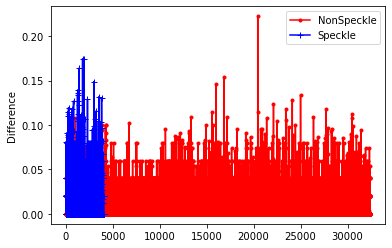

In [47]:
#plot train 
import matplotlib.pyplot as plt
y = diff_df_nonspec["HVQK_VMIN_DIFF_ARRAY_CORE_PBIST_L2SSA_132110"].to_numpy()
z = diff_df_spec["HVQK_VMIN_DIFF_ARRAY_CORE_PBIST_L2SSA_132110"].to_numpy()
plt.plot(y,marker='.', color='r', label= 'NonSpeckle')
plt.plot(z, marker = '+', color = 'b',label = 'Speckle')
plt.legend()
plt.ylabel('Difference')
# plt.savefig(dataprep_path+'difference_train.png')

Text(0, 0.5, 'Difference')

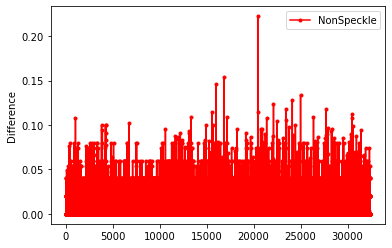

In [48]:
import matplotlib.pyplot as plt
y = diff_df_nonspec["HVQK_VMIN_DIFF_ARRAY_CORE_PBIST_L2SSA_132110"].to_numpy()
# z = diff_df_spec["HVQK_VMIN_DIFF_ARRAY_CORE_PBIST_L2SSA_132110"].to_numpy()
plt.plot(y,marker='.', color='r', label= 'NonSpeckle')
# plt.plot(z, marker = '+', color = 'b',label = 'Speckle')
plt.legend()
plt.ylabel('Difference')
# plt.savefig(dataprep_path+'difference_train_nonspec.png')

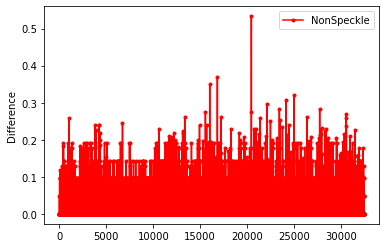

In [31]:
import matplotlib.pyplot as plt
y = diff_df_nonspec["HVQK_VMIN_DIFF_ARRAY_CORE_PBIST_L2SSA_132110"].to_numpy()
# z = diff_df_spec["HVQK_VMIN_DIFF_ARRAY_CORE_PBIST_L2SSA_132110"].to_numpy()
plt.plot(y,marker='.', color='r', label= 'NonSpeckle')
# plt.plot(z, marker = '+', color = 'b',label = 'Speckle')
plt.legend()
plt.ylabel('Difference')
plt.savefig(dataprep_path+'difference_train_nonspec.png')

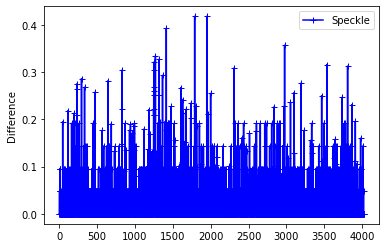

In [32]:
import matplotlib.pyplot as plt
# y = diff_df_nonspec["HVQK_VMIN_DIFF_ARRAY_CORE_PBIST_L2SSA_132110"].to_numpy()
z = diff_df_spec["HVQK_VMIN_DIFF_ARRAY_CORE_PBIST_L2SSA_132110"].to_numpy()
# plt.plot(y,marker='.', color='r', label= 'NonSpeckle')
plt.plot(z, marker = '+', color = 'b',label = 'Speckle')
plt.legend()
plt.ylabel('Difference')
plt.savefig(dataprep_path+'difference_train_spec.png')

In [25]:
diff_val_df_spec = diff_val_df[diff_val_df["SPECKLE"] == 1]
diff_val_df_nonspec = diff_val_df[diff_val_df["SPECKLE"] == 0]
print(diff_val_df_spec.shape)
print(diff_val_df_nonspec.shape)

(1725, 21)
(13891, 21)


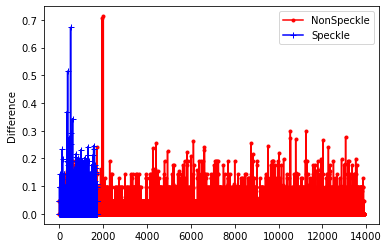

In [26]:
#plot val
import matplotlib.pyplot as plt
y = diff_val_df_nonspec["HVQK_VMIN_DIFF_ARRAY_CORE_PBIST_L2SSA_132110"].to_numpy()
z = diff_val_df_spec["HVQK_VMIN_DIFF_ARRAY_CORE_PBIST_L2SSA_132110"].to_numpy()
plt.plot(y,marker='.', color='r', label= 'NonSpeckle')
plt.plot(z, marker = '+', color = 'b',label = 'Speckle')
plt.legend()
plt.ylabel('Difference')
plt.savefig(dataprep_path+'difference_val.png')

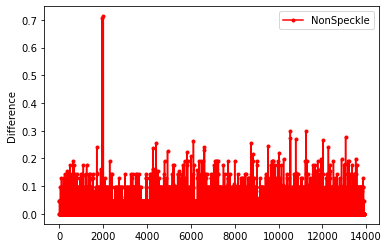

In [33]:
#plot val
import matplotlib.pyplot as plt
y = diff_val_df_nonspec["HVQK_VMIN_DIFF_ARRAY_CORE_PBIST_L2SSA_132110"].to_numpy()
# z = diff_val_df_spec["HVQK_VMIN_DIFF_ARRAY_CORE_PBIST_L2SSA_132110"].to_numpy()
plt.plot(y,marker='.', color='r', label= 'NonSpeckle')
# plt.plot(z, marker = '+', color = 'b',label = 'Speckle')
plt.legend()
plt.ylabel('Difference')
plt.savefig(dataprep_path+'difference_val_nonspec.png')

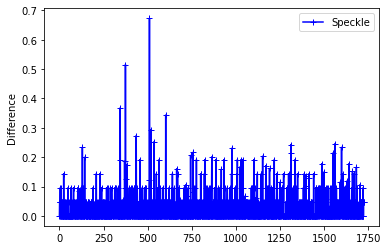

In [35]:
#plot val
import matplotlib.pyplot as plt
# y = diff_val_df_nonspec["HVQK_VMIN_DIFF_ARRAY_CORE_PBIST_L2SSA_132110"].to_numpy()
z = diff_val_df_spec["HVQK_VMIN_DIFF_ARRAY_CORE_PBIST_L2SSA_132110"].to_numpy()
# plt.plot(y,marker='.', color='r', label= 'NonSpeckle')
plt.plot(z, marker = '+', color = 'b',label = 'Speckle')
plt.legend()
plt.ylabel('Difference')
plt.savefig(dataprep_path+'difference_val_spec.png')

### Split validation result to set 1 and 2

In [3]:
path = "C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/"
import pandas as pd
val = pd.read_csv(path + "ModelBuilding/MergedData_SameVID/Boruta/SVM/DataSplit/FP_addtotrain/Val_results.csv")
# val["Set"]=2
# cols = val.columns.tolist()
# cols = [cols[-1]]+cols[:-1] #move speckle col to the front
# val = val.reindex(columns=cols)
val

C:\Users\nchong\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,VID,SORTLOT,WAFER,XLOC,YLOC,TEST RESULTS,TEST RESULTS BITS,TR_BITS,INCOMING,INCOMING BITS,...,HVQK_VMIN_POST_ARRAY_NAC_MBIST_SSARMN2_132110,HVQK_VMIN_POST_ARRAY_UNCORE_MBIST_LSAPCIE_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSARMN0_132110,IDV_0235_NOMMUXFEM12_FULLDIE_0650_MED_132110,HVQK_VMIN_POST_SCAN_UNCORE_CLM_132110,TPI_VCC_X::CONT_PARALLEL_HC_E_START_X_X_X_X_MIMS_SNR_ALL_VCCPAR_HCDPS_VCCDDR_DQ_HV_132150,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_LGSPARE_1,TPI_VCC::CONT_PARALLEL_VLC_E_START_X_X_X_X_POSTSURGE_SNR_MIMS_SNR_ALL_VCCPAR_VLCDPS_VCCFUSE3_132110,SPECKLE,PRED_SPECKLE
0,M0118LB500644,N0293010,594,3,3,B000100,100,1.0,B000000,0.0,...,0.348221,0.309809,0.531328,0.596059,0.395301,0.403749,0.377406,0.169277,1,0
1,M0310QS400090,N0284310,248,-1,-8,B100100,100100,2.0,B100000,100000.0,...,0.454958,0.403907,0.837093,0.620692,0.414651,0.413333,0.330544,0.179859,1,1
2,M0310QS400093,N0284310,248,0,-5,B001100,1100,2.0,B000000,0.0,...,0.346707,0.307815,0.654762,0.522168,0.324464,0.240836,0.400837,0.157882,1,1
3,M038791100022,N0284200,295,-4,-8,B000011,11,2.0,B000001,1.0,...,0.360333,0.318979,0.669799,0.453200,0.365930,0.408637,0.230126,0.139975,1,0
4,M03B8Q3300001,N0371390,958,6,-2,B000011,11,2.0,B000010,10.0,...,0.302044,0.242424,0.459273,0.566503,0.207326,0.368412,0.102929,0.092765,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13699,M1MV022301131,N037084,674,-3,-1,B000000,0,0.0,B000000,0.0,...,0.227101,0.239234,0.375940,0.610838,0.175536,0.276575,0.181590,0.058335,0,0
13700,M05C0K5600949,N029323,212,0,-2,B000010,10,1.0,B000010,10.0,...,0.151400,0.105662,0.125313,0.886703,0.069109,0.579540,0.240167,0.145673,0,0
13701,M1KN334000473,N037138,122,4,-2,B000000,0,0.0,B000000,0.0,...,0.274413,0.202552,0.541353,0.763546,0.276434,0.453360,0.205021,0.221370,0,0
13702,M1T32N1702230,N037084,665,0,-2,B000000,0,0.0,B000000,0.0,...,0.151400,0.152313,0.250627,0.674876,0.829302,0.377222,0.265272,0.336952,0,0


In [ ]:
# import pandas as pd
# df_set1 = pd.read_csv(path + "DataPreparation/SNR_R5_ww51.4/SupFeatures_Val.csv")
# df_set1
# val.loc[val["VID"].isin(df_set1["VID"]), 'Set'] = 1
# val
# val.to_csv(path + "ModelBuilding/MergedData_SameVID/Boruta/SVM/6kSet2_inSet1Train_MergedSpeckle/Val_results.csv",index=False)

In [5]:
def val_result_split(val,set_num):
    
    val_set = val[val["Set"]==set_num]
    y_val = val_set["SPECKLE"]
    y_pred = val_set["PRED_SPECKLE"]
    
    import numpy as np
    from sklearn import metrics

    class_accuracies = []

    for class_ in y_val.sort_values(ascending= True).unique():
        class_acc = round(np.mean(y_pred[y_val == class_] == class_)*100,2)
        class_accuracies.append(class_acc)

    class_acc = pd.DataFrame(class_accuracies,index=['true:0', 'true:1'],columns= ["Accuracy %"])

    cf_matrix = pd.DataFrame(
        metrics.confusion_matrix(y_val, y_pred, labels= [0, 1]), 
        index=['true:0', 'true:1'], 
        columns=['pred:0', 'pred:1']
    )

    ascend = None #input None/True/False to order the confusion matrix
    if ascend == None:
        cf_matrix = pd.concat([cf_matrix,class_acc],axis=1)
    else:
        cf_matrix = pd.concat([cf_matrix,class_acc],axis=1).sort_values(by=['Accuracy %'], ascending=ascend)

    #change as required
    cf_matrix.to_csv(model_path + "Confusion_matrix_set"+ str(set_num) + ".csv") 

    display(cf_matrix)


In [7]:
model_path = path + "ModelBuilding/MergedData_SameVID/Boruta/SVM/DataSplit/FP_addtotrain/"
set_num = 2
val_result_split(val,set_num)

,pred:0,pred:1,Accuracy %
true:0,6804,1429,82.64
true:1,242,946,79.63


#### Validation result analysis

In [1]:
path = "C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/"
import pandas as pd
val = pd.read_csv(path + "ModelBuilding/MergedData_SameVID/Boruta/SVM/Val_results.csv")
# val["Set"]=2
# cols = val.columns.tolist()
# cols = [cols[-1]]+cols[:-1] #move speckle col to the front
# val = val.reindex(columns=cols)
val

,Set,VID,SORTLOT,WAFER,XLOC,YLOC,TEST RESULTS,TEST RESULTS BITS,TR_BITS,INCOMING,...,PTH_POWER::POWER_X_SCREEN_E_BEGIN_X_X_X_X_CALC_PP_PT_CDYN_VCCVNN_0P95_F2_132110,TPI_SIU_STATIC::SIU_STATIC_AM_K_STRESS_X_X_X_SNR_HIGHV_SIUP_SICC_VCCDDR_DQ_HV_HIGHV_132110,TPI_VCC::CONT_PARALLEL_HC_E_START_X_X_X_X_POSTSURGE_SNR_MIMS_SNR_ALL_VCCPAR_HCDPS_VCCDDR_DQ_HV_132110,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_LGSPARE_2,HVQK_VMIN_POST_SCAN_UNCORE_HQM_132110,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132150_NAC_DBG_SPARE_0,HVQK_VMIN_PRE_SCAN_UNCORE_SA_132110,HVQK_VMIN_PRE_ARRAY_UNCORE_CABIST_SSAPMRC_132110,SPECKLE,PRED_SPECKLE
0,1,M0118LB500644,N0293010,594,3,3,B000100,100,1.0,B000000,...,0.471997,0.243943,0.260290,0.249515,0.302745,0.222661,0.348769,0.205556,1,1
1,1,M0310QS400090,N0284310,248,-1,-8,B100100,100100,2.0,B100000,...,0.596086,0.246398,0.310158,0.189320,0.469725,0.179183,0.453901,0.268333,1,1
2,1,M0310QS400093,N0284310,248,0,-5,B001100,1100,2.0,B000000,...,0.461290,0.221349,0.294921,0.248544,0.376081,0.154809,0.430121,0.203889,1,1
3,1,M038791100022,N0284200,295,-4,-8,B000011,11,2.0,B000001,...,0.554295,0.108535,0.083674,0.184466,0.417826,0.068511,0.387151,0.222222,1,1
4,1,M03B8Q3300001,N0371390,958,6,-2,B000011,11,2.0,B000010,...,0.571596,0.191726,0.233971,0.205825,0.242196,0.272727,0.284940,0.155833,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15611,2,M1MV022301131,N037084,674,-3,-1,B000000,0,0.0,B000000,...,0.592859,0.223484,0.134096,0.117476,0.214366,0.107905,0.251564,0.166667,0,0
15612,2,M05C0K5600949,N029323,212,0,-2,B000010,10,1.0,B000010,...,0.777327,0.256891,0.402123,0.238835,0.116209,0.079842,0.147685,0.113889,0,0
15613,2,M1KN334000473,N037138,122,4,-2,B000000,0,0.0,B000000,...,0.495019,0.215007,0.280861,0.152427,0.281685,0.119104,0.413851,0.126111,0,0
15614,2,M1T32N1702230,N037084,665,0,-2,B000000,0,0.0,B000000,...,0.655660,0.194852,0.228942,0.532039,0.157578,0.169565,0.191489,0.148056,0,0


In [33]:
import numpy as np
from sklearn import metrics
from collections import Counter

col = "IB@6261[CLASSHOT]"

#Create empty df
column_names = [col,'TN %','TP %','TN Amount','TP Amount','NonSpeckle Amount','Speckle Amount','Total']
# column_names = [col,'Accuracy NonSpeckle','Accuracy Speckle','Amount NonSpeckle','Amount Speckle','Total']
results = pd.DataFrame(columns = column_names)

def perf_measure(y_val, y_pred):
    """
    compute True positive and true negative amount
    """
    TP = 0           
    TN = 0            

    for j in range(len(y_pred)): 
        if y_val[j]==y_pred[j]==1: #SPECKLE
            TP += 1

        if y_val[j]==y_pred[j]==0: #NONSPECKLE
            TN += 1              

    return TP,TN

for i in np.unique(val[col].values):
#     print(i)
    val_filt = val[val[col]==i]
    y_val = val_filt["SPECKLE"]    
    y_pred = val_filt["PRED_SPECKLE"]    
    amount = Counter(y_val)    

    class_accuracies = [0.0,0.0] #initialize speckle/nonspeckle accuracy as 0 
    class_amount = [0,0] #initialize speckle/nonspeckle amount as 0 
    
    for class_ in y_val.sort_values(ascending= True).unique(): #class_ is s/ns
        
        class_acc = round(np.mean(y_pred[y_val == class_] == class_)*100,2)
        class_accuracies[class_]=class_acc
        class_amount[class_] = amount[class_]         
        
        TP,TN = perf_measure(y_val.reset_index(drop=True), y_pred.reset_index(drop=True))        
        new_row = {col:i, 'TN %':class_accuracies[0], 'TP %': class_accuracies[1],'TN Amount': TN, 'TP Amount': TP, 'NonSpeckle Amount':class_amount[0],'Speckle Amount':class_amount[1],'Total':class_amount[0]+class_amount[1]}
    
    #append row to the dataframe
    results = results.append(new_row, ignore_index=True).sort_values(['Total'], ascending=False)
    
display(results)

import os
results_path = path + 'SupportingFS_Analysis/IB/' 
if not os.path.exists(results_path):
    os.makedirs(results_path)    
results.to_csv(results_path+"AccuracyAcctoIB.csv",index=False)

,IB@6261[CLASSHOT],TN %,TP %,TN Amount,TP Amount,NonSpeckle Amount,Speckle Amount,Total
0,1.0,73.59,79.56,9818.0,1203.0,13342.0,1512.0,14854.0
1,14.0,44.53,94.05,171.0,158.0,384.0,168.0,552.0
2,60.0,7.69,89.29,5.0,25.0,65.0,28.0,93.0
3,42.0,82.14,100.00,23.0,3.0,28.0,3.0,31.0
4,28.0,76.92,100.00,10.0,2.0,13.0,2.0,15.0
5,54.0,50.00,100.00,5.0,1.0,10.0,1.0,11.0
6,16.0,87.50,66.67,7.0,2.0,8.0,3.0,11.0
7,41.0,85.71,100.00,6.0,2.0,7.0,2.0,9.0
8,52.0,100.00,50.00,5.0,1.0,5.0,2.0,7.0
10,21.0,50.00,0.00,3.0,0.0,6.0,0.0,6.0


In [7]:
import pandas as pd
import re 

path = "C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/"
dataprep_path = path + "/DataPreparation/MergedData_SameVID/"
X_train_scaled = pd.read_csv(dataprep_path+"TrainData_Corr0.95Rem.csv")
y_train = X_train_scaled["SPECKLE"]
X_train_scaled = X_train_scaled.drop(["SPECKLE"],axis=1)

X_val_scaled = pd.read_csv(dataprep_path+"ValData_Normalized.csv")
y_val = X_val_scaled["SPECKLE"]
X_val_scaled = X_val_scaled.drop(["SPECKLE"],axis=1)

# features = pd.read_csv(path + "/FeatureSelection/MergedDataset/Boruta.csv")
features = pd.read_csv(path + "/FeatureSelection/MergedData_SameVID/Boruta.csv")
# features = pd.read_csv(path + "/FeatureSelection/15kdata_51.4/Boruta.csv")
# features['Feature'] = features['Feature'].str.replace('@','_')
# features=features[~features['Feature'].isin(['IDV_0004_NOM3GNES12_FULLDIE_SOC_0650_MED_132110', 'TPI_VCC_X::CONT_PARALLEL_HC_E_START_X_X_X_X_SNR_ALL_VCCPAR_HCDPS_VCCVNN_132150', 'IDV_0009_NOM1GISO12_FULLDIE_SOC_0650_MED_132110', 'IDV_0007_SVT1GNES12_FULLDIE_SOC_0650_MED_132110'])]
# # n=300
# features = features.head(n)[["Feature"]] #choose the top n important features
X_train_scaled = X_train_scaled[features["Feature"]] #filter X_train_scaled with top n important features
X_val_scaled = X_val_scaled[features["Feature"]] #filter X_val_scaled with top n important features

print(X_train_scaled.shape)
print(X_val_scaled.shape)
print(y_train.value_counts())
print(y_val.value_counts())

(36434, 378)
(15616, 378)
0    32409
1     4025
Name: SPECKLE, dtype: int64
0    13891
1     1725
Name: SPECKLE, dtype: int64


In [2]:
%%time
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
svm = SVC(C=1,kernel='rbf',gamma='scale',class_weight='balanced',random_state=42)
model = CalibratedClassifierCV(svm,method="isotonic") 
model.fit(X_train_scaled, y_train)
y_proba = model.predict_proba(X_val_scaled)

Wall time: 27min 32s


In [3]:
y_proba

array([[0.86856178, 0.13143822],
       [0.72158818, 0.27841182],
       [0.69590258, 0.30409742],
       ...,
       [0.99278763, 0.00721237],
       [0.99547953, 0.00452047],
       [0.97336685, 0.02663315]])

In [19]:
y_proba #sigmoid

array([[0.88337271, 0.11662729],
       [0.72063963, 0.27936037],
       [0.68377027, 0.31622973],
       ...,
       [0.98677509, 0.01322491],
       [0.99099777, 0.00900223],
       [0.9748467 , 0.0251533 ]])

In [9]:
model_path = path + "ModelBuilding/MergedData_SameVID/Boruta/SVM/Probability/"
import joblib
model = joblib.load(model_path+ "SVMmodel.joblib")

In [13]:
y_proba = model.predict_proba(X_val_scaled)
y_proba

array([[0.88741258, 0.11258742],
       [0.7182957 , 0.2817043 ],
       [0.66938073, 0.33061927],
       ...,
       [0.98849918, 0.01150082],
       [0.99126911, 0.00873089],
       [0.97540711, 0.02459289]])

In [14]:
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [10]:
import joblib
import numpy as np
from sklearn import metrics

#make folder for SVM if it doesn't exist
import os
# model_path = path + 'ModelBuilding/MergedData_SameVID/SVM/Boruta/Prob_Calibrated/' 
if not os.path.exists(model_path):
    os.makedirs(model_path)

# model = joblib.load(model_path + "SVMmodel.joblib")
#MODEL SAVING   
# joblib.dump(model, model_path+"SVMmodel.joblib")

# Predicting the classes for validation set
y_pred = model.predict(X_val_scaled)

#overall accuracy
overall_acc = round(metrics.accuracy_score(y_val, y_pred)*100,2)
overall_acc = {'Overall Acc %':overall_acc}
overall_acc = pd.DataFrame([overall_acc])
overall_acc.to_csv(model_path+"Overall_Accuracy.csv")

#classification report
report = metrics.classification_report(y_val, y_pred,zero_division=0,output_dict=True)
report = pd.DataFrame(report).transpose()
report.to_csv(model_path+"Classification_Report.csv")

#confusion matrix with accuracies for each label
class_accuracies = []

for class_ in y_val.sort_values(ascending= True).unique():
    class_acc = round(np.mean(y_pred[y_val == class_] == class_)*100,2)
    class_accuracies.append(class_acc)
    
class_acc = pd.DataFrame(class_accuracies,index=['true:0', 'true:1'],columns= ["Accuracy %"])

cf_matrix = pd.DataFrame(
    metrics.confusion_matrix(y_val, y_pred, labels= [0, 1]), 
    index=['true:0', 'true:1'], 
    columns=['pred:0', 'pred:1']
)

ascend = None #input None/True/False to order the confusion matrix
if ascend == None:
    cf_matrix = pd.concat([cf_matrix,class_acc],axis=1)
else:
    cf_matrix = pd.concat([cf_matrix,class_acc],axis=1).sort_values(by=['Accuracy %'], ascending=ascend)

cf_matrix.to_csv(model_path+"Confusion_Matrix.csv")   

#validation results 
X_val_sf = pd.read_csv(dataprep_path+"SupFeatures_Val.csv")
val_results = pd.concat([X_val_sf,X_val_scaled,pd.DataFrame(y_val),pd.DataFrame(y_pred,columns = ["PRED_SPECKLE"])],axis=1)
val_results.to_csv(model_path+"Val_results.csv",index=False) 


In [11]:
display(cf_matrix)

,pred:0,pred:1,Accuracy %
true:0,10066,3825,72.46
true:1,324,1401,81.22


In [7]:
path = "C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/"
model_path = path + "ModelBuilding/MergedData_SameVID/Boruta/SVM/Probability/"
import joblib
model = joblib.load(model_path+"SVMmodel.joblib")

In [9]:
import pandas as pd
val = pd.read_csv(path + "DataPreparation/MergedData_SameVID/ValData_Normalized.csv")
features = pd.read_csv(path + "/FeatureSelection/MergedData_SameVID/Boruta.csv")
val = val[features["Feature"]]
val

,HVQK_VMIN_PRE_ARRAY_CORE_PBIST_L2SSA_132110,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110,IDV_0148_SVTNLK12_FULLDIE_CORE_TALL_0950S_MED_132150,HVQK_VMIN_PRE_ARRAY_CORE_PBIST_L2SSAC6S_132110,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSAC6S_132110,TPI_VCC::CONT_PARALLEL_LC_E_FINAL_X_X_X_X_SNR_MIMS_SNR_ALL_VCCPAR_LCDPS_VCCAOPI_132110,IDV_0048_SVTNLK12_FULLDIE_SOC_0950_MED_132110,TPI_VCC_X::CONT_X_SCREEN_K_BEGIN_X_X_X_X_VCCADTL_VCCIN_EHV_LC_ADTL_132150,TPI_VCC::CONT_PARALLEL_HC_E_START_X_X_X_X_POSTSURGE_SNR_MIMS_SNR_ALL_VCCPAR_HCDPS_VCCINF_132110,IDV_0147_NOMNLK12_FULLDIE_SOC_TALL_0650_MED_132110,...,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_FBRK_N_CPU,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSACPMPKE_132110,PTH_POWER::POWER_X_SCREEN_E_BEGIN_X_X_X_X_CALC_PP_PT_CDYN_VCCVNN_0P95_F2_132110,TPI_SIU_STATIC::SIU_STATIC_AM_K_STRESS_X_X_X_SNR_HIGHV_SIUP_SICC_VCCDDR_DQ_HV_HIGHV_132110,TPI_VCC::CONT_PARALLEL_HC_E_START_X_X_X_X_POSTSURGE_SNR_MIMS_SNR_ALL_VCCPAR_HCDPS_VCCDDR_DQ_HV_132110,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_LGSPARE_2,HVQK_VMIN_POST_SCAN_UNCORE_HQM_132110,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132150_NAC_DBG_SPARE_0,HVQK_VMIN_PRE_SCAN_UNCORE_SA_132110,HVQK_VMIN_PRE_ARRAY_UNCORE_CABIST_SSAPMRC_132110
0,0.143816,0.143816,0.389047,0.092550,0.092550,0.134598,0.261214,0.581091,0.069626,0.008483,...,0.363140,0.179567,0.471997,0.243943,0.260290,0.249515,0.302745,0.222661,0.348769,0.205556
1,0.507430,0.555369,0.551876,0.396576,0.396576,0.182622,0.401055,0.571749,0.108443,0.013869,...,0.313050,0.314741,0.596086,0.246398,0.310158,0.189320,0.469725,0.179183,0.453901,0.268333
2,0.477229,0.525168,0.369810,0.379454,0.379454,0.142545,0.303430,0.544096,0.093407,0.010773,...,0.228203,0.235344,0.461290,0.221349,0.294921,0.248544,0.376081,0.154809,0.430121,0.203889
3,0.322627,0.322627,0.287344,0.208468,0.208468,0.096248,0.174142,0.606689,0.054016,0.002630,...,0.194469,0.192089,0.554295,0.108535,0.083674,0.184466,0.417826,0.068511,0.387151,0.222222
4,0.410834,0.458773,0.587932,0.303100,0.303100,0.058935,0.852243,0.568759,0.068676,0.008016,...,0.155624,0.199772,0.571596,0.191726,0.233971,0.205825,0.242196,0.272727,0.284940,0.155833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15611,0.186002,0.186002,0.103227,0.138825,0.138825,0.054274,0.063325,0.653401,0.030031,0.001824,...,0.223092,0.171599,0.592859,0.223484,0.134096,0.117476,0.214366,0.107905,0.251564,0.166667
15612,0.047939,0.047939,0.236098,0.000000,0.000000,0.148373,0.158311,0.642190,0.101626,0.007507,...,0.231270,0.055208,0.777327,0.256891,0.402123,0.238835,0.116209,0.079842,0.147685,0.113889
15613,0.095877,0.095877,0.393882,0.099491,0.099491,0.107156,0.295515,0.589499,0.080398,0.008610,...,0.298738,0.235060,0.495019,0.215007,0.280861,0.152427,0.281685,0.119104,0.413851,0.126111
15614,0.216203,0.264142,0.164407,0.159417,0.159417,0.097789,0.102902,0.634155,0.050733,0.002248,...,0.431631,0.056915,0.655660,0.194852,0.228942,0.532039,0.157578,0.169565,0.191489,0.148056


In [10]:
prediction = model.predict_proba(val)
prediction

array([[0.88741258, 0.11258742],
       [0.7182957 , 0.2817043 ],
       [0.66938073, 0.33061927],
       ...,
       [0.98849918, 0.01150082],
       [0.99126911, 0.00873089],
       [0.97540711, 0.02459289]])

In [14]:
model.predict(val)

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [11]:
pd.DataFrame(prediction,columns = ["NonSpeckle_Prob","Speckle_Prob"]).to_csv(model_path+"prob.csv",index=False)

In [13]:
val_results = pd.read_csv(model_path+ "Val_results.csv")
val_results

,VID,SORTLOT,WAFER,XLOC,YLOC,TEST RESULTS,TEST RESULTS BITS,TR_BITS,INCOMING,INCOMING BITS,...,PTH_POWER::POWER_X_SCREEN_E_BEGIN_X_X_X_X_CALC_PP_PT_CDYN_VCCVNN_0P95_F2_132110,TPI_SIU_STATIC::SIU_STATIC_AM_K_STRESS_X_X_X_SNR_HIGHV_SIUP_SICC_VCCDDR_DQ_HV_HIGHV_132110,TPI_VCC::CONT_PARALLEL_HC_E_START_X_X_X_X_POSTSURGE_SNR_MIMS_SNR_ALL_VCCPAR_HCDPS_VCCDDR_DQ_HV_132110,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_LGSPARE_2,HVQK_VMIN_POST_SCAN_UNCORE_HQM_132110,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132150_NAC_DBG_SPARE_0,HVQK_VMIN_PRE_SCAN_UNCORE_SA_132110,HVQK_VMIN_PRE_ARRAY_UNCORE_CABIST_SSAPMRC_132110,SPECKLE,PRED_SPECKLE
0,M0118LB500644,N0293010,594,3,3,B000100,100,1.0,B000000,0.0,...,0.471997,0.243943,0.260290,0.249515,0.302745,0.222661,0.348769,0.205556,1,1
1,M0310QS400090,N0284310,248,-1,-8,B100100,100100,2.0,B100000,100000.0,...,0.596086,0.246398,0.310158,0.189320,0.469725,0.179183,0.453901,0.268333,1,1
2,M0310QS400093,N0284310,248,0,-5,B001100,1100,2.0,B000000,0.0,...,0.461290,0.221349,0.294921,0.248544,0.376081,0.154809,0.430121,0.203889,1,1
3,M038791100022,N0284200,295,-4,-8,B000011,11,2.0,B000001,1.0,...,0.554295,0.108535,0.083674,0.184466,0.417826,0.068511,0.387151,0.222222,1,1
4,M03B8Q3300001,N0371390,958,6,-2,B000011,11,2.0,B000010,10.0,...,0.571596,0.191726,0.233971,0.205825,0.242196,0.272727,0.284940,0.155833,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15611,M1MV022301131,N037084,674,-3,-1,B000000,0,0.0,B000000,0.0,...,0.592859,0.223484,0.134096,0.117476,0.214366,0.107905,0.251564,0.166667,0,0
15612,M05C0K5600949,N029323,212,0,-2,B000010,10,1.0,B000010,10.0,...,0.777327,0.256891,0.402123,0.238835,0.116209,0.079842,0.147685,0.113889,0,0
15613,M1KN334000473,N037138,122,4,-2,B000000,0,0.0,B000000,0.0,...,0.495019,0.215007,0.280861,0.152427,0.281685,0.119104,0.413851,0.126111,0,0
15614,M1T32N1702230,N037084,665,0,-2,B000000,0,0.0,B000000,0.0,...,0.655660,0.194852,0.228942,0.532039,0.157578,0.169565,0.191489,0.148056,0,0


In [9]:
path = "C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/"
import pandas as pd
val_new = pd.read_csv(path + "ModelBuilding/MergedData_SameVID/Boruta/SVM/DataSplit/FP_addtotrain/Val_results.csv")
val_old = pd.read_csv(path + "ModelBuilding/MergedData_SameVID/Boruta/SVM/Val_results.csv")

C:\Users\nchong\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [18]:
val_new_FP = val_new[(val_new["SPECKLE"]==0) & (val_new["PRED_SPECKLE"]==1)]
val_new_FP

,VID,SORTLOT,WAFER,XLOC,YLOC,TEST RESULTS,TEST RESULTS BITS,TR_BITS,INCOMING,INCOMING BITS,...,HVQK_VMIN_POST_ARRAY_NAC_MBIST_SSARMN2_132110,HVQK_VMIN_POST_ARRAY_UNCORE_MBIST_LSAPCIE_132110,HVQK_VMIN_POST_ARRAY_NAC_MBIST_LSARMN0_132110,IDV_0235_NOMMUXFEM12_FULLDIE_0650_MED_132110,HVQK_VMIN_POST_SCAN_UNCORE_CLM_132110,TPI_VCC_X::CONT_PARALLEL_HC_E_START_X_X_X_X_MIMS_SNR_ALL_VCCPAR_HCDPS_VCCDDR_DQ_HV_132150,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_LGSPARE_1,TPI_VCC::CONT_PARALLEL_VLC_E_START_X_X_X_X_POSTSURGE_SNR_MIMS_SNR_ALL_VCCPAR_VLCDPS_VCCFUSE3_132110,SPECKLE,PRED_SPECKLE
8,M03B8Q3300020,N0286310,969,-2,-9,B000000,0,0.0,B000000,0.0,...,0.250946,0.278309,0.372180,0.591135,0.230477,0.385781,0.218410,0.231138,0,1
9,M03B8Q3300027,N0286310,969,-1,-9,B000001,1,1.0,B000001,1.0,...,0.244890,0.269936,0.488722,0.591135,0.223220,0.416327,0.193305,0.236836,0,1
34,M03B8Q3300625,N042206A,655,2,-7,B000100,100,1.0,B000100,100.0,...,0.330053,0.252791,0.509398,0.763546,0.276434,0.665105,0.417573,0.343464,0,1
37,M03B8Q3300683,N0371040,710,5,-6,B000001,1,1.0,B000001,1.0,...,0.334974,0.370415,0.511278,0.408865,0.241189,0.284559,0.489540,0.136719,0,1
46,M03B8Q3300839,N0371390,971,5,-3,B000000,0,0.0,B000000,0.0,...,0.309992,0.223285,0.603383,0.793103,0.276434,0.593873,0.215063,0.278347,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13646,M08E5K2300123,N036652,792,3,7,B000010,10,1.0,B000010,10.0,...,0.201741,0.126794,0.295113,0.812811,0.483760,0.544064,0.179916,0.132649,0,1
13660,M18Q2U8001078,N036652,800,-2,-1,B000000,0,0.0,B000000,0.0,...,0.227101,0.239234,0.375940,0.576357,0.138217,0.308104,0.213389,0.160324,0,1
13672,M03B8Q3301009,N028415,487,3,7,B000000,0,0.0,B000000,0.0,...,0.469341,0.345295,0.609023,0.669951,0.219765,0.407265,0.278661,0.129393,0,1
13682,M0D409Y100861,N028635,102,-4,-4,B000000,0,0.0,B000000,0.0,...,0.235428,0.225279,0.354637,0.793103,0.276434,0.646598,0.280335,0.287301,0,1


In [19]:
val_old_FP = val_old[(val_old["SPECKLE"]==0) & (val_old["PRED_SPECKLE"]==1)]
val_old_FP

,Set,VID,SORTLOT,WAFER,XLOC,YLOC,TEST RESULTS,TEST RESULTS BITS,TR_BITS,INCOMING,...,PTH_POWER::POWER_X_SCREEN_E_BEGIN_X_X_X_X_CALC_PP_PT_CDYN_VCCVNN_0P95_F2_132110,TPI_SIU_STATIC::SIU_STATIC_AM_K_STRESS_X_X_X_SNR_HIGHV_SIUP_SICC_VCCDDR_DQ_HV_HIGHV_132110,TPI_VCC::CONT_PARALLEL_HC_E_START_X_X_X_X_POSTSURGE_SNR_MIMS_SNR_ALL_VCCPAR_HCDPS_VCCDDR_DQ_HV_132110,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_LGSPARE_2,HVQK_VMIN_POST_SCAN_UNCORE_HQM_132110,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132150_NAC_DBG_SPARE_0,HVQK_VMIN_PRE_SCAN_UNCORE_SA_132110,HVQK_VMIN_PRE_ARRAY_UNCORE_CABIST_SSAPMRC_132110,SPECKLE,PRED_SPECKLE
5,1,M03B8Q3300013,N0286310,968,4,6,B000000,0,0.0,B000000,...,0.481933,0.225748,0.245053,0.260194,0.364799,0.197628,0.335002,0.166667,0,1
9,1,M03B8Q3300020,N0286310,969,-2,-9,B000000,0,0.0,B000000,...,0.438258,0.175696,0.289380,0.214563,0.274539,0.162055,0.318732,0.182222,0,1
10,1,M03B8Q3300027,N0286310,969,-1,-9,B000001,1,1.0,B000001,...,0.656898,0.185719,0.261675,0.170874,0.342234,0.206851,0.310805,0.175833,0,1
35,1,M03B8Q3300625,N042206A,655,2,-7,B000100,100,1.0,B000100,...,0.534609,0.258272,0.488852,0.266990,0.330575,0.231884,0.302461,0.104444,0,1
38,1,M03B8Q3300683,N0371040,710,5,-6,B000001,1,1.0,B000001,...,0.364362,0.132924,0.261564,0.111650,0.285822,0.197628,0.414268,0.302500,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15592,2,M04A8C8101121,N028672,817,-5,-4,B000000,0,0.0,B000000,...,0.585459,0.229971,0.419826,0.082233,0.360662,0.200264,0.417605,0.185000,0,1
15599,2,M16S0Q6100986,N036655,311,3,-6,B010000,10000,1.0,B010000,...,0.619188,0.227500,0.554844,0.364078,0.353140,0.308300,0.409679,0.178611,0,1
15600,2,M00C045U00516,N028413,436,2,1,B101000,101000,2.0,B101000,...,0.819158,0.249433,0.360511,0.128155,0.244077,0.094466,0.287025,0.157222,0,1
15601,2,M0MG487801591,N029279,118,3,-1,B000000,0,0.0,B000000,...,0.640531,0.219287,0.265665,0.268932,0.440015,0.104480,0.418440,0.250278,0,1


In [20]:
len((set(val_new_FP["VID"]).intersection(set(val_old_FP["VID"]))))

1840

In [6]:
import pandas as pd
path = 'C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/'
train = pd.read_csv(path+"DataPreparation/MergedData_SameVID/TrainData.csv")
cols = train.columns.tolist()
cols = [cols[-1]]+cols[:-1] #move speckle col to the front
train = train.reindex(columns=cols)
train

,SPECKLE,VID,SORTLOT,WAFER,XLOC,YLOC,IB@6261[CLASSHOT],FB@6261[CLASSHOT],TEST RESULTS,TEST RESULTS BITS,...,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_SVIDCLK1,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_SVIDDATA0,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_SVIDDATA1,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TAP_DIS_STRAP_N,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TAP_ODT_EN,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TXT_AGENT,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_TXT_PLTEN,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_VPPSMBUSSCL,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_VPPSMBUSSDA,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_VSENSEPMAX
0,1,M0118LB500624,N0293010,594,1,9,1,101,B101000,101000,...,-7.900000e-07,-7.830000e-07,-8.270000e-07,-1.800000e-07,-2.040000e-07,-1.950000e-07,-2.240000e-07,-7.780000e-07,-7.550000e-07,-1.720000e-07
1,1,M0118LB500649,N0293010,594,-3,-5,1,101,B101000,101000,...,-9.390000e-07,-9.470000e-07,-9.390000e-07,-2.350000e-07,-2.280000e-07,-2.400000e-07,-2.290000e-07,-9.430000e-07,-9.530000e-07,-2.490000e-07
2,1,M0118LB500823,N0293010,594,5,-3,14,1451,B010100,10100,...,-1.110000e-06,-1.210000e-06,-1.240000e-06,-2.830000e-07,-2.980000e-07,-3.090000e-07,-2.900000e-07,-1.210000e-06,-1.130000e-06,-2.990000e-07
3,1,M0118LB500903,N0293010,585,-6,-3,1,101,B001010,1010,...,-6.380000e-07,-6.860000e-07,-6.600000e-07,-1.560000e-07,-1.700000e-07,-1.630000e-07,-1.470000e-07,-6.330000e-07,-6.490000e-07,-1.500000e-07
4,1,M0310QS400088,N0284310,248,2,-4,1,101,B010001,10001,...,-1.240000e-06,-1.260000e-06,-1.280000e-06,-2.890000e-07,-3.310000e-07,-3.200000e-07,-3.110000e-07,-1.270000e-06,-1.250000e-06,-2.880000e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36429,0,M160552F00840,N037096,166,1,-3,1,101,B000000,0,...,-6.350000e-07,-6.400000e-07,-6.440000e-07,-1.510000e-07,-1.660000e-07,-1.500000e-07,-1.600000e-07,-6.540000e-07,-6.540000e-07,-1.790000e-07
36430,0,M1DB131102243,N029350,610,-2,1,1,101,B000000,0,...,-7.030000e-07,-7.420000e-07,-7.040000e-07,-1.740000e-07,-2.200000e-07,-1.630000e-07,-1.640000e-07,-7.470000e-07,-7.640000e-07,-1.900000e-07
36431,0,M0XP855502329,N026648,80,5,-3,1,101,B000000,0,...,-8.290000e-07,-8.490000e-07,-8.660000e-07,-2.070000e-07,-2.080000e-07,-1.980000e-07,-2.340000e-07,-8.610000e-07,-8.530000e-07,-2.110000e-07
36432,0,M08E5K2300825,N029275,191,3,2,14,1424,B000000,0,...,-1.100000e-06,-1.090000e-06,-1.090000e-06,-2.750000e-07,-2.770000e-07,-2.740000e-07,-2.940000e-07,-1.100000e-06,-1.110000e-06,-3.040000e-07


In [7]:
supporting_fs = ['SORTLOT', 'WAFER', 'XLOC', 'YLOC', 'TEST RESULTS',
       'TEST RESULTS BITS', 'TR_BITS', 'INCOMING', 'INCOMING BITS', 'INC_BITS',
       'OUTGOING', 'OUTGOING BITS', 'OUT_BITS', 'DELTA','IB@6261[CLASSHOT]', 'FB@6261[CLASSHOT]']
rowna_df = check_rowna(train,supporting_fs)
rowna_df

,SPECKLE,VID,Total Null,% of Null
2637,0,M197674101159,1070,67.13
2627,0,M197674101051,1045,65.56
2504,0,M197674100207,1045,65.56
2509,0,M197674100275,1044,65.50
2638,0,M197674101160,1044,65.50
...,...,...,...,...
7705,0,M0310QS400623,1,0.06
7706,0,M1S01D2700761,1,0.06
7707,0,M0DW402601004,1,0.06
7709,0,M0428JP901758,1,0.06


In [8]:
rowna_df.to_csv(path+"/DataPreparation/MergedData_SameVID/NA_rows.csv",index=False)

In [ ]:
#remove more than 10% NA rows from train data

In [18]:
import pandas as pd
path = 'C:/Users/nchong/OneDrive - Intel Corporation/Documents/ML based speckle POC/'
train = pd.read_csv(path+"DataPreparation/MergedData_SameVID/TrainData_Corr0.95Rem.csv")
train_sf = pd.read_csv(path+"DataPreparation/MergedData_SameVID/SupFeatures_Train.csv")
train = pd.concat([train_sf,train],axis=1)

print(train["SPECKLE"].value_counts())
narows = pd.read_csv(path+"DataPreparation/MergedData_SameVID/NA_rows.csv")

0    32409
1     4025
Name: SPECKLE, dtype: int64


In [8]:
train

,VID,SORTLOT,WAFER,XLOC,YLOC,TEST RESULTS,TEST RESULTS BITS,TR_BITS,INCOMING,INCOMING BITS,...,PTH_POWER::POWER_X_ANAMEA_E_BEGIN_X_X_V2_X_FULLCHIPSICC_PP_SICC_VCCIOA_132110,PTH_POWER::POWER_X_ANAMEA_E_BEGIN_X_X_V2_X_FULLCHIPSICC_PP_SICC_VCCRAM_M012345_132110,PTH_POWER_SDT::POWER_X_ANAMEA_E_BEGIN_X_X_V2_X_FULLCHIPSICC_PP_SICC_VCCRAM_M012345_132150,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_SVIDDATA0,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_FIVR_PRB_DIG_1,IDV_0004_NOM3GNES12_FULLDIE_SOC_0650_MED_132110,IDV_0007_SVT1GNES12_FULLDIE_SOC_0650_MED_132110,IDV_0009_NOM1GISO12_FULLDIE_SOC_0650_MED_132110,TPI_VCC_X::CONT_PARALLEL_HC_E_START_X_X_X_X_SNR_ALL_VCCPAR_HCDPS_VCCVNN_132150,SPECKLE
0,M0118LB500624,N0293010,594,1,9,B101000,101000,2.0,B001000,1000.0,...,0.009163,0.030333,0.183166,0.085641,0.188956,0.003915,0.008301,0.002518,0.160906,1
1,M0118LB500649,N0293010,594,-3,-5,B101000,101000,2.0,B100000,100000.0,...,0.002407,0.267767,0.398745,0.124103,0.230371,0.004736,0.008113,0.005886,0.107808,1
2,M0118LB500823,N0293010,594,5,-3,B010100,10100,2.0,B000000,0.0,...,0.006120,0.194285,0.479131,0.186154,0.368421,0.003378,0.006509,0.004155,0.058135,1
3,M0118LB500903,N0293010,585,-6,-3,B001010,1010,2.0,B000000,0.0,...,0.006288,0.173144,0.360603,0.136154,0.140638,0.003883,0.009056,0.002455,0.143610,1
4,M0310QS400088,N0284310,248,2,-4,B010001,10001,2.0,B000001,1.0,...,0.005553,0.142148,0.321909,0.132564,0.404659,0.002305,0.006352,0.003746,0.044033,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36429,M160552F00840,N037096,166,1,-3,B000000,0,0.0,B000000,0.0,...,0.007334,0.195950,0.325853,0.065897,0.137187,0.004167,0.009433,0.004910,0.247187,0
36430,M1DB131102243,N029350,610,-2,1,B000000,0,0.0,B000000,0.0,...,0.007230,0.182928,0.312930,0.175385,0.188956,0.003283,0.007578,0.004155,0.087576,0
36431,M0XP855502329,N026648,80,5,-3,B000000,0,0.0,B000000,0.0,...,0.005911,0.277555,0.392297,0.065897,0.218292,0.003220,0.006289,0.004312,0.122918,0
36432,M08E5K2300825,N029275,191,3,2,B000000,0,0.0,B000000,0.0,...,0.003950,0.316557,0.330287,0.096667,0.352890,0.003189,0.007295,0.002077,0.077130,0


In [10]:
train= train[~train["VID"].isin(narows[narows["% of Null"]>=10]["VID"])]
print(train["SPECKLE"].value_counts())

0    32090
1     3885
Name: SPECKLE, dtype: int64


In [12]:
train.to_csv(path+"DataPreparation/MergedData_SameVID/TrainData_10%NAcolsRem.csv",index=False)

In [19]:
df1 = train[train["SPECKLE"] == 0].reset_index(drop=True)
df1

,VID,SORTLOT,WAFER,XLOC,YLOC,TEST RESULTS,TEST RESULTS BITS,TR_BITS,INCOMING,INCOMING BITS,...,PTH_POWER::POWER_X_ANAMEA_E_BEGIN_X_X_V2_X_FULLCHIPSICC_PP_SICC_VCCIOA_132110,PTH_POWER::POWER_X_ANAMEA_E_BEGIN_X_X_V2_X_FULLCHIPSICC_PP_SICC_VCCRAM_M012345_132110,PTH_POWER_SDT::POWER_X_ANAMEA_E_BEGIN_X_X_V2_X_FULLCHIPSICC_PP_SICC_VCCRAM_M012345_132150,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_SVIDDATA0,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_FIVR_PRB_DIG_1,IDV_0004_NOM3GNES12_FULLDIE_SOC_0650_MED_132110,IDV_0007_SVT1GNES12_FULLDIE_SOC_0650_MED_132110,IDV_0009_NOM1GISO12_FULLDIE_SOC_0650_MED_132110,TPI_VCC_X::CONT_PARALLEL_HC_E_START_X_X_X_X_SNR_ALL_VCCPAR_HCDPS_VCCVNN_132150,SPECKLE
0,M03B8Q3300008,N0286310,968,-3,-4,B000000,0,0.0,B000000,0.0,...,0.006203,0.321371,0.395214,0.162308,0.306299,0.003347,0.007295,0.004470,0.065158,0
1,M03B8Q3300014,N0286310,968,1,-10,B000001,1,1.0,B000001,1.0,...,0.009257,0.058467,0.200614,0.075385,0.171700,0.004262,0.009150,0.004029,0.154344,0
2,M03B8Q3300015,N0286310,968,-2,-3,B000000,0,0.0,B000000,0.0,...,0.007436,0.288921,0.383184,0.230769,0.271786,0.003126,0.007201,0.003872,0.112154,0
3,M03B8Q3300026,N0286310,969,2,4,B000000,0,0.0,B000000,0.0,...,0.004021,0.190187,0.254743,0.038462,0.321829,0.001831,0.005471,0.003179,0.073877,0
4,M03B8Q3300029,N0286310,969,4,6,B000000,0,0.0,B000000,0.0,...,0.007681,0.052187,0.095053,0.037436,0.168248,0.002210,0.005754,0.003022,0.084526,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404,M0B89V9301060,N030399,77,2,5,B000000,0,0.0,B000000,0.0,...,0.002859,0.217140,0.307335,0.080513,0.314927,0.003094,0.006195,0.004061,0.078597,0
32405,M160552F00840,N037096,166,1,-3,B000000,0,0.0,B000000,0.0,...,0.007334,0.195950,0.325853,0.065897,0.137187,0.004167,0.009433,0.004910,0.247187,0
32406,M1DB131102243,N029350,610,-2,1,B000000,0,0.0,B000000,0.0,...,0.007230,0.182928,0.312930,0.175385,0.188956,0.003283,0.007578,0.004155,0.087576,0
32407,M0XP855502329,N026648,80,5,-3,B000000,0,0.0,B000000,0.0,...,0.005911,0.277555,0.392297,0.065897,0.218292,0.003220,0.006289,0.004312,0.122918,0


In [20]:
df2 = train[train["SPECKLE"] == 1].reset_index(drop=True)
df2

,VID,SORTLOT,WAFER,XLOC,YLOC,TEST RESULTS,TEST RESULTS BITS,TR_BITS,INCOMING,INCOMING BITS,...,PTH_POWER::POWER_X_ANAMEA_E_BEGIN_X_X_V2_X_FULLCHIPSICC_PP_SICC_VCCIOA_132110,PTH_POWER::POWER_X_ANAMEA_E_BEGIN_X_X_V2_X_FULLCHIPSICC_PP_SICC_VCCRAM_M012345_132110,PTH_POWER_SDT::POWER_X_ANAMEA_E_BEGIN_X_X_V2_X_FULLCHIPSICC_PP_SICC_VCCRAM_M012345_132150,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_SVIDDATA0,SIO_LKG_X::LO1P05_X_LKG_K_END_X_X_VMAX_X_1MA_PC1_132110_FIVR_PRB_DIG_1,IDV_0004_NOM3GNES12_FULLDIE_SOC_0650_MED_132110,IDV_0007_SVT1GNES12_FULLDIE_SOC_0650_MED_132110,IDV_0009_NOM1GISO12_FULLDIE_SOC_0650_MED_132110,TPI_VCC_X::CONT_PARALLEL_HC_E_START_X_X_X_X_SNR_ALL_VCCPAR_HCDPS_VCCVNN_132150,SPECKLE
0,M0118LB500624,N0293010,594,1,9,B101000,101000,2.0,B001000,1000.0,...,0.009163,0.030333,0.183166,0.085641,0.188956,0.003915,0.008301,0.002518,0.160906,1
1,M0118LB500649,N0293010,594,-3,-5,B101000,101000,2.0,B100000,100000.0,...,0.002407,0.267767,0.398745,0.124103,0.230371,0.004736,0.008113,0.005886,0.107808,1
2,M0118LB500823,N0293010,594,5,-3,B010100,10100,2.0,B000000,0.0,...,0.006120,0.194285,0.479131,0.186154,0.368421,0.003378,0.006509,0.004155,0.058135,1
3,M0118LB500903,N0293010,585,-6,-3,B001010,1010,2.0,B000000,0.0,...,0.006288,0.173144,0.360603,0.136154,0.140638,0.003883,0.009056,0.002455,0.143610,1
4,M0310QS400088,N0284310,248,2,-4,B010001,10001,2.0,B000001,1.0,...,0.005553,0.142148,0.321909,0.132564,0.404659,0.002305,0.006352,0.003746,0.044033,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020,M16H3E9900100,N0366550,320,1,-4,B010100,10100,2.0,B010000,10000.0,...,0.006474,0.227477,0.360311,0.133590,0.316652,0.003126,0.008364,0.004470,0.103521,1
4021,M1KN334000765,N037138,117,5,-2,B000100,100,1.0,B000000,0.0,...,0.007219,0.157055,0.296228,0.056154,0.176877,0.003126,0.006981,0.004438,0.072870,1
4022,M074DK1400268,N036655,312,1,-3,B000100,100,1.0,B000000,0.0,...,0.008443,0.440998,0.544283,0.185385,0.389129,0.004925,0.010502,0.005572,0.208249,1
4023,M0MD768800963,N028691,688,3,-2,B000010,10,1.0,B000000,0.0,...,0.005584,0.180860,0.339606,0.141282,0.254530,0.004357,0.008679,0.004501,0.110629,1


In [21]:
features = pd.read_csv(path+"FeatureSelection/MergedData_SameVID/Boruta.csv")
features

,Feature,Importance
0,HVQK_VMIN_PRE_ARRAY_CORE_PBIST_L2SSA_132110,0.071150
1,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110,0.067378
2,IDV_0148_SVTNLK12_FULLDIE_CORE_TALL_0950S_MED_...,0.042150
3,HVQK_VMIN_PRE_ARRAY_CORE_PBIST_L2SSAC6S_132110,0.041696
4,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSAC6S_132110,0.031535
...,...,...
373,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_P...,0.000086
374,HVQK_VMIN_POST_SCAN_UNCORE_HQM_132110,0.000076
375,SIO_LKG_X::HI1P05_X_LKG_K_END_X_X_VMAX_X_1MA_P...,0.000070
376,HVQK_VMIN_PRE_SCAN_UNCORE_SA_132110,0.000051


In [22]:
df1 = df1[features["Feature"]]
df2 = df2[features["Feature"]]
print(df1.shape)
print(df2.shape)

(32409, 378)
(4025, 378)


In [17]:
#without 10% na
from scipy import stats
from scipy.stats import ks_2samp,wasserstein_distance
from tqdm import tqdm
import numpy as np

features_list = df1.columns.values.tolist()

def standardized_wasserstein_distance(a, b):
    """a and b are numpy arrays."""
    numerator = wasserstein_distance(a, b)
    denominator = np.std(np.concatenate([a, b]))
    return numerator / denominator if denominator != .0 else .0

diff_data = []
for col in tqdm(df1.columns):
    statistic, pvalue = ks_2samp(
        df1[col].values, 
        df2[col].values
    )
    if pvalue <= 0.05:
        wd = standardized_wasserstein_distance(df1[col].values,df2[col].values)        
        diff_data.append({'Feature': col, 'p': np.round(pvalue, 5),'Std Wasserstein Distance':wd})

# Put the differences into a dataframe
diff_df = pd.DataFrame(diff_data).sort_values(by='Std Wasserstein Distance', ascending=False)
diff_df

100%|████████████████████████████████████████████████████████████████████████████████| 378/378 [00:08<00:00, 46.65it/s]


,Feature,p,Std Wasserstein Distance
1,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110,0.00000,1.033187
0,HVQK_VMIN_PRE_ARRAY_CORE_PBIST_L2SSA_132110,0.00000,1.029479
2,IDV_0148_SVTNLK12_FULLDIE_CORE_TALL_0950S_MED_...,0.00000,0.998660
6,IDV_0048_SVTNLK12_FULLDIE_SOC_0950_MED_132110,0.00000,0.980338
13,IDV_0148_SVTNLK12_FULLDIE_SOC_0950_MED_132110,0.00000,0.895197
...,...,...,...
71,TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SN...,0.00631,0.039532
119,IDV_0016_SVTPLK12_FULLDIE_SOC_0650_MED_132110,0.00000,0.036148
291,TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SN...,0.00006,0.027326
186,PTH_POWER::POWER_X_ANAMEA_E_BEGIN_X_X_V2_X_FUL...,0.00024,0.026691


In [23]:
from scipy import stats
from scipy.stats import ks_2samp,wasserstein_distance
from tqdm import tqdm
import numpy as np

features_list = df1.columns.values.tolist()

def standardized_wasserstein_distance(a, b):
    """a and b are numpy arrays."""
    numerator = wasserstein_distance(a, b)
    denominator = np.std(np.concatenate([a, b]))
    return numerator / denominator if denominator != .0 else .0

diff_data = []
for col in tqdm(df1.columns):
    statistic, pvalue = ks_2samp(
        df1[col].values, 
        df2[col].values
    )
    if pvalue <= 0.05:
        wd = standardized_wasserstein_distance(df1[col].values,df2[col].values)        
        diff_data.append({'Feature': col, 'p': np.round(pvalue, 5),'Std Wasserstein Distance':wd})

# Put the differences into a dataframe
diff_df = pd.DataFrame(diff_data).sort_values(by='Std Wasserstein Distance', ascending=False)
diff_df

100%|████████████████████████████████████████████████████████████████████████████████| 378/378 [00:08<00:00, 45.85it/s]


,Feature,p,Std Wasserstein Distance
1,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSA_132110,0.00000,1.039460
0,HVQK_VMIN_PRE_ARRAY_CORE_PBIST_L2SSA_132110,0.00000,1.036924
2,IDV_0148_SVTNLK12_FULLDIE_CORE_TALL_0950S_MED_...,0.00000,1.005298
6,IDV_0048_SVTNLK12_FULLDIE_SOC_0950_MED_132110,0.00000,0.951494
4,HVQK_VMIN_POST_ARRAY_CORE_PBIST_L2SSAC6S_132110,0.00000,0.877222
...,...,...,...
119,IDV_0016_SVTPLK12_FULLDIE_SOC_0650_MED_132110,0.00000,0.035679
71,TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SN...,0.03458,0.034748
291,TPI_SIU_STATIC::SIU_STATIC_AM_K_START_X_X_X_SN...,0.00010,0.027138
186,PTH_POWER::POWER_X_ANAMEA_E_BEGIN_X_X_V2_X_FUL...,0.00033,0.026617
